In [1]:
import os
import librosa
import numpy as np
from tqdm import tqdm
from pydub import AudioSegment

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [19]:
def get_mfcc(file_path, n_mfcc=13, max_len=39):
    signal, sr = librosa.load(file_path)
    mfcc = librosa.feature.mfcc(y=signal, n_mfcc=n_mfcc, sr=sr)
    
    if (max_len > mfcc.shape[1]):
        pad_width = max_len - mfcc.shape[1]
        mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
    else:
        mfcc = mfcc[:, :max_len]
    # concatenating delta and delta2 coefficients
    delta_mfcc = librosa.feature.delta(mfcc, width=3)
    delta2_mfcc = librosa.feature.delta(mfcc, width=3, order=1)
    mfccs = np.concatenate((mfcc, delta_mfcc, delta2_mfcc))
    
    return mfccs

In [20]:
source = "/Users/Kaede/Desktop/final_project/wav_files/guitar/"
files = [os.path.join(source, f) for f in os.listdir(source) if f.endswith('.wav')]
print(get_mfcc(files[0]).shape)

(39, 39)


In [25]:
X_train = []
X_test = []
y_train = []
y_test = []

In [26]:
source = "/Users/Kaede/Desktop/final_project/wav_files/guitar/"
files = [os.path.join(source, f) for f in os.listdir(source) if f.endswith('.wav')]
for i in range(len(files)):
    mfccs = get_mfcc(files[i])
    if i < 74:
        X_train.append(mfccs)
        y_train.append(0)
    else:
        X_test.append(mfccs)
        y_test.append(0)

In [27]:
source = "/Users/Kaede/Desktop/final_project/wav_files/flute/"
files = [os.path.join(source, f) for f in os.listdir(source) if f.endswith('.wav')]
for i in range(len(files)):
    mfccs = get_mfcc(files[i])
    if i < 618:
        X_train.append(mfccs)
        y_train.append(1)
    else:
        X_test.append(mfccs)
        y_test.append(1)

In [28]:
source = "/Users/Kaede/Desktop/final_project/wav_files/violin/"
files = [os.path.join(source, f) for f in os.listdir(source) if f.endswith('.wav')]
for i in range(len(files)):
    mfccs = get_mfcc(files[i])
    if i < 1051:
        X_train.append(mfccs)
        y_train.append(2)
    else:
        X_test.append(mfccs)
        y_test.append(2)

In [29]:
source = "/Users/Kaede/Desktop/final_project/wav_files/clarinet/"
files = [os.path.join(source, f) for f in os.listdir(source) if f.endswith('.wav')]
for i in range(len(files)):
    mfccs = get_mfcc(files[i])
    if i < 592:
        X_train.append(mfccs)
        y_train.append(3)
    else:
        X_test.append(mfccs)
        y_test.append(3)

In [30]:
source = "/Users/Kaede/Desktop/final_project/wav_files/trumpet/"
files = [os.path.join(source, f) for f in os.listdir(source) if f.endswith('.wav')]
for i in range(len(files)):
    mfccs = get_mfcc(files[i])
    if i < 339:
        X_train.append(mfccs)
        y_train.append(4)
    else:
        X_test.append(mfccs)
        y_test.append(4)

In [31]:
source = "/Users/Kaede/Desktop/final_project/wav_files/cello/"
files = [os.path.join(source, f) for f in os.listdir(source) if f.endswith('.wav')]
for i in range(len(files)):
    mfccs = get_mfcc(files[i])
    if i < 622:
        X_train.append(mfccs)
        y_train.append(5)
    else:
        X_test.append(mfccs)
        y_test.append(5)

In [32]:
source = "/Users/Kaede/Desktop/final_project/wav_files/saxophone/"
files = [os.path.join(source, f) for f in os.listdir(source) if f.endswith('.wav')]
for i in range(len(files)):
    mfccs = get_mfcc(files[i])
    if i < 512:
        X_train.append(mfccs)
        y_train.append(6)
    else:
        X_test.append(mfccs)
        y_test.append(6)

In [33]:
from keras.models import Sequential
from keras.constraints import maxnorm
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import SGD, Adam, Adadelta
from tensorflow.keras.layers import (Dense, Dropout, Flatten, Conv1D, Conv2D, GlobalMaxPooling2D, MaxPooling2D, AveragePooling2D, BatchNormalization, Activation, Bidirectional, TimeDistributed, SimpleRNN, GRU, LSTM, Input)
from tensorflow.keras.utils import to_categorical

In [34]:
class_num = 7
y_train = np.array(y_train)
y_test = np.array(y_test)
X_test = np.array(X_test)
X_train = np.array(X_train)
print(y_test.shape, y_train.shape, X_test.shape, X_train.shape)

(1636,) (3808,) (1636, 39, 39) (3808, 39, 39)


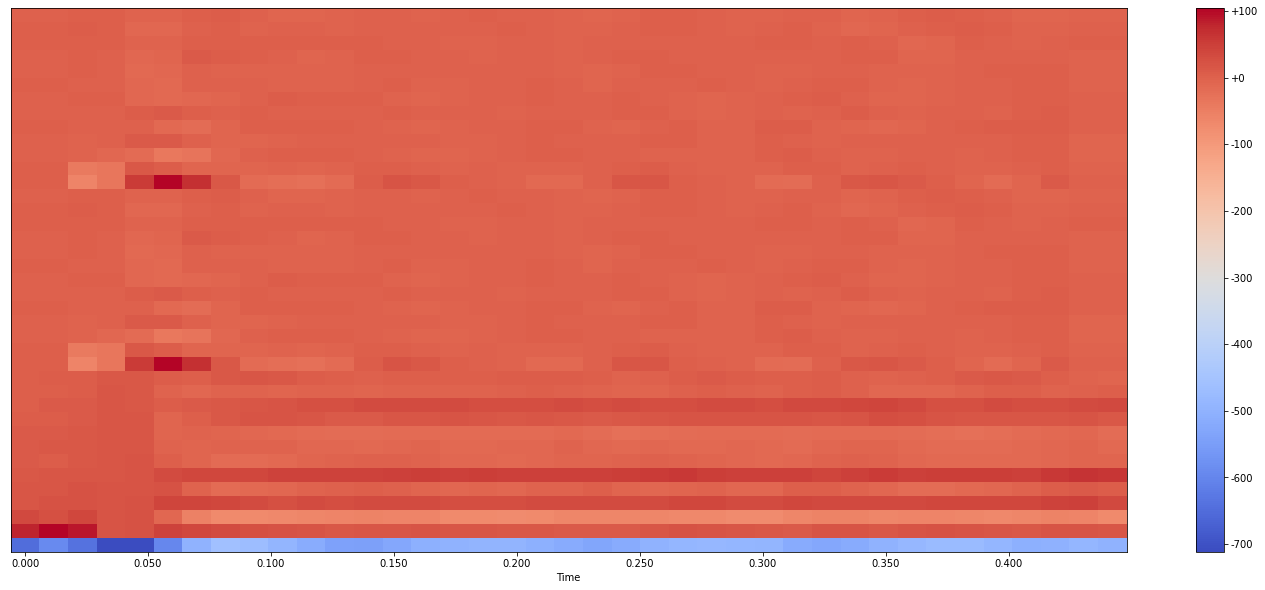

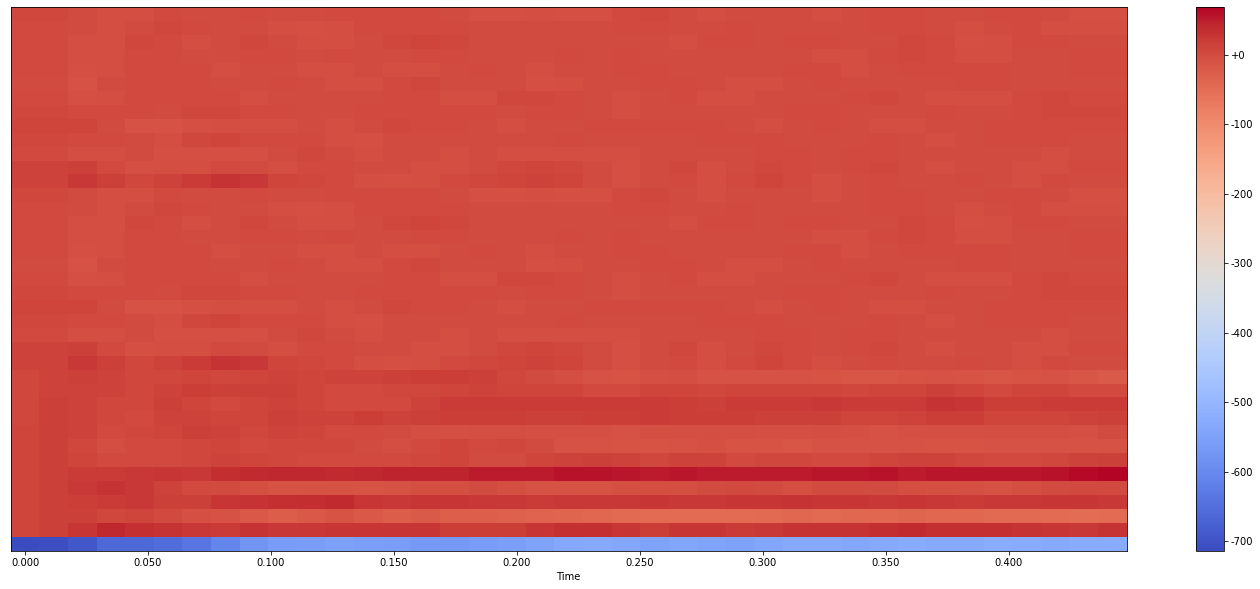

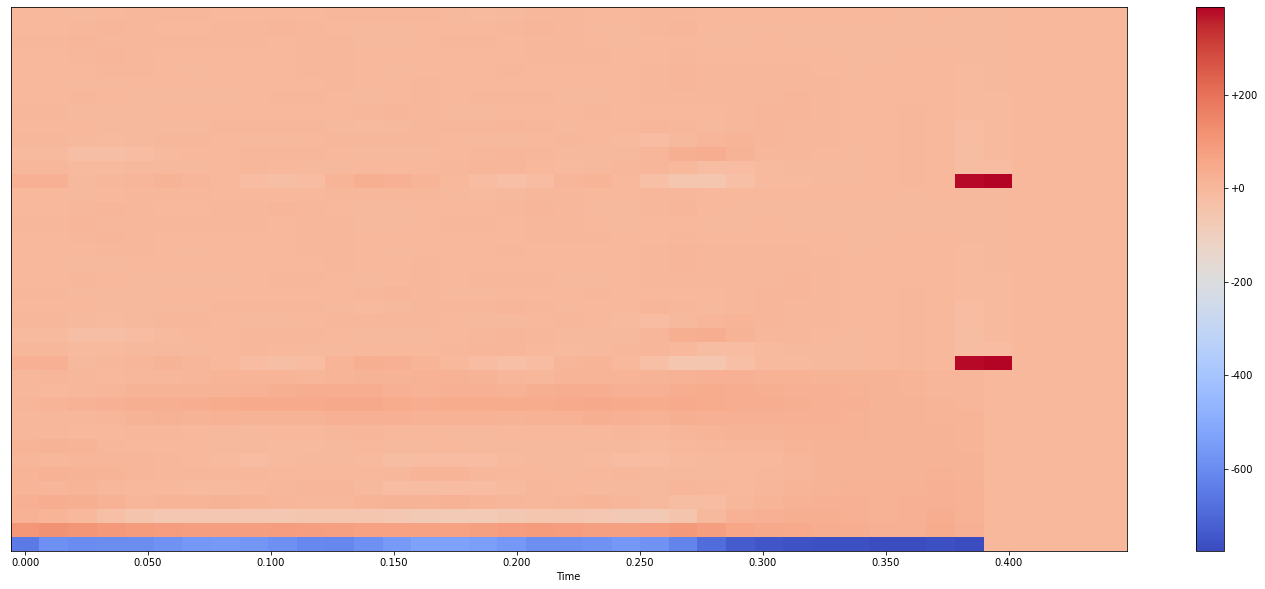

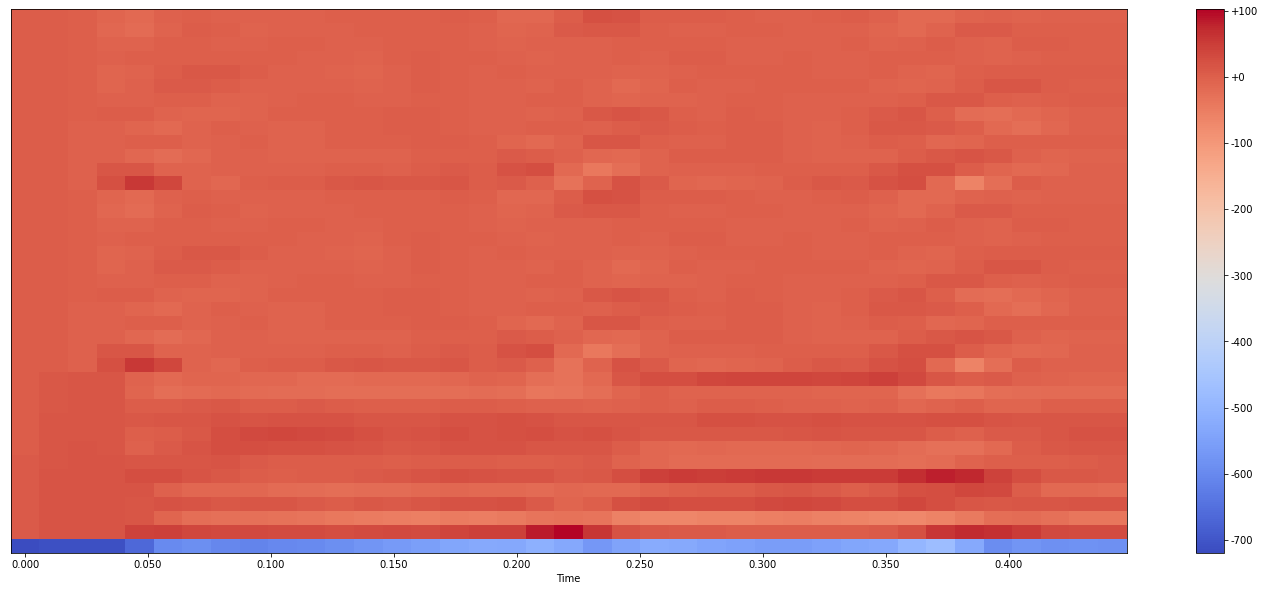

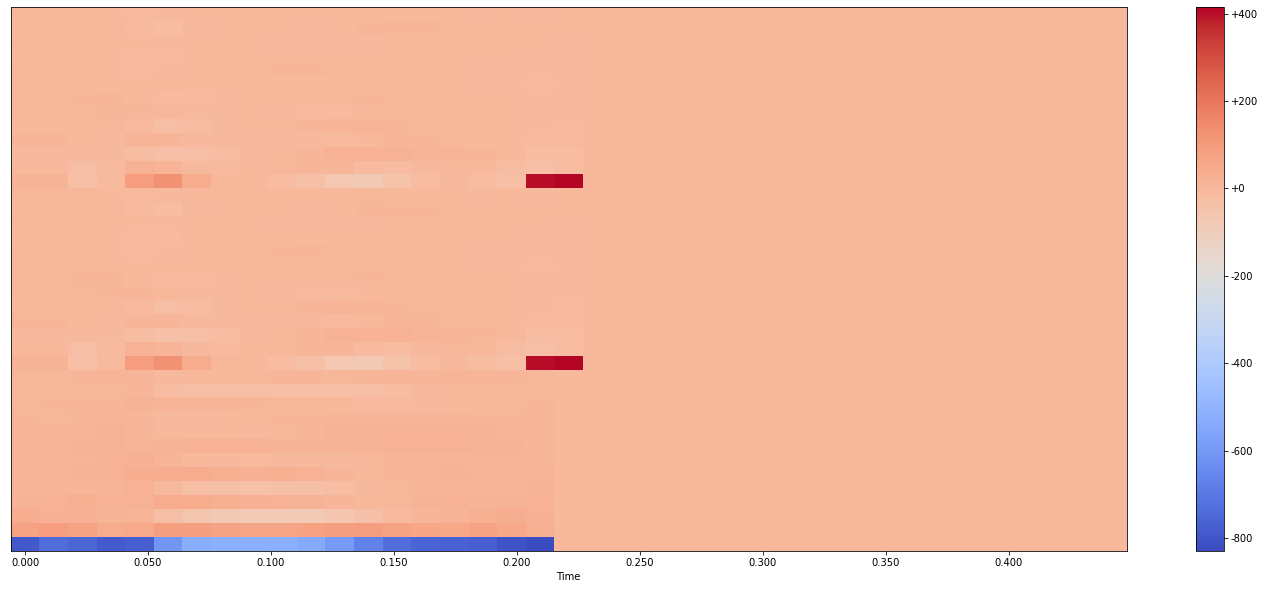

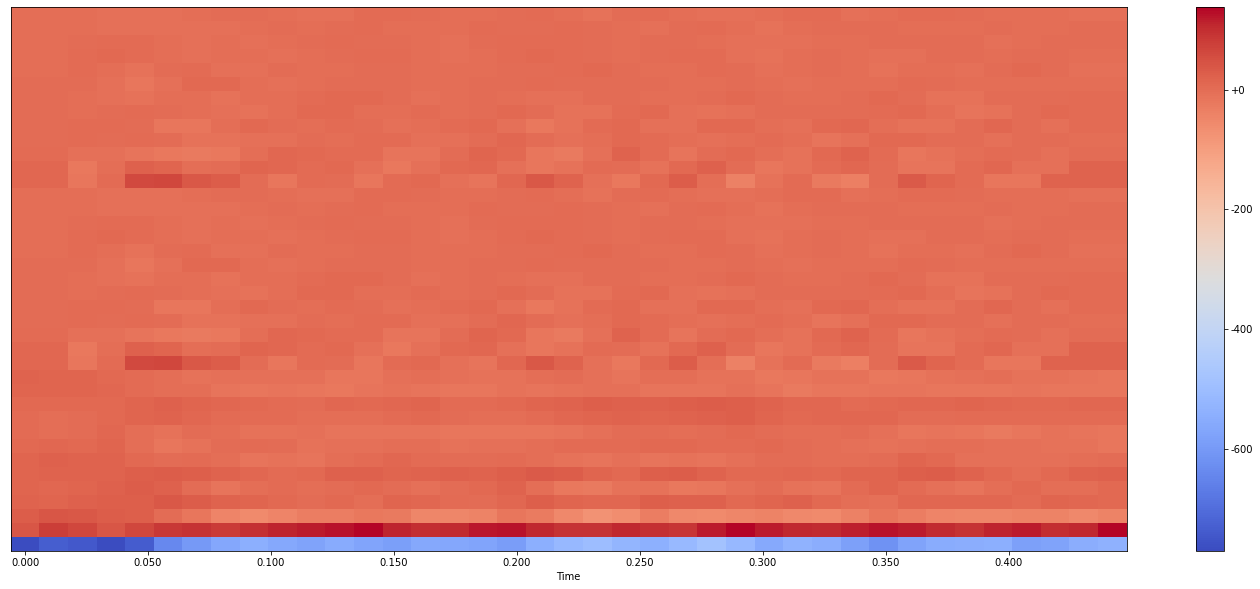

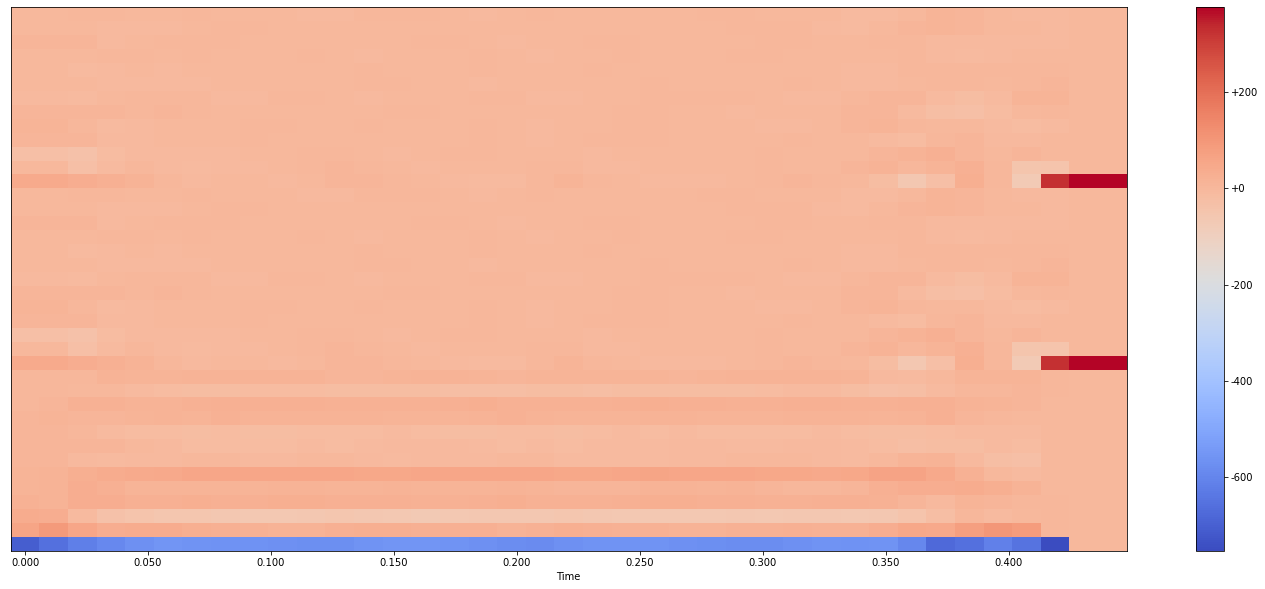

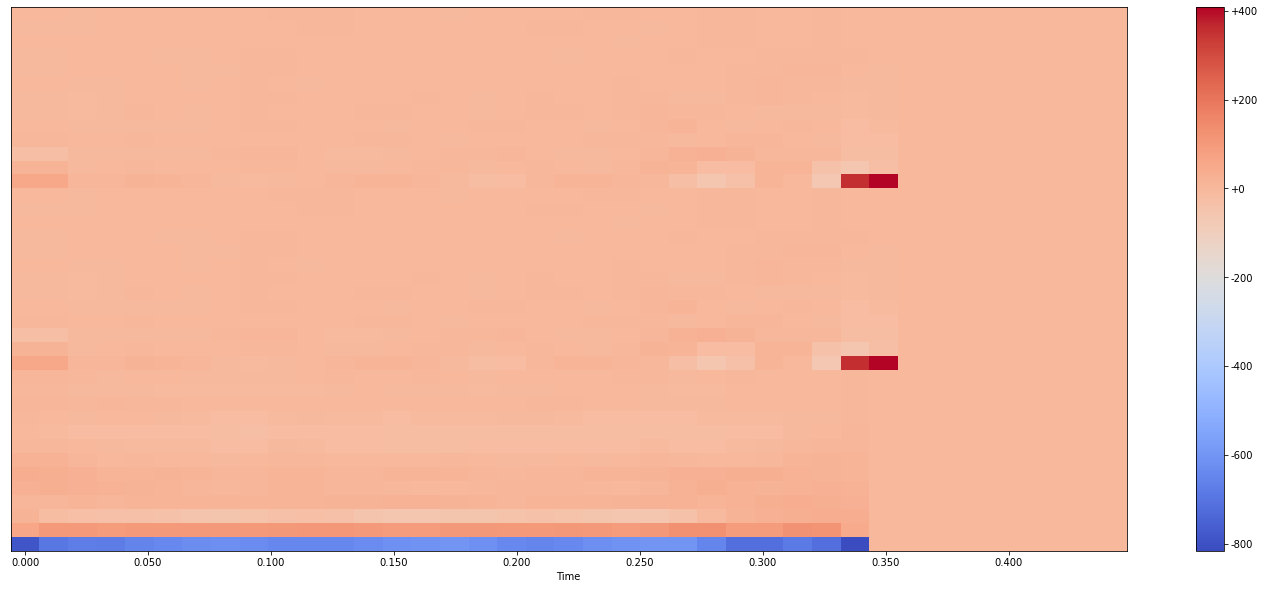

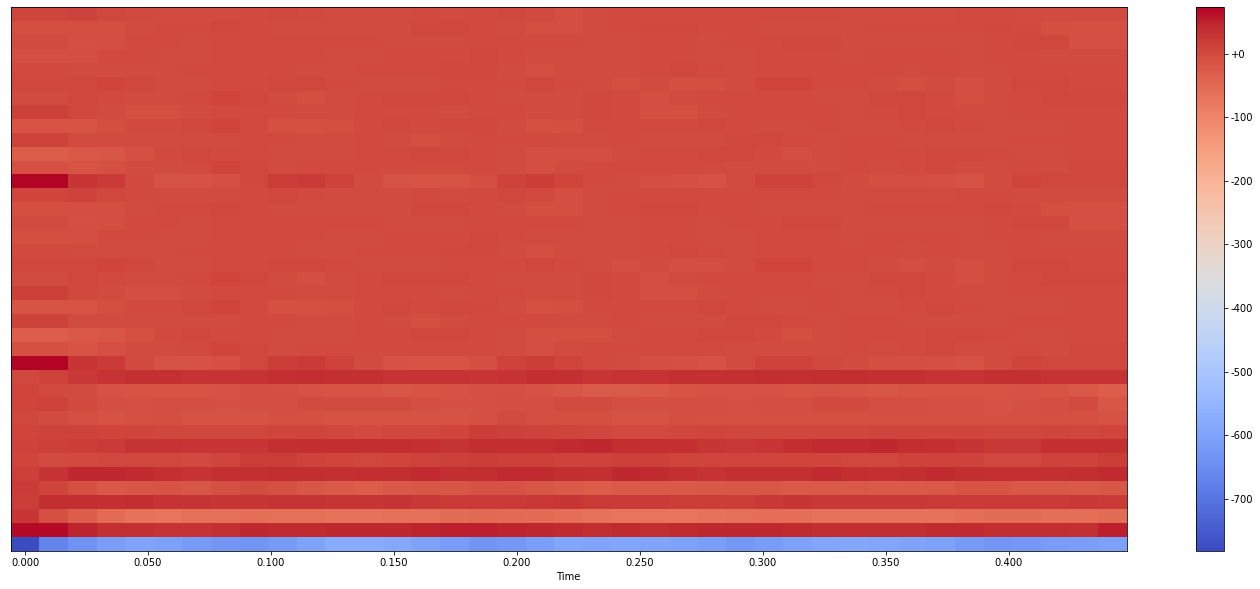

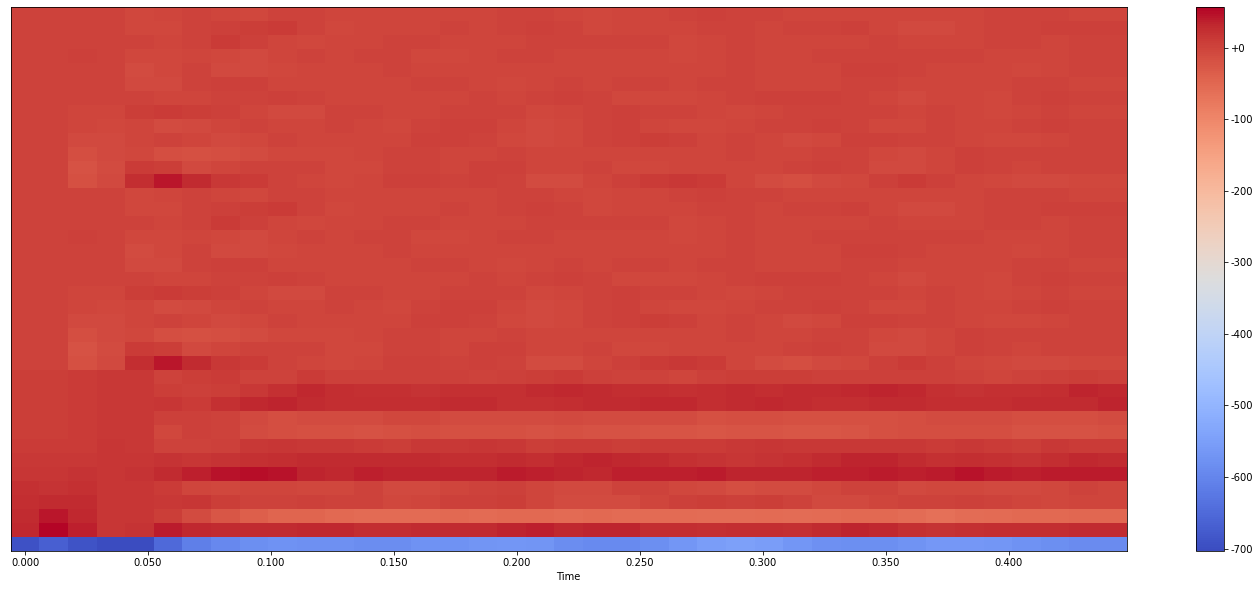

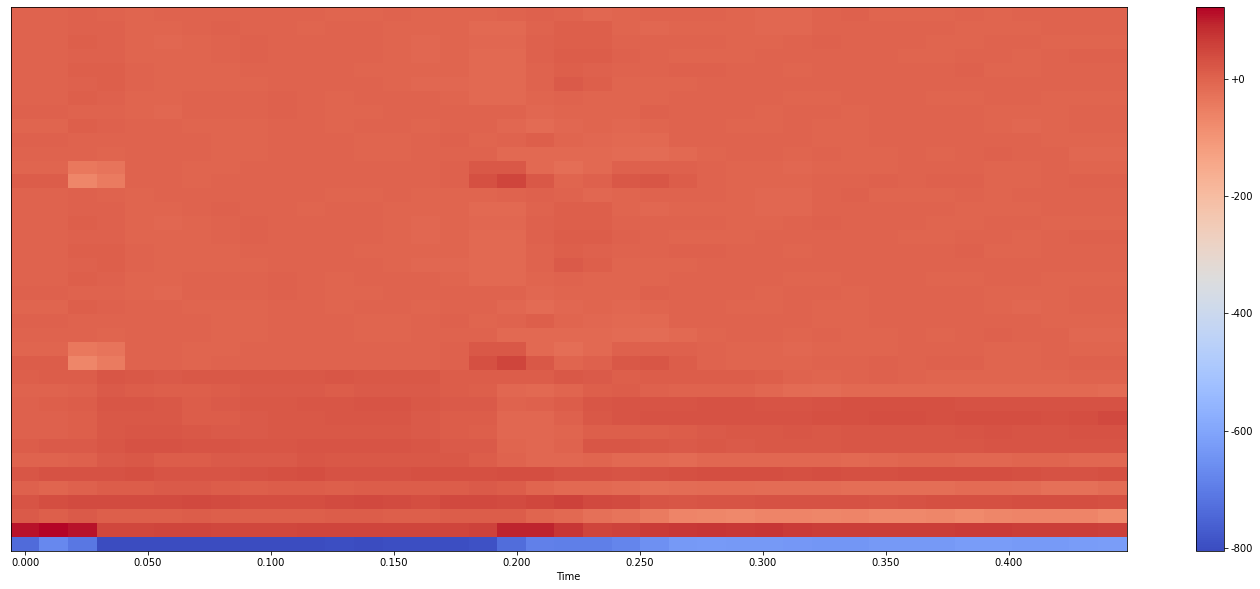

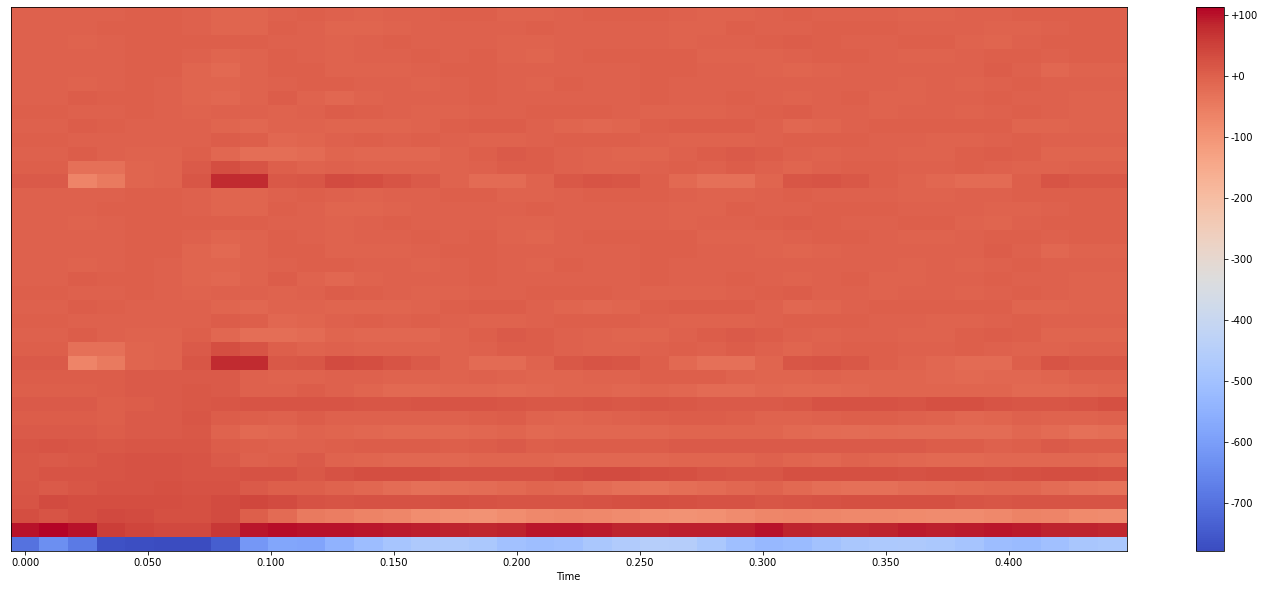

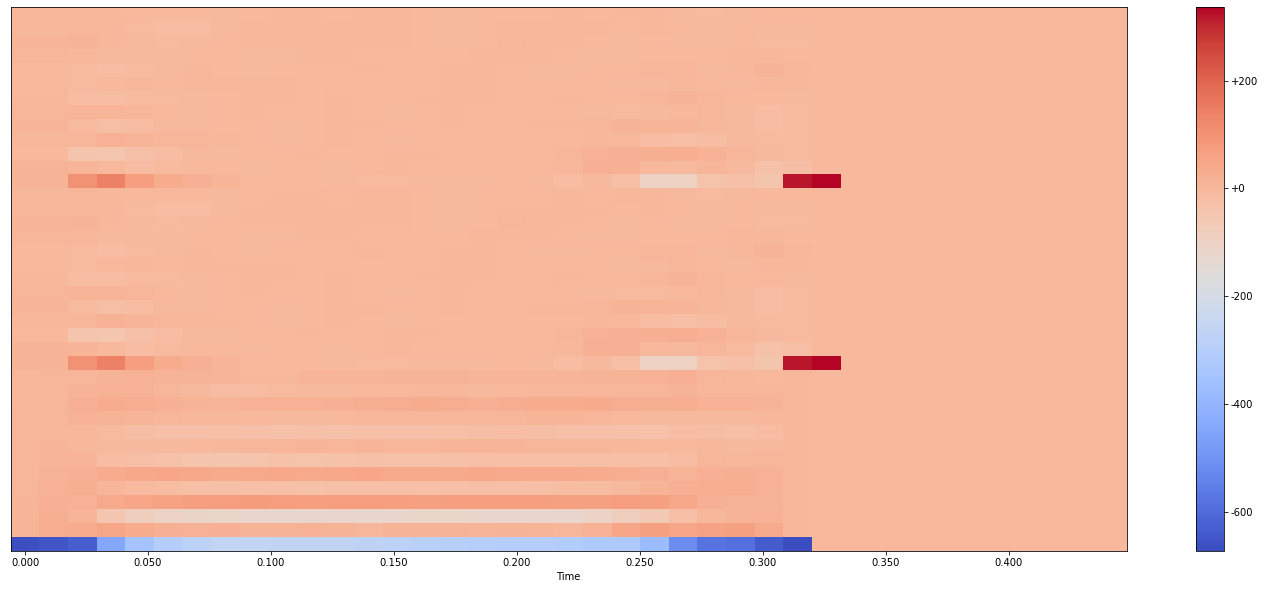

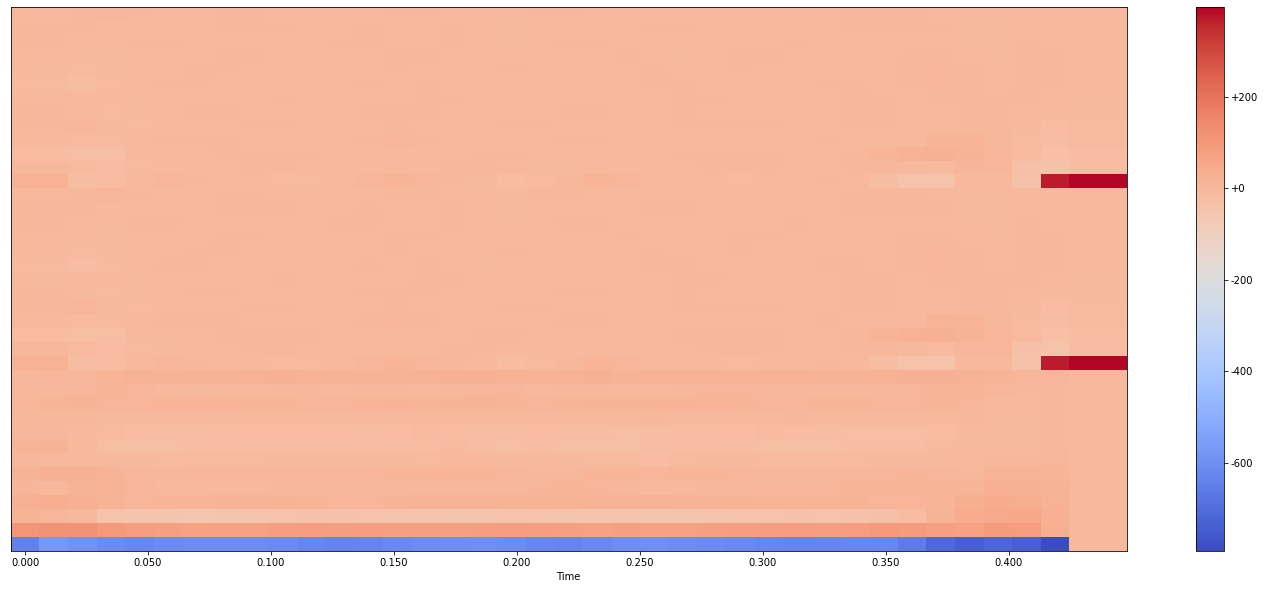

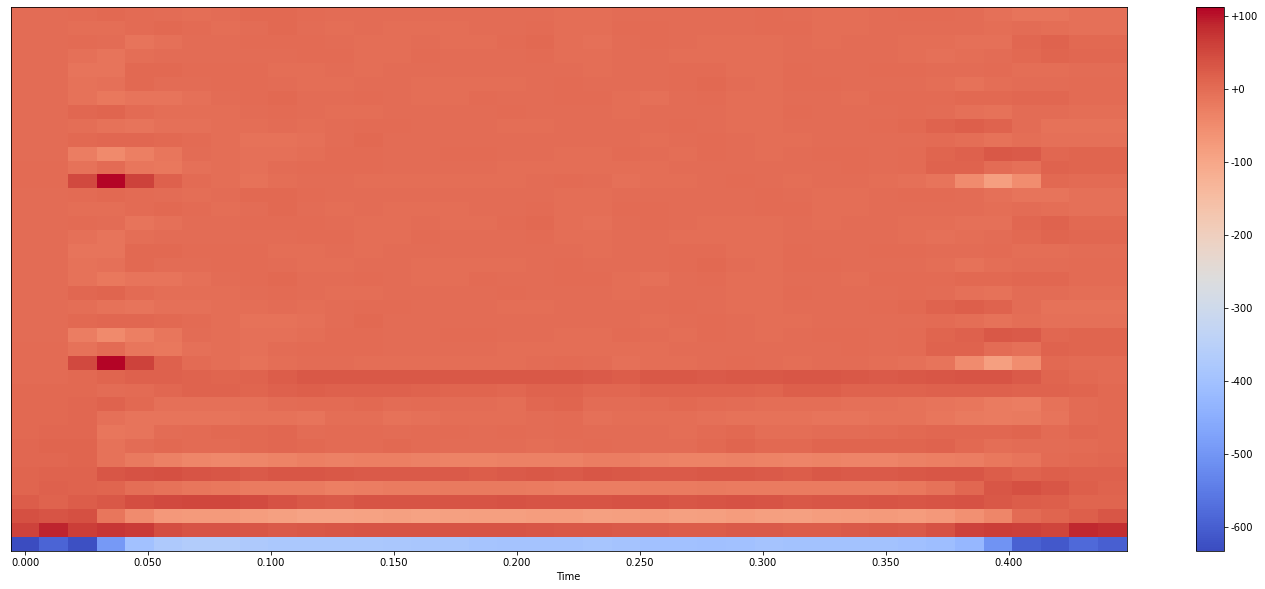

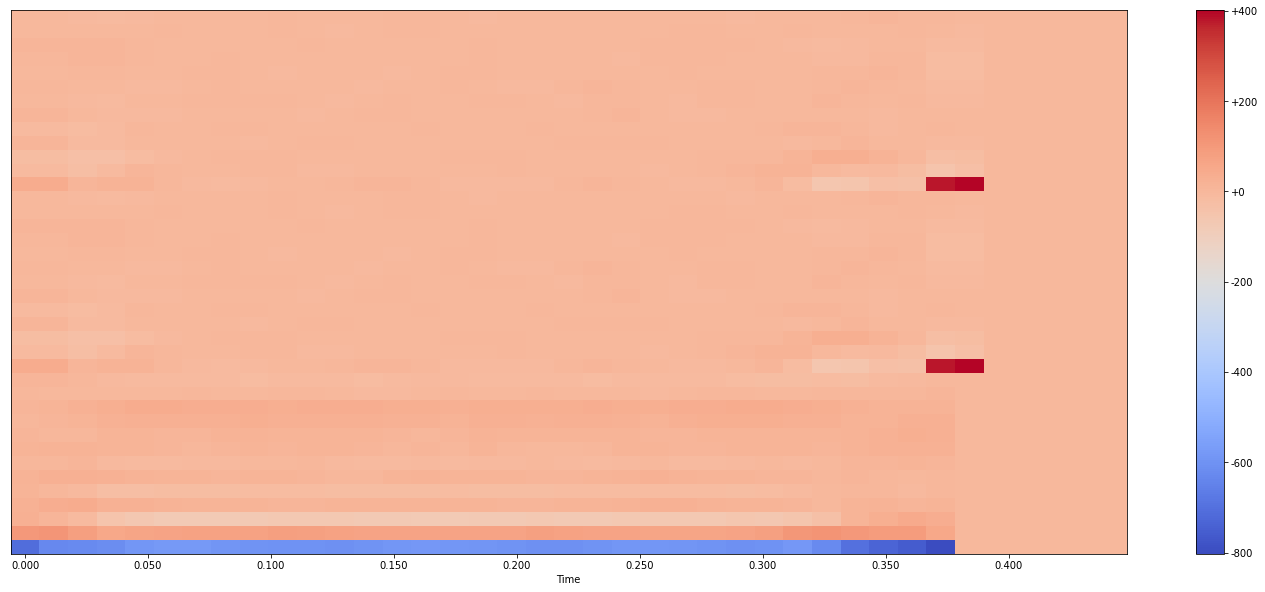

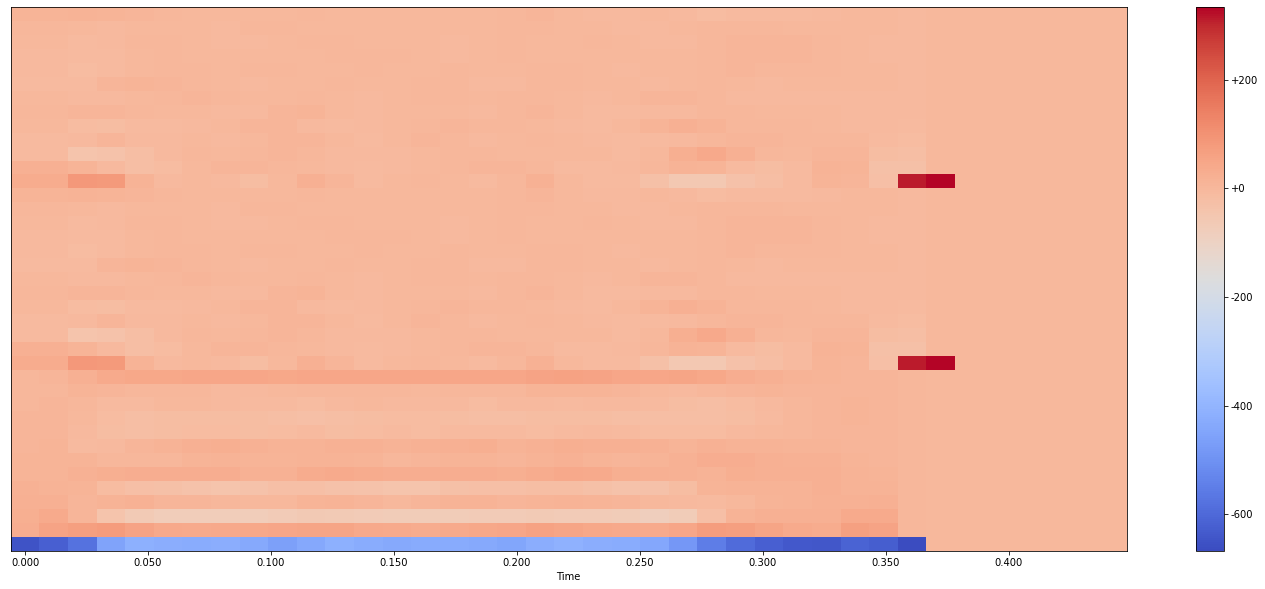

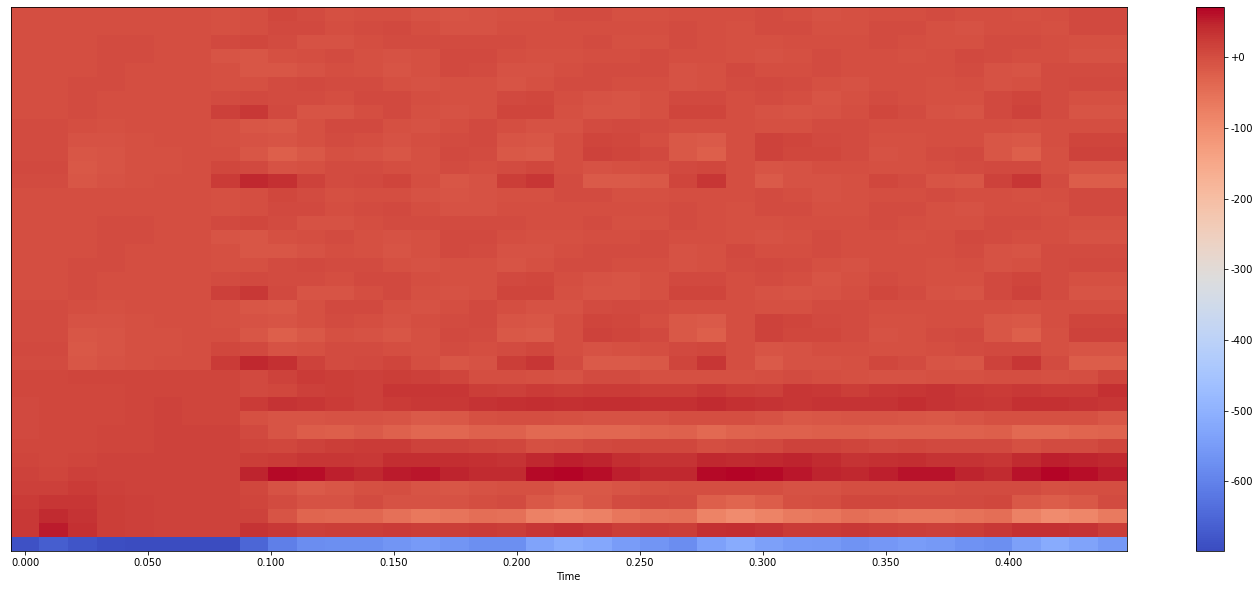

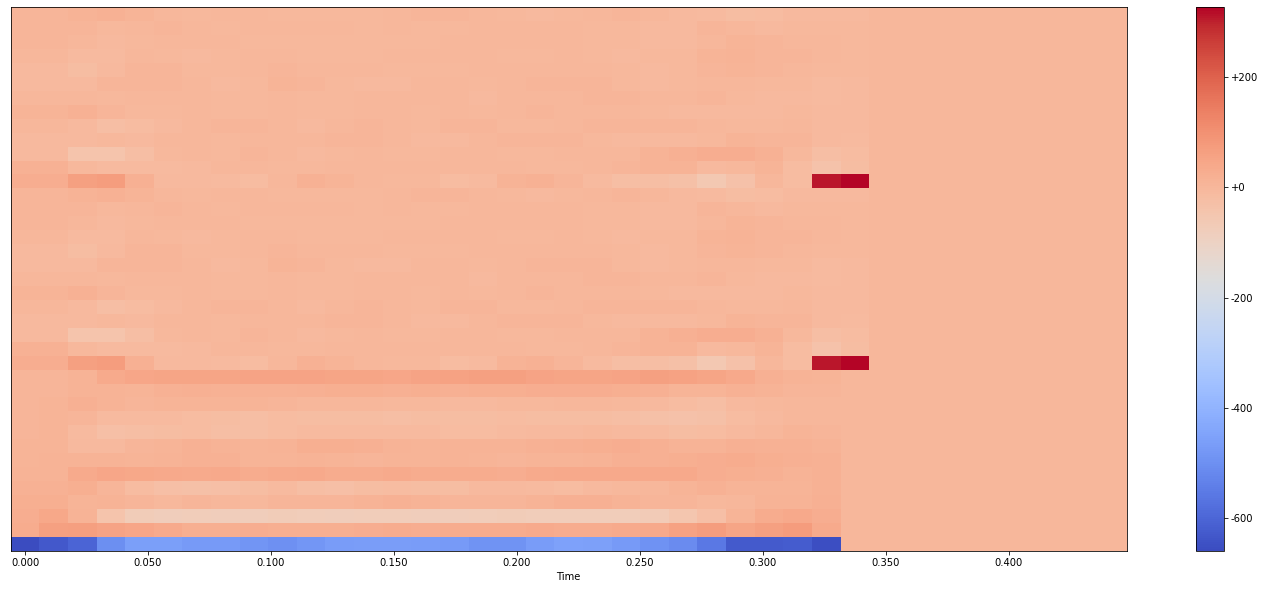

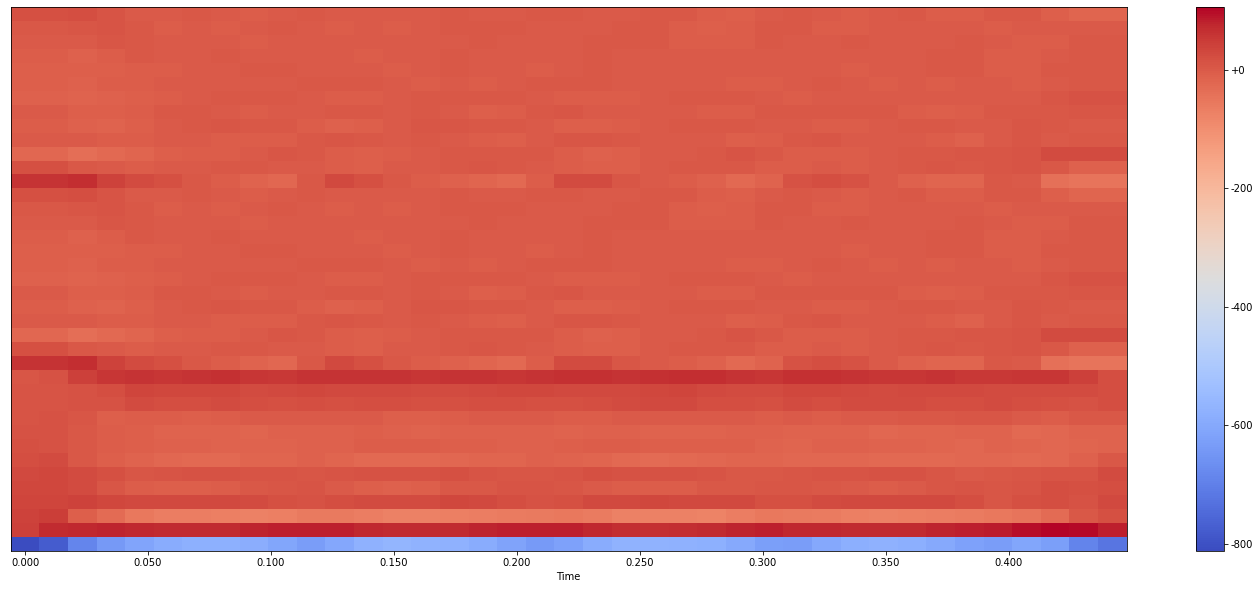

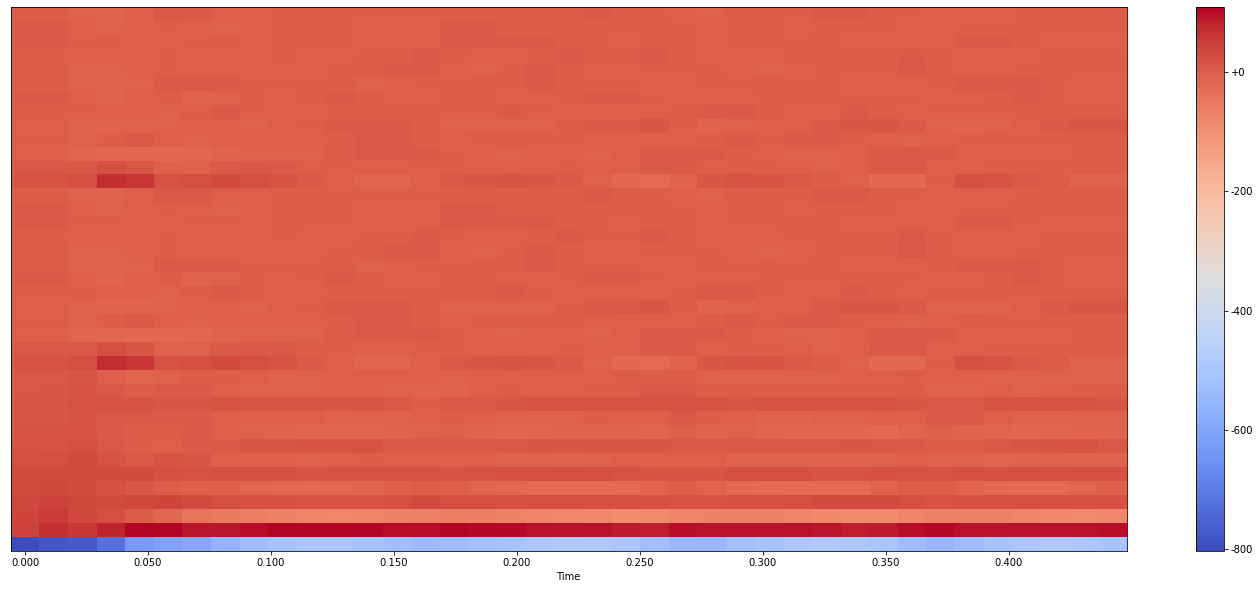

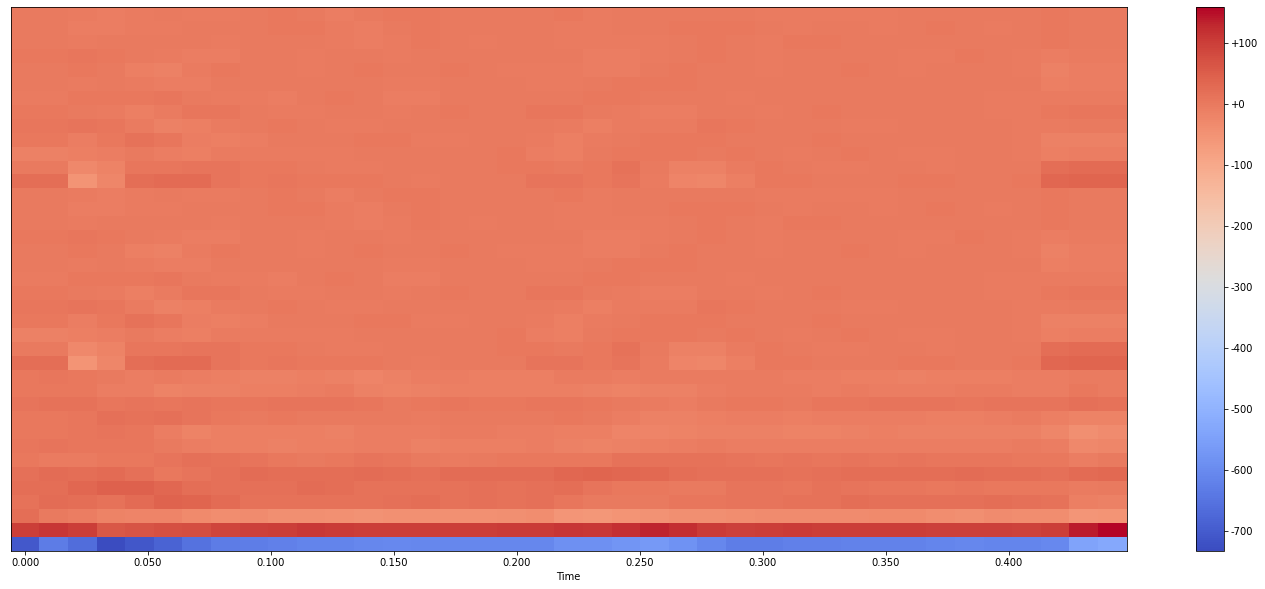

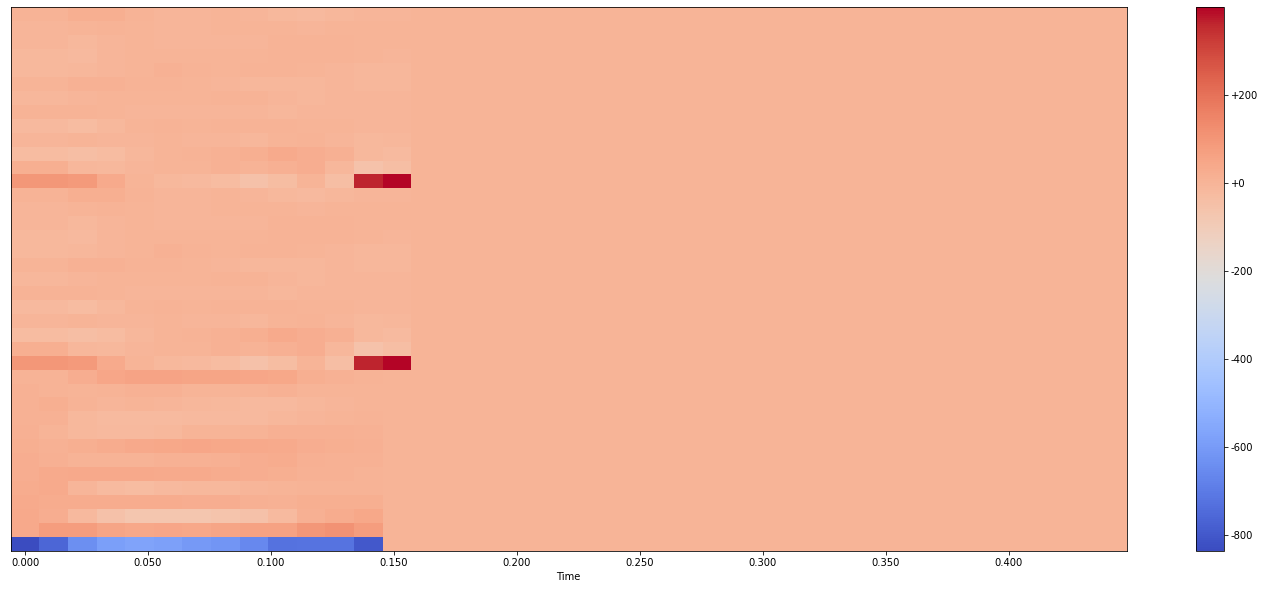

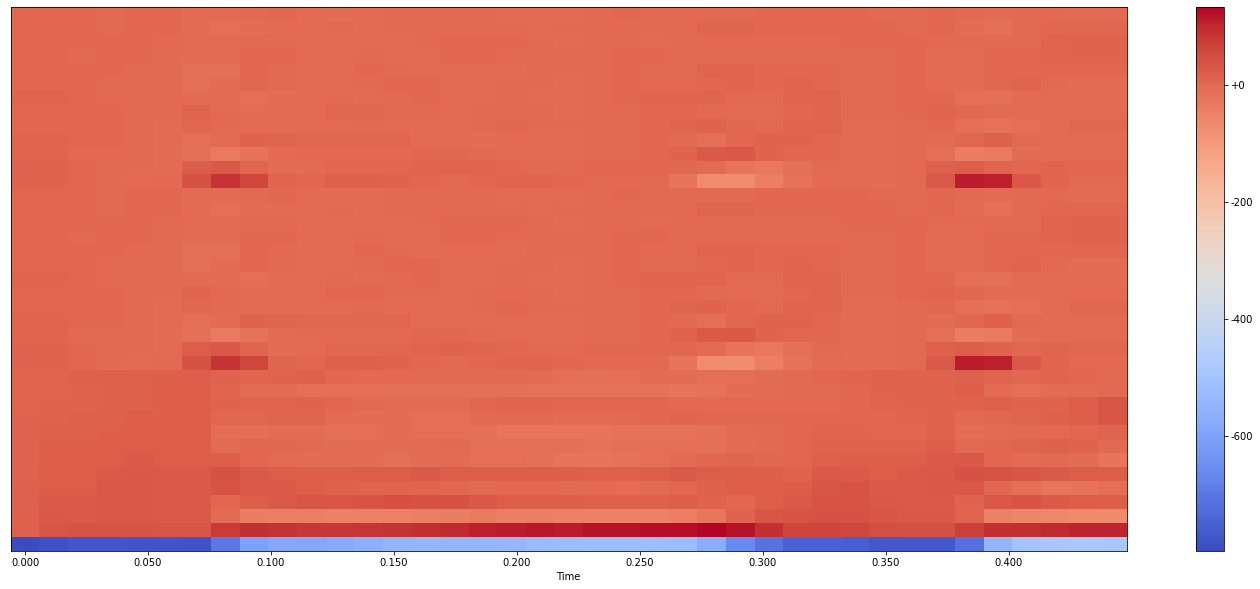

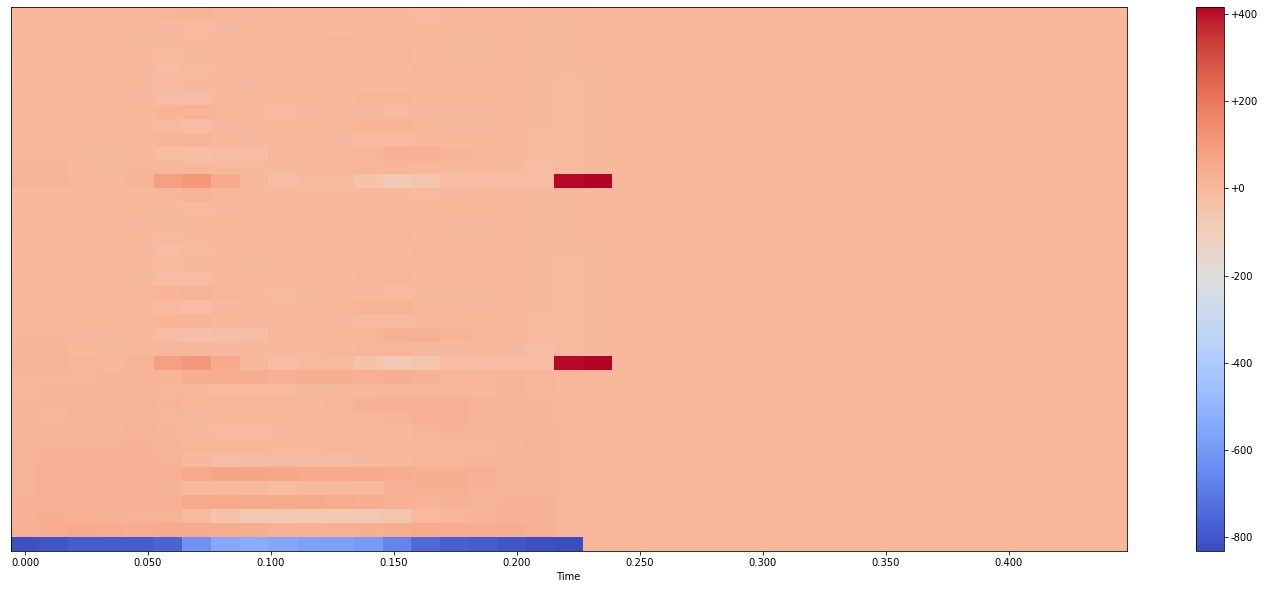

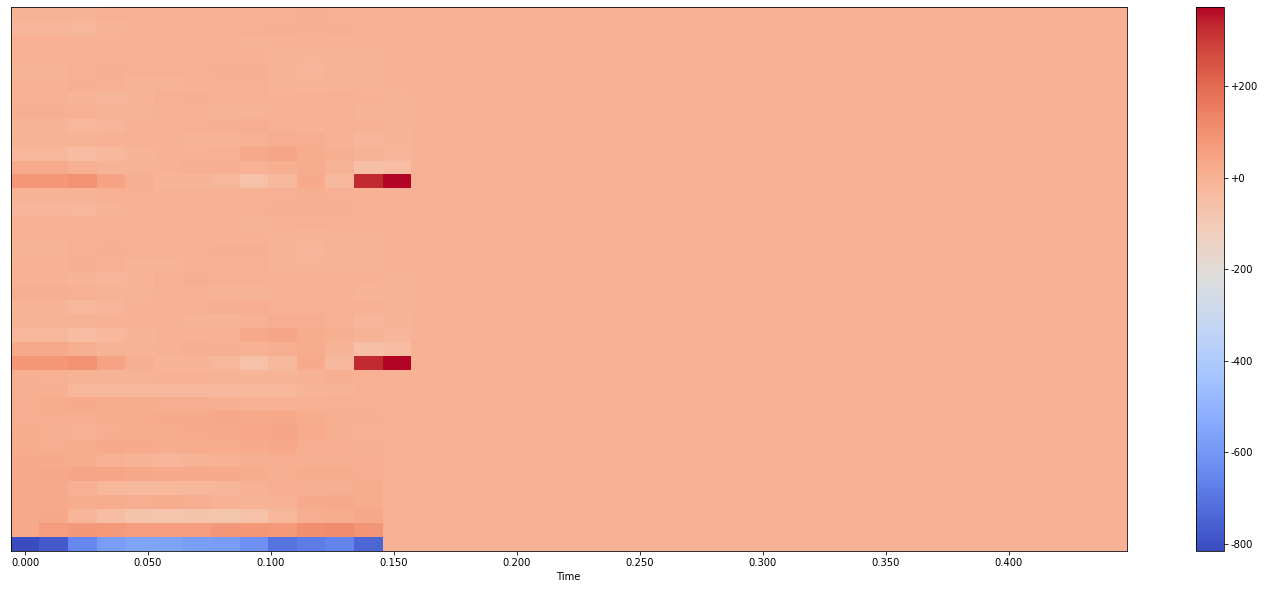

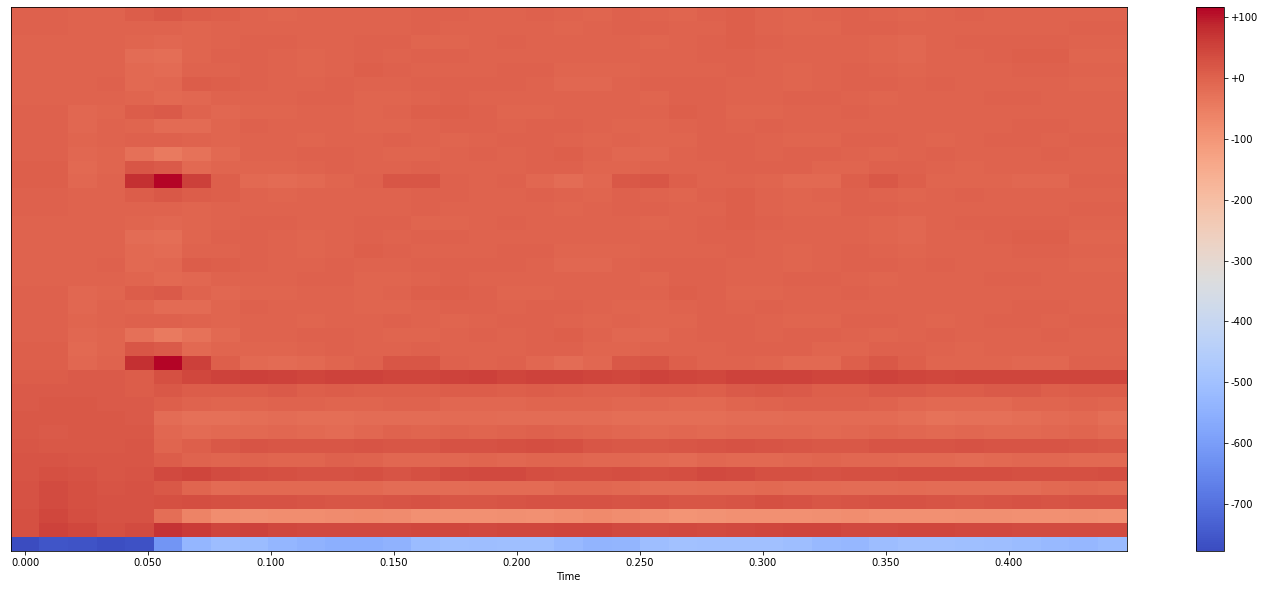

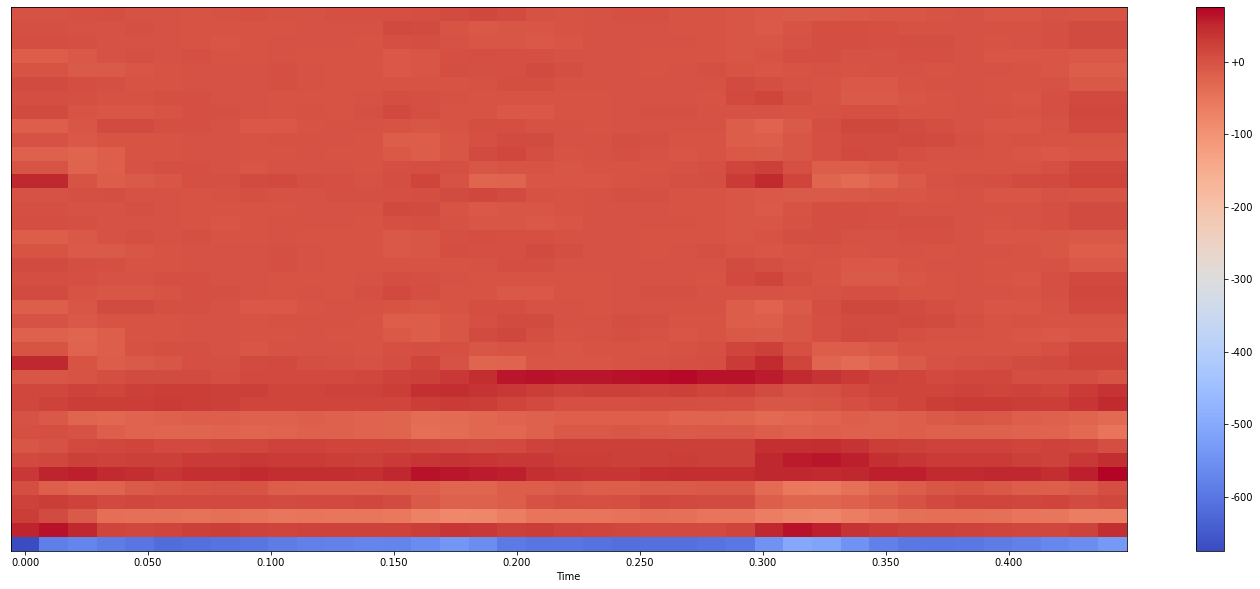

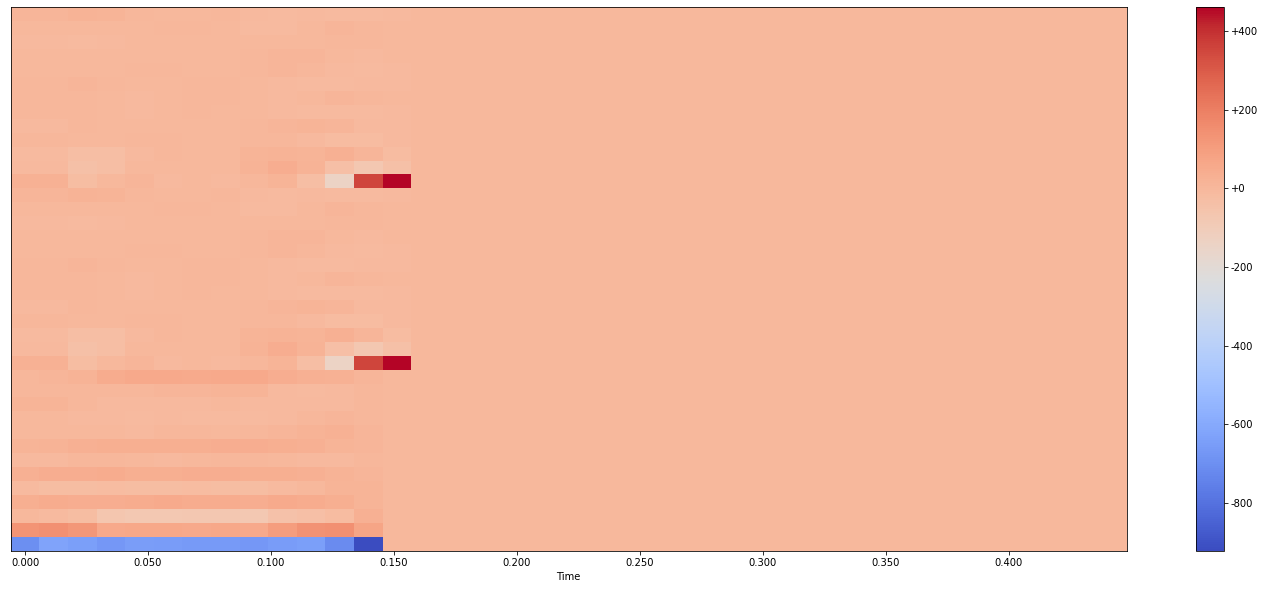

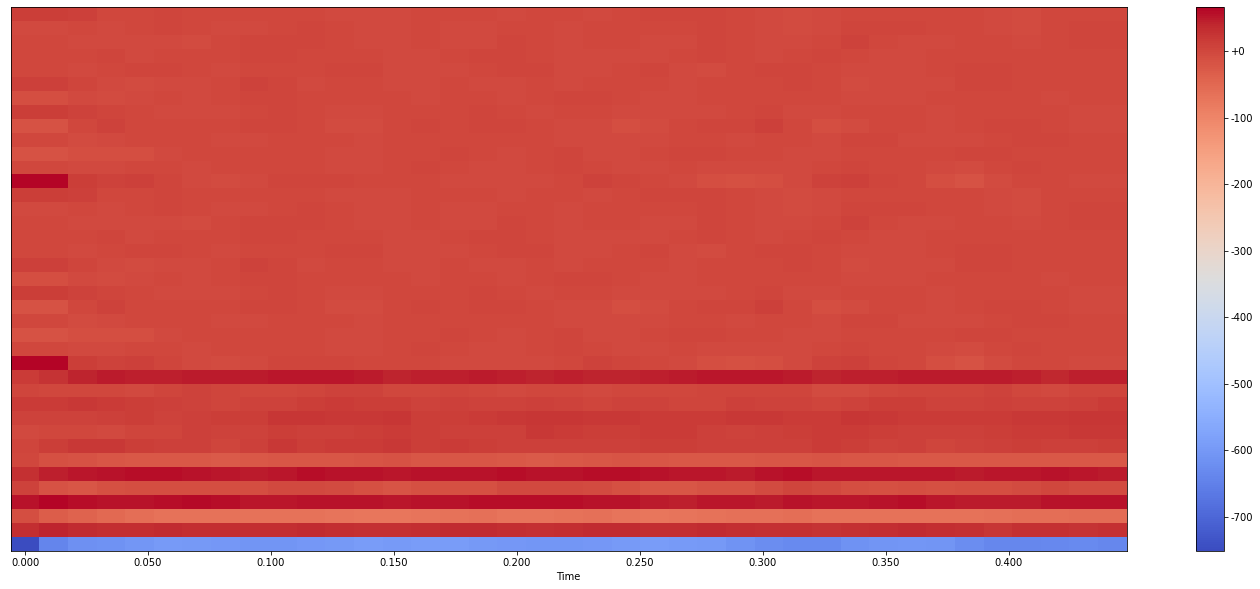

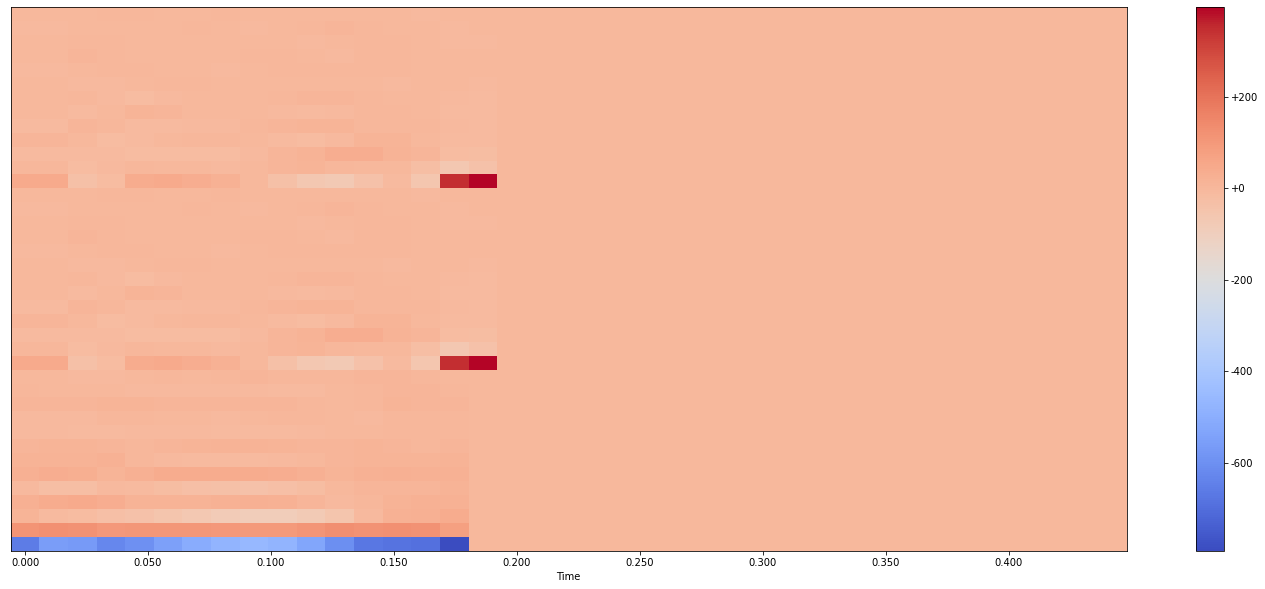

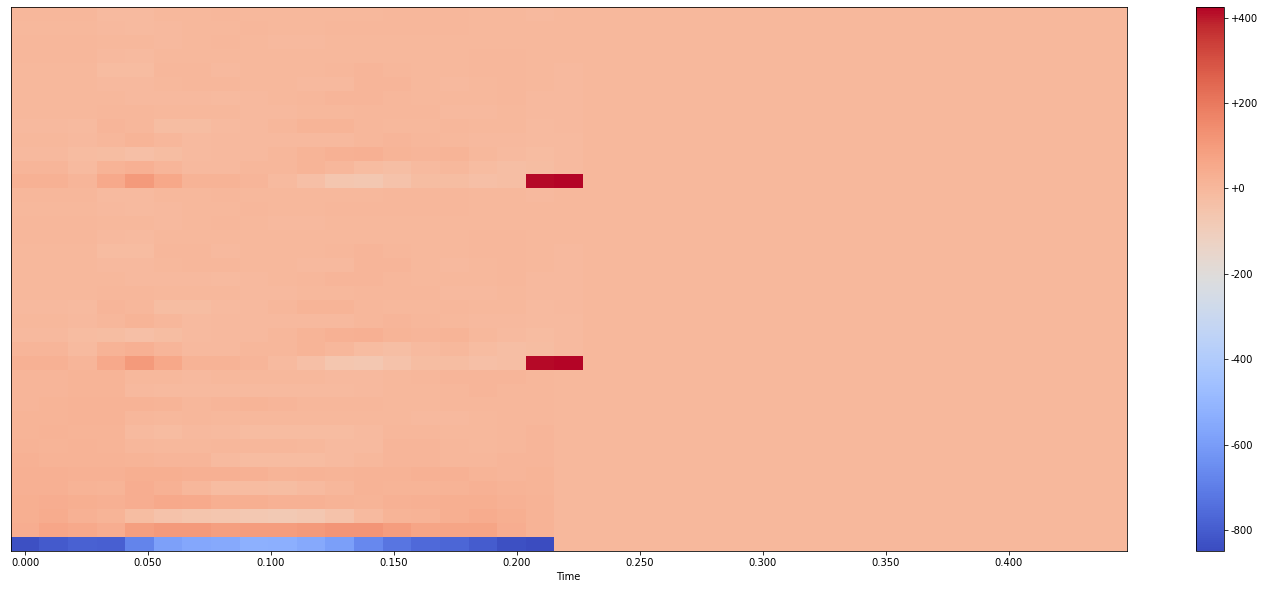

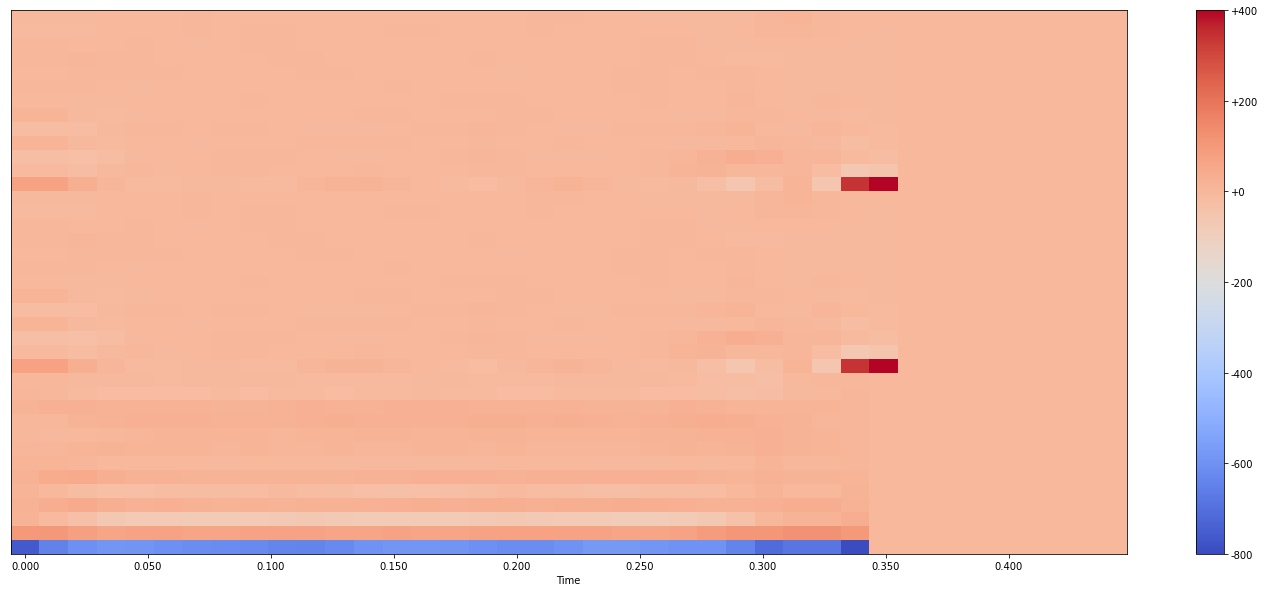

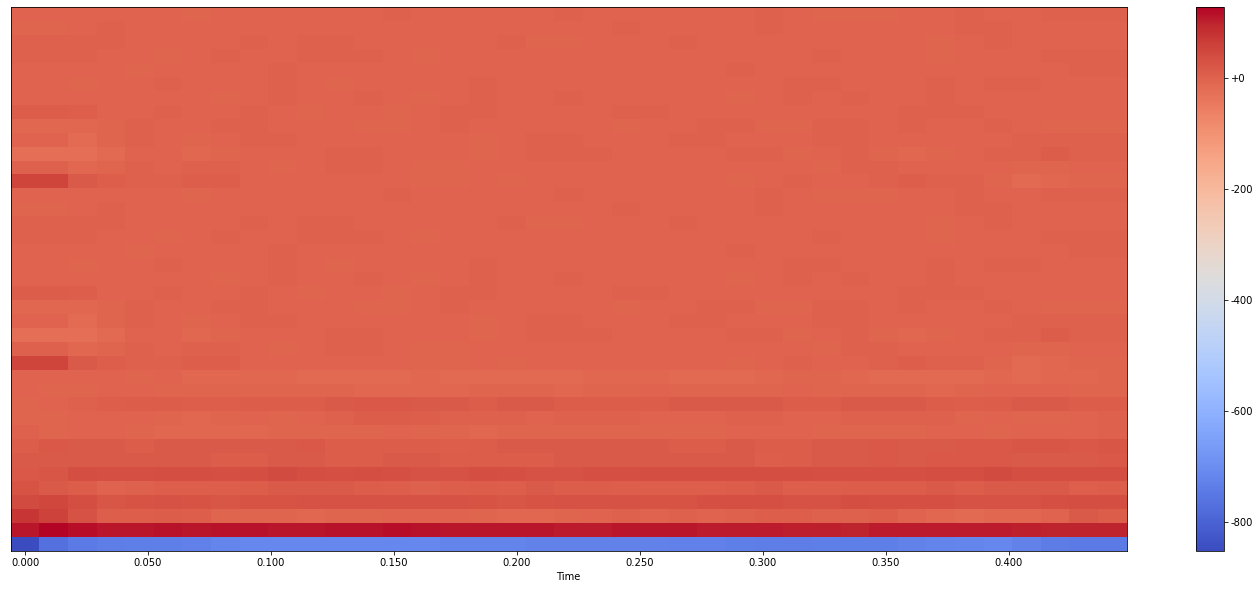

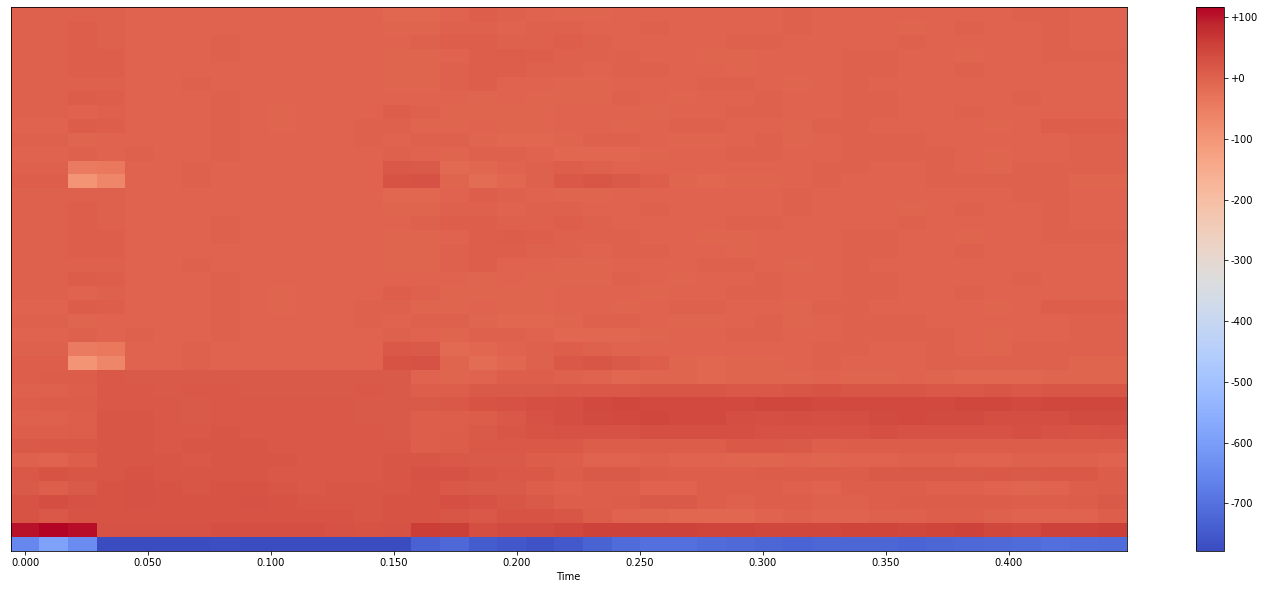

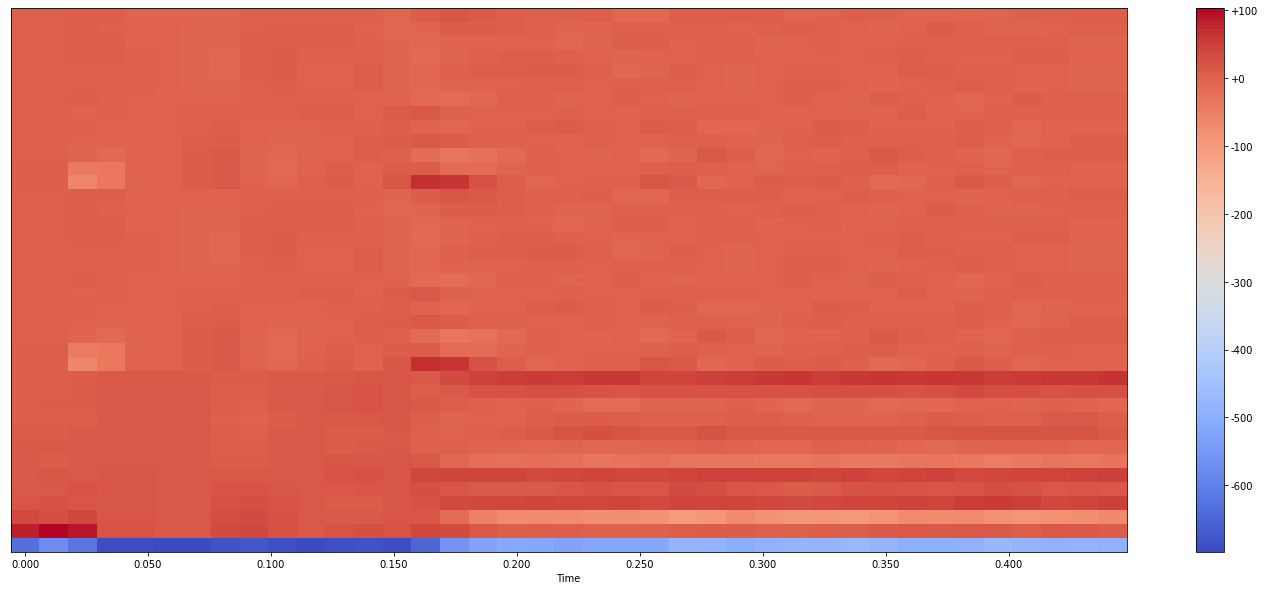

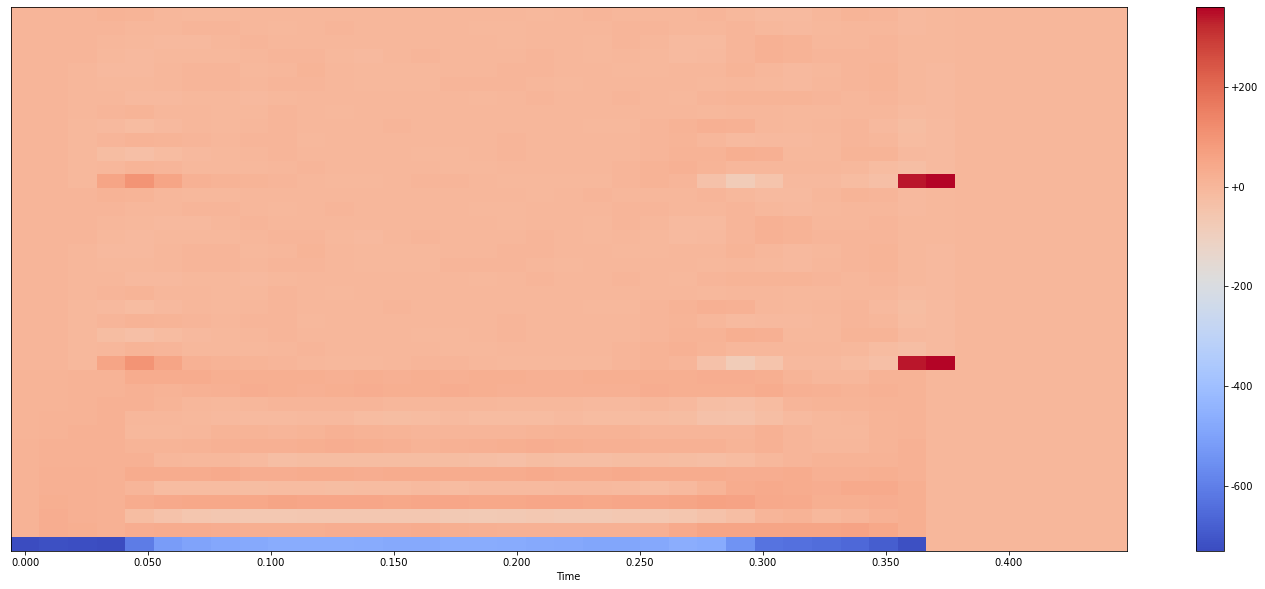

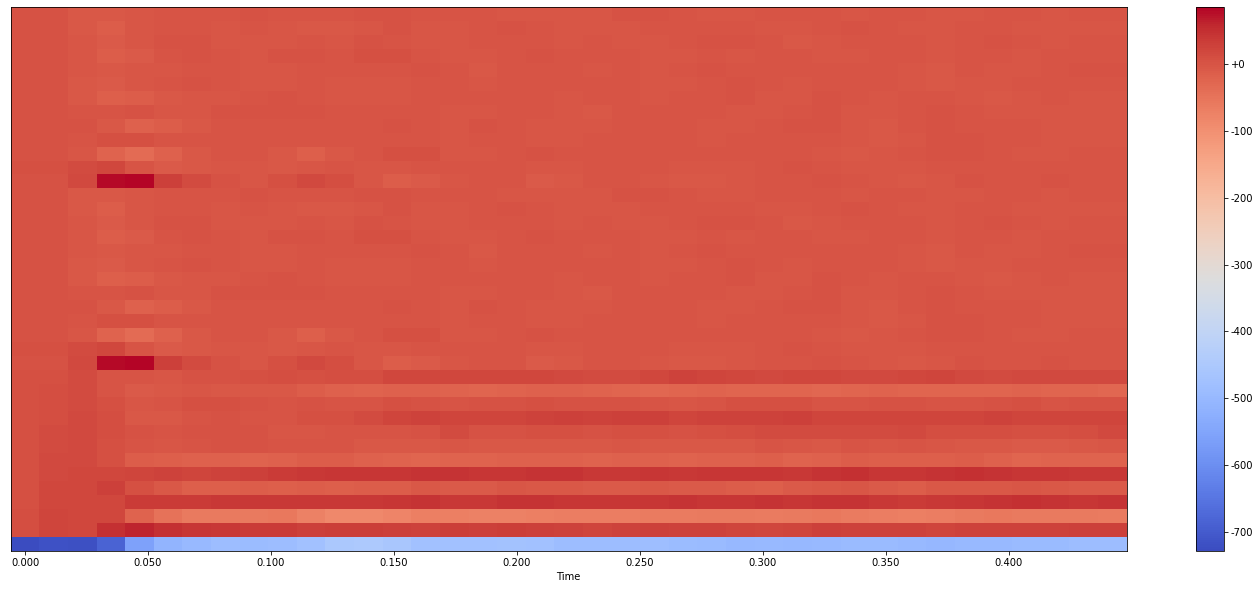

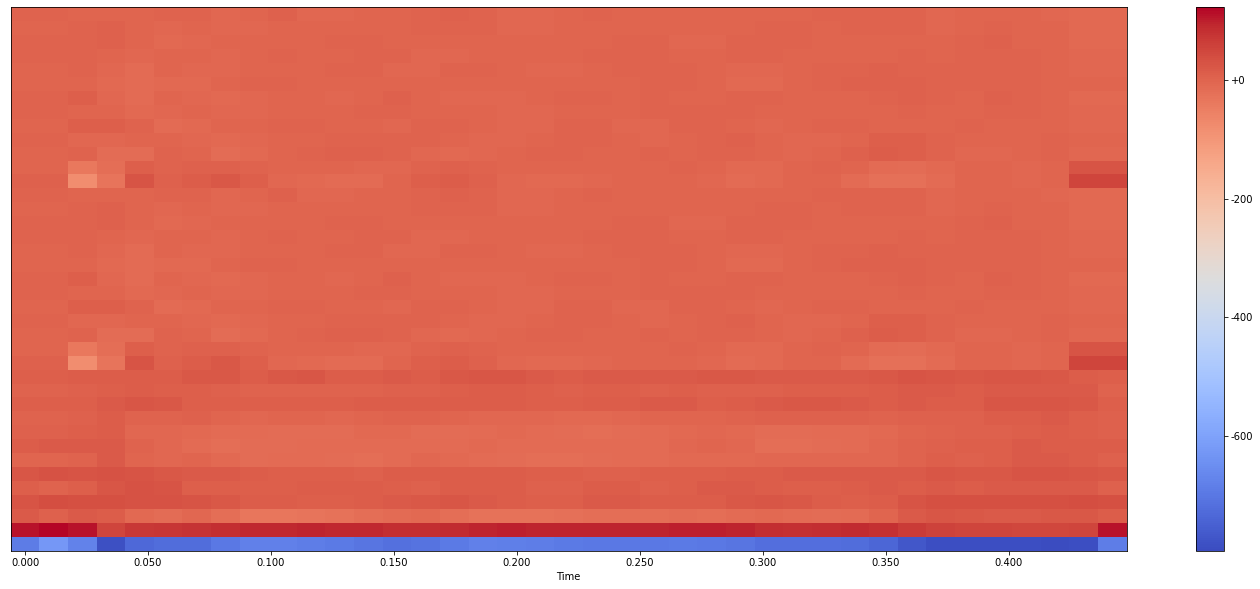

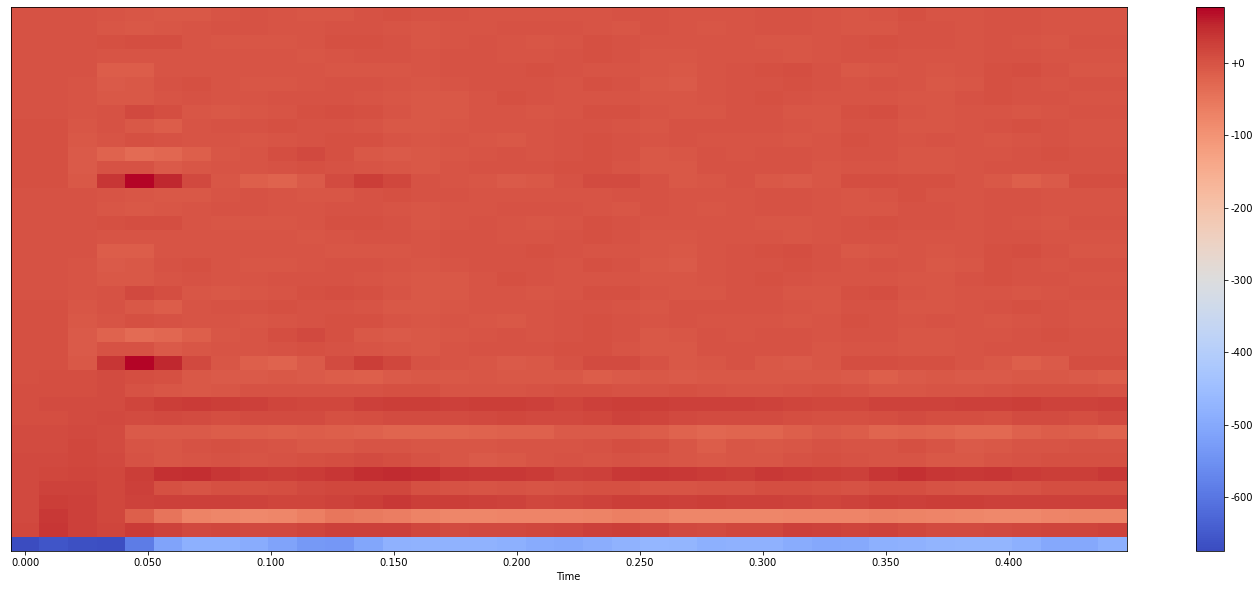

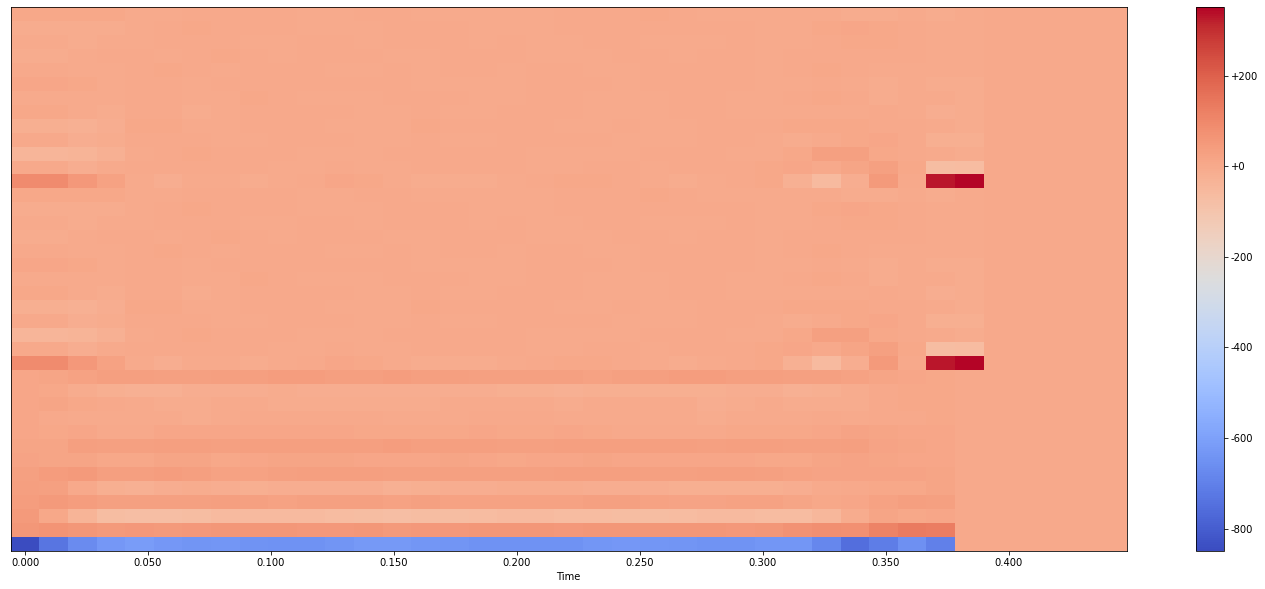

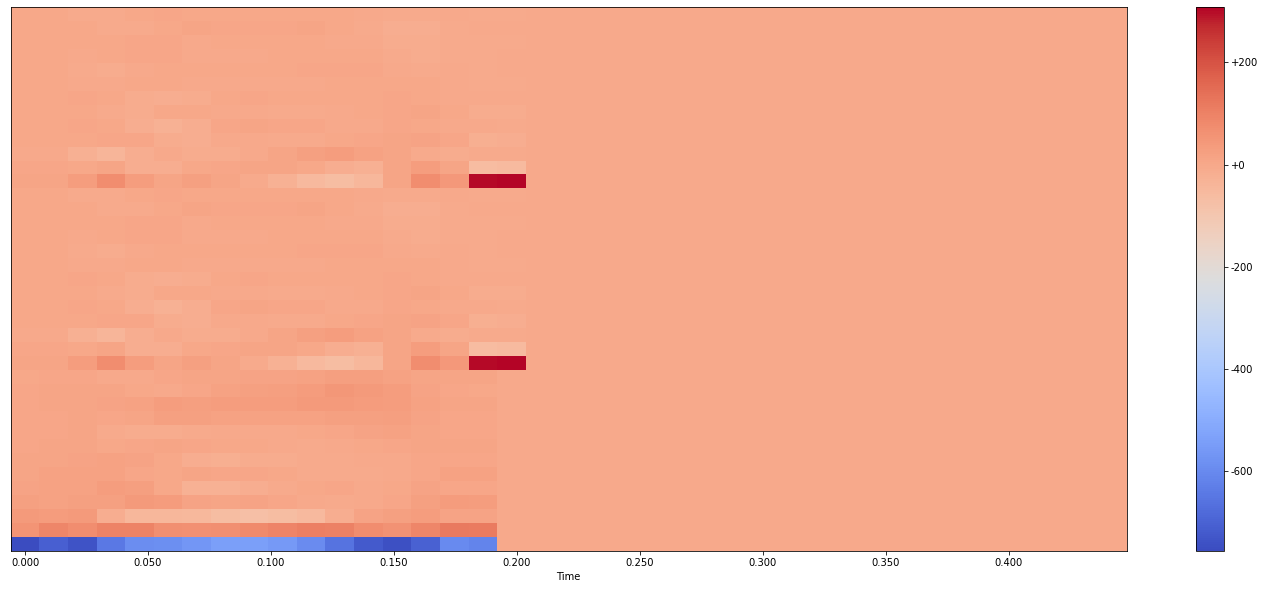

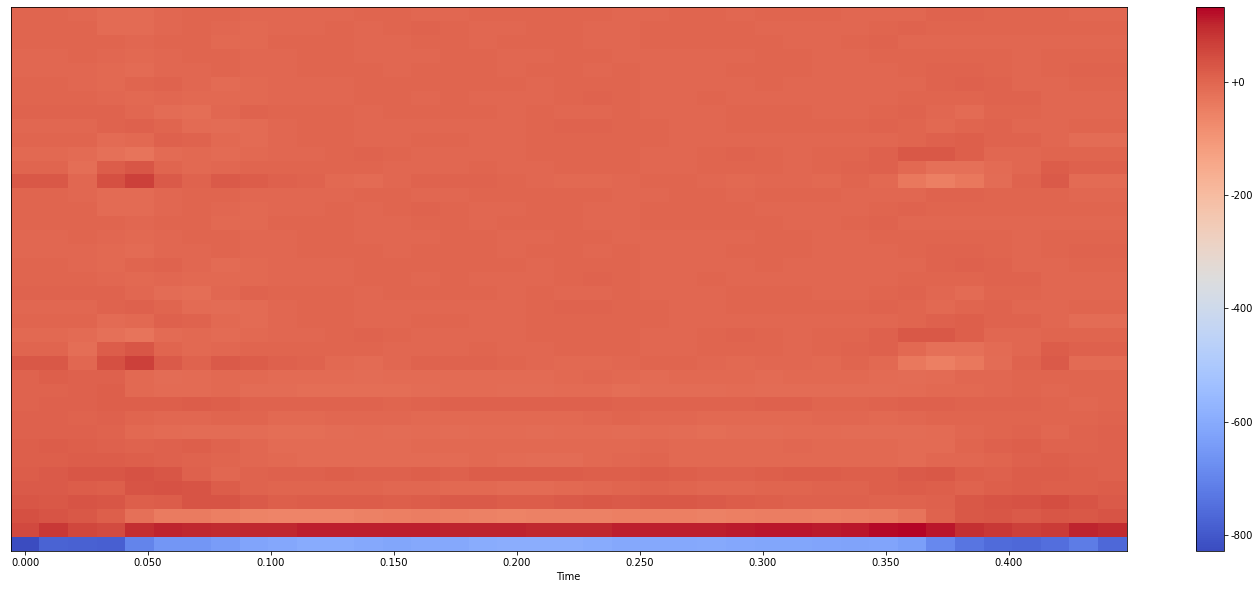

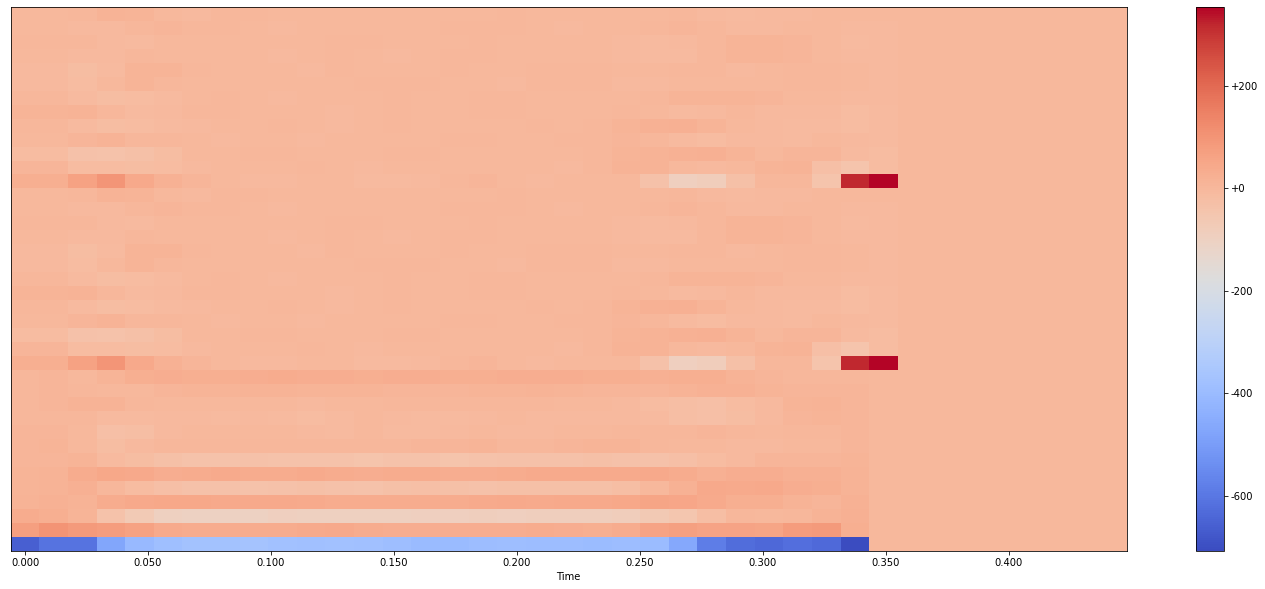

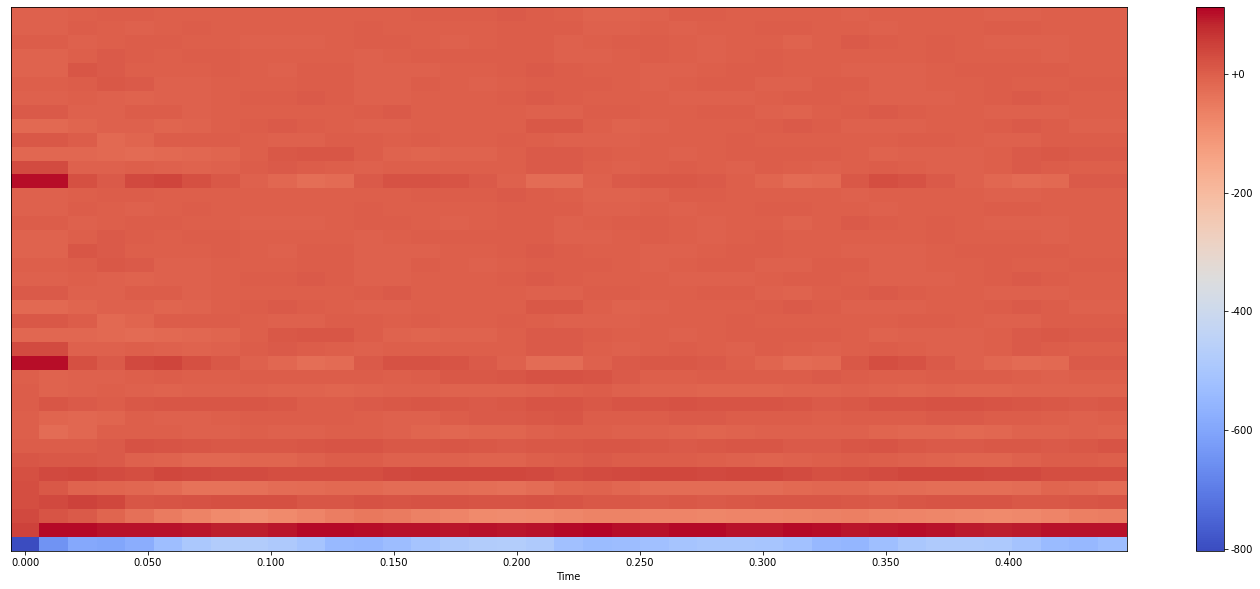

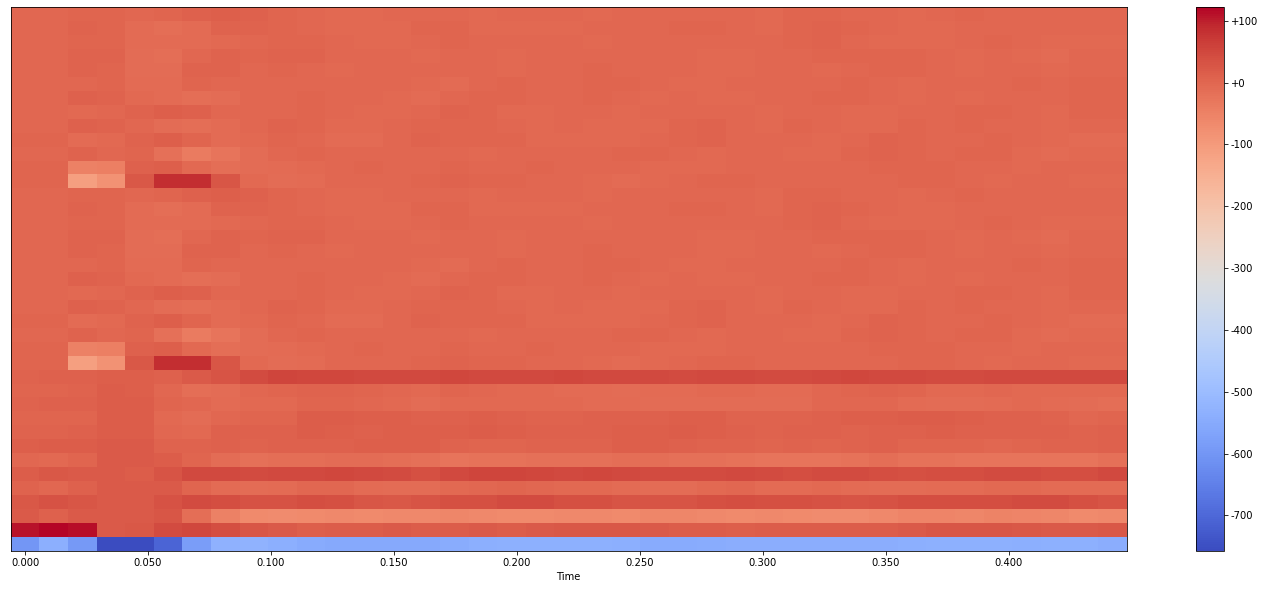

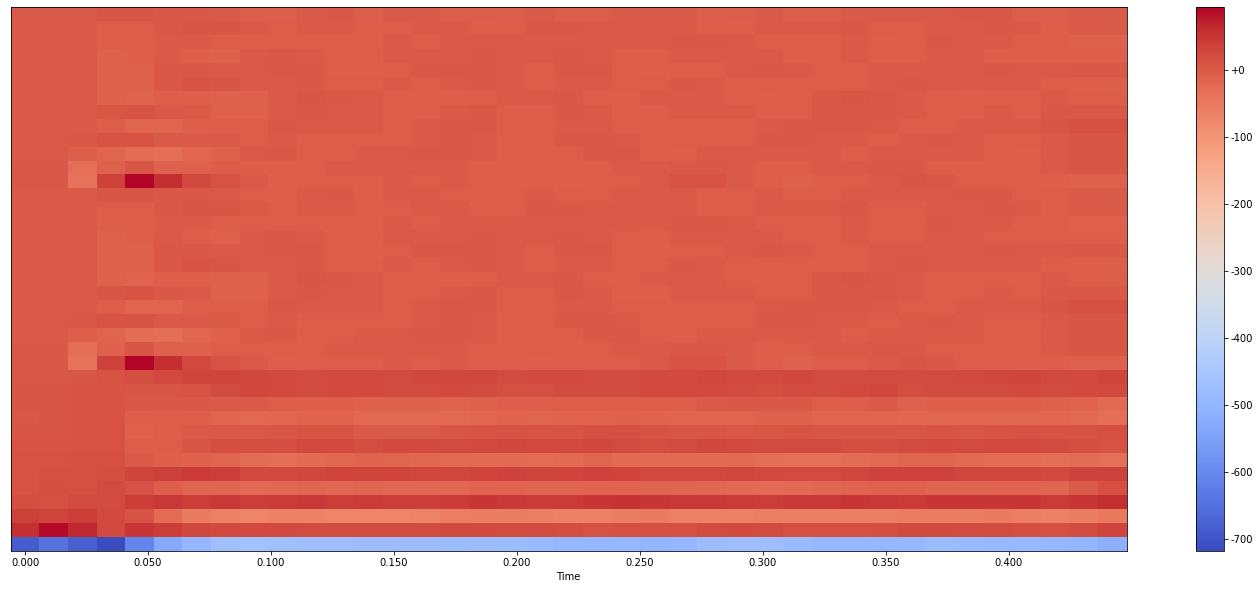

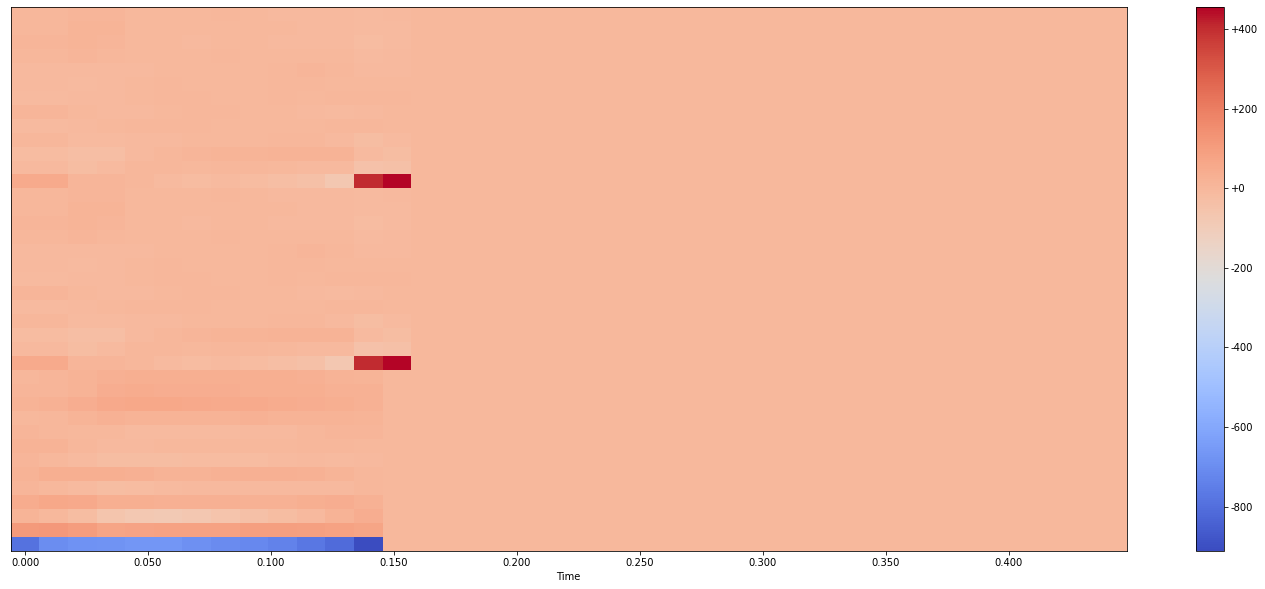

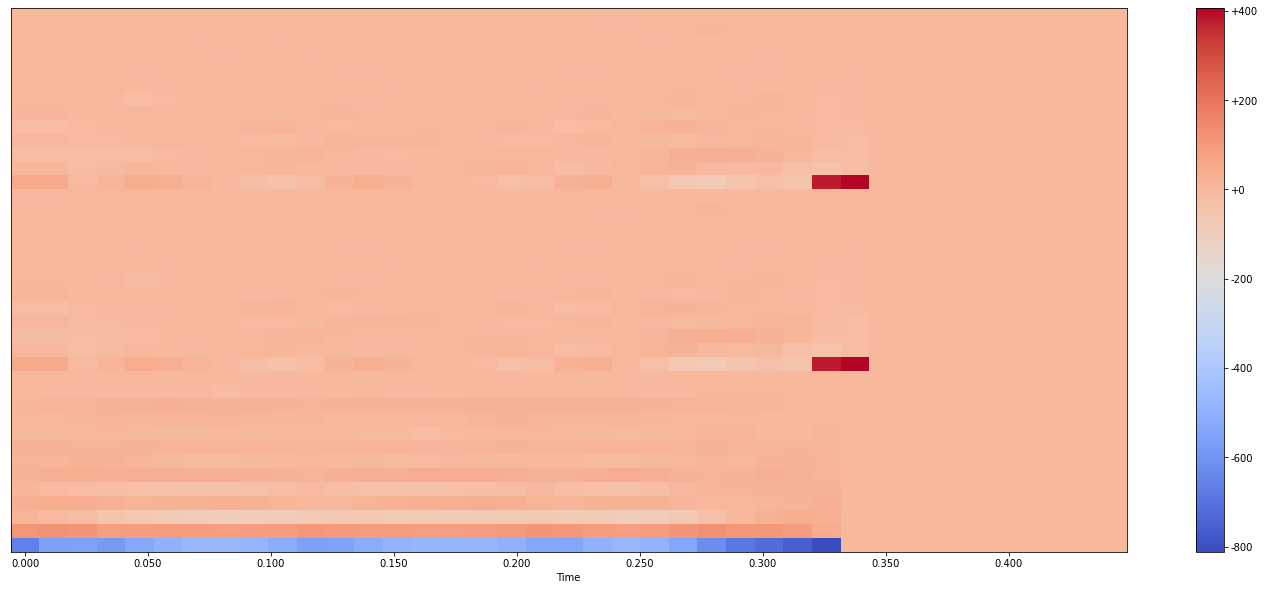

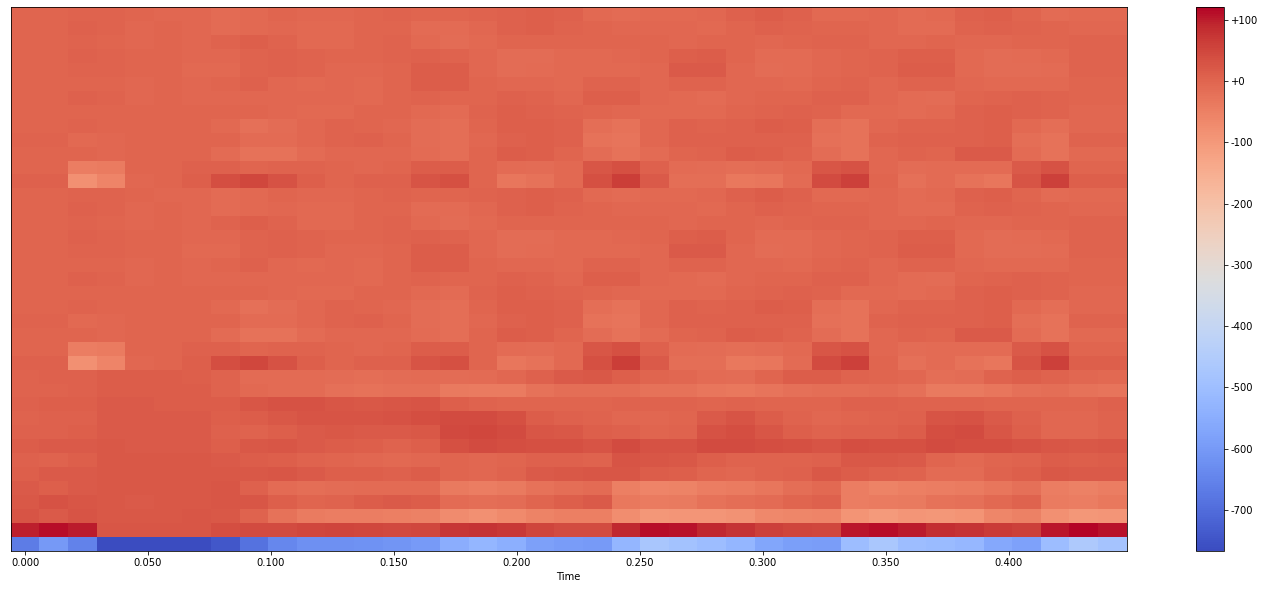

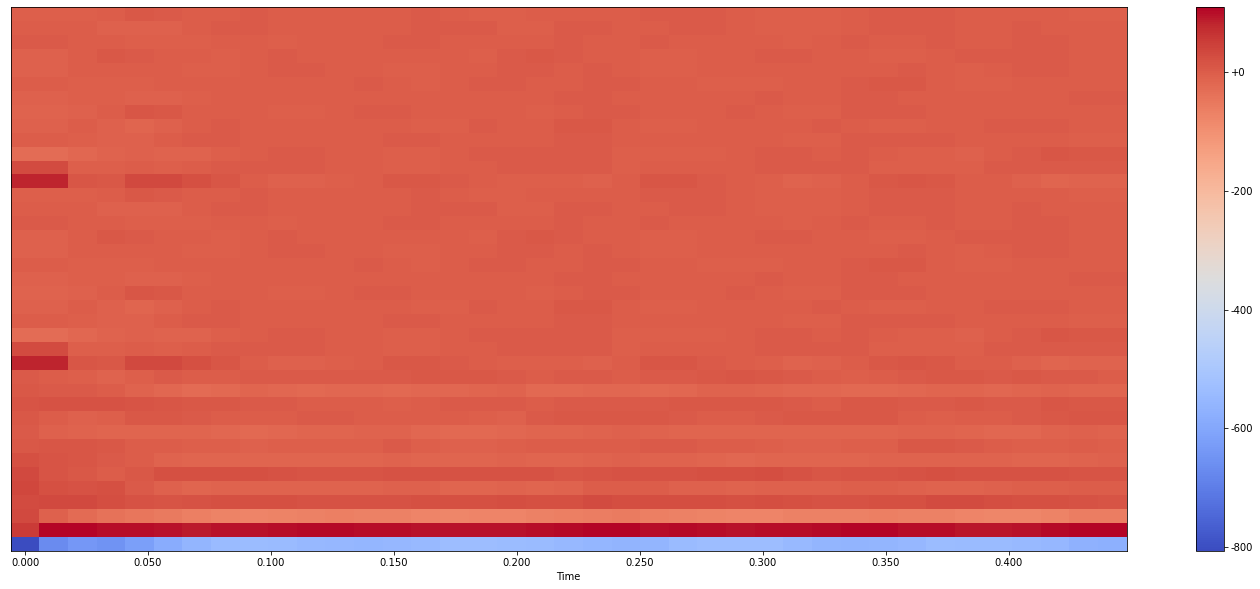

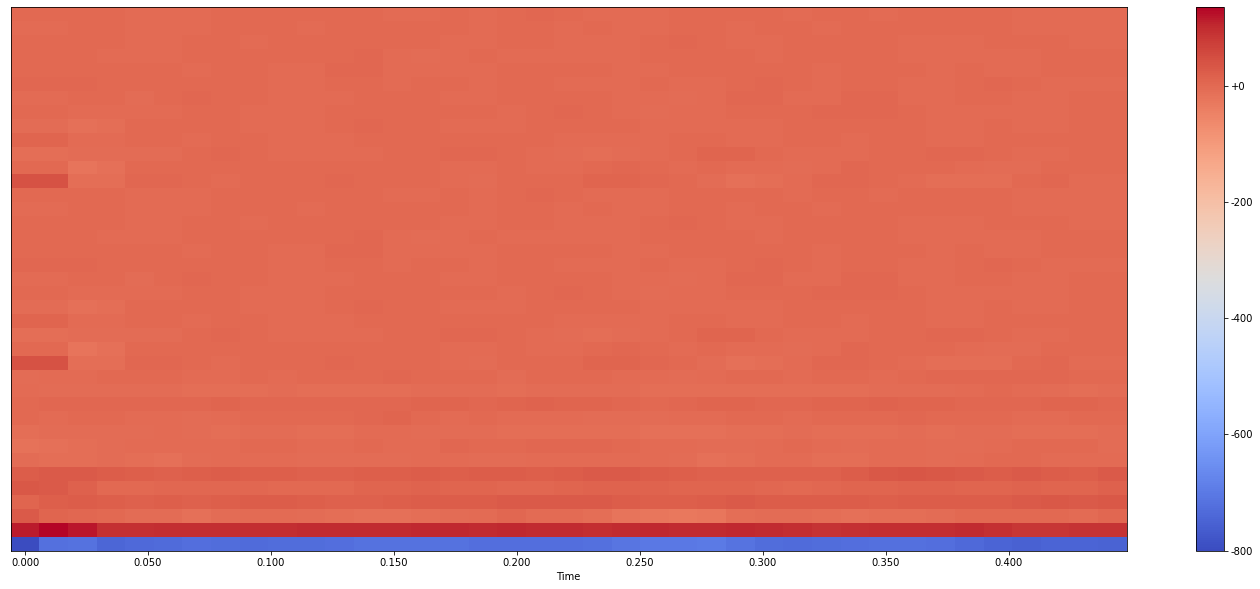

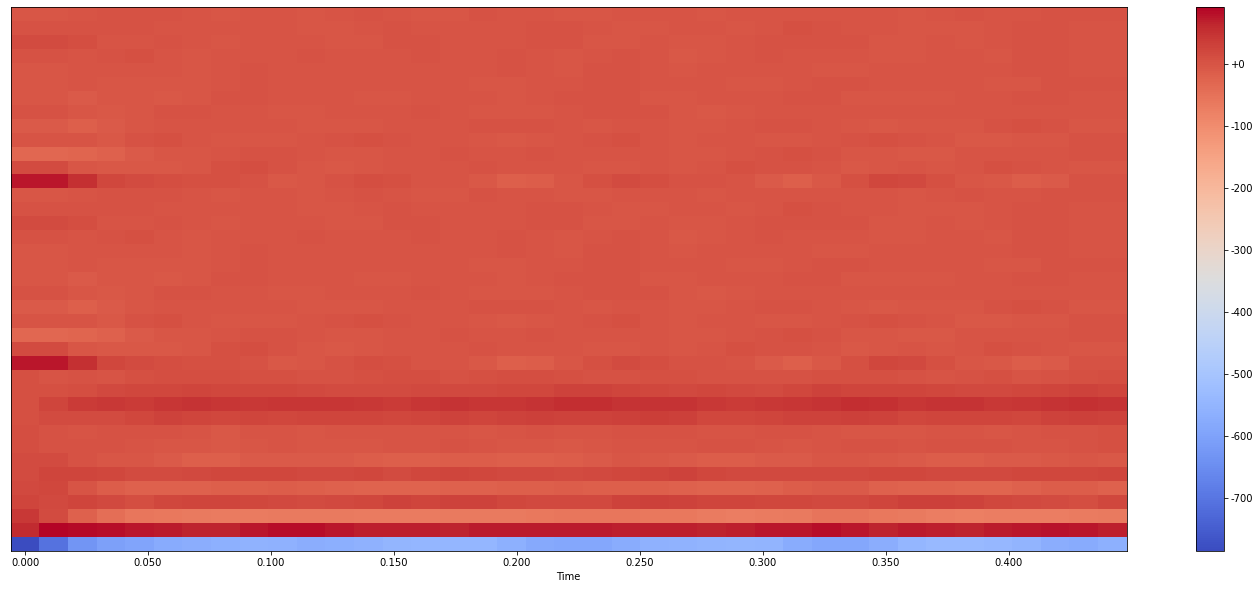

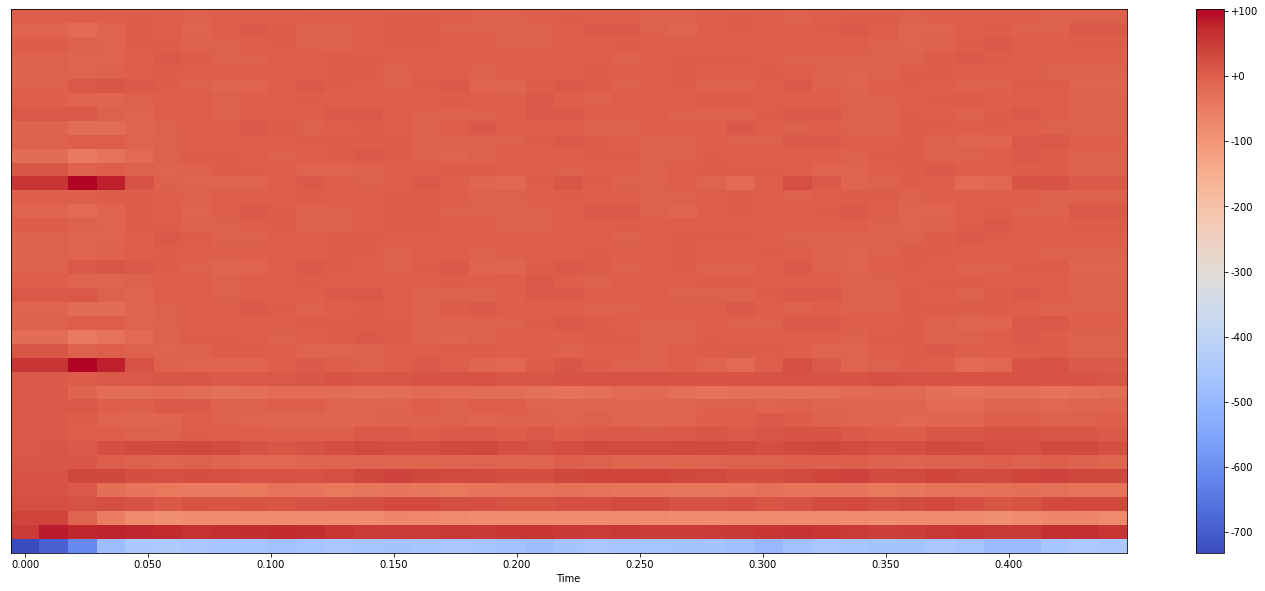

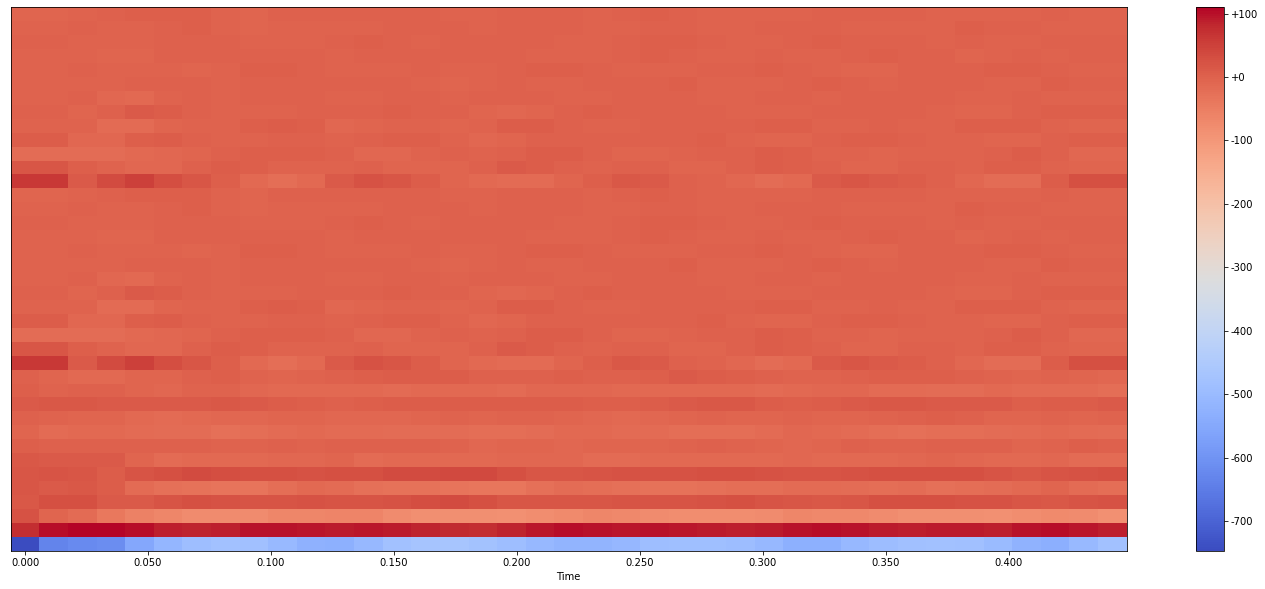

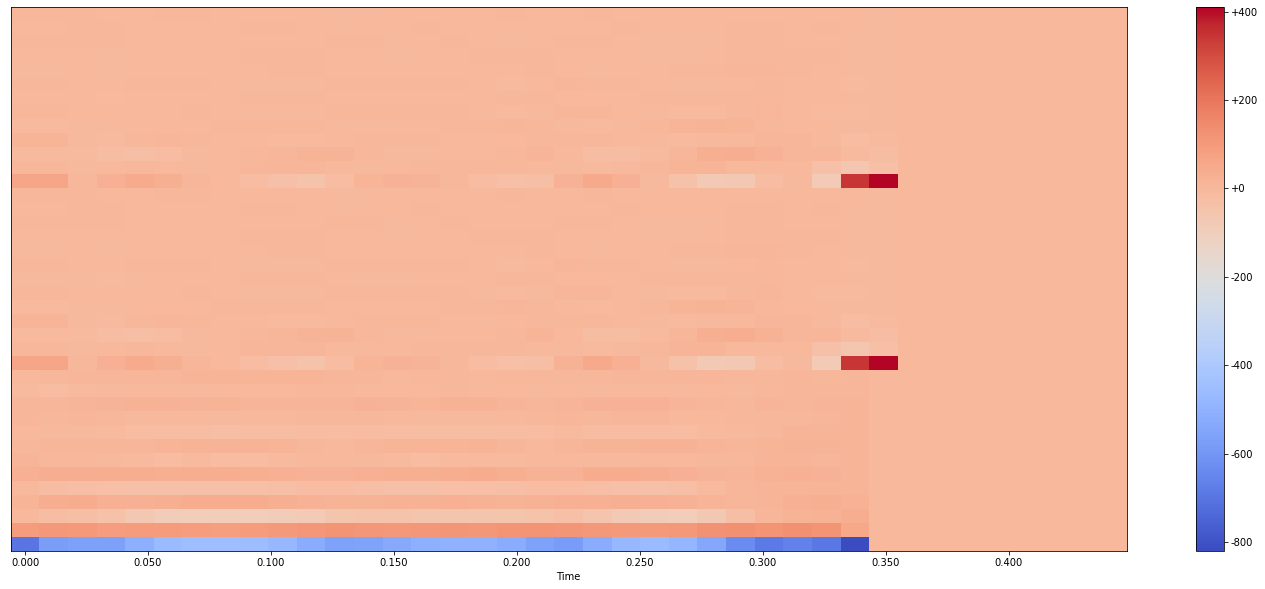

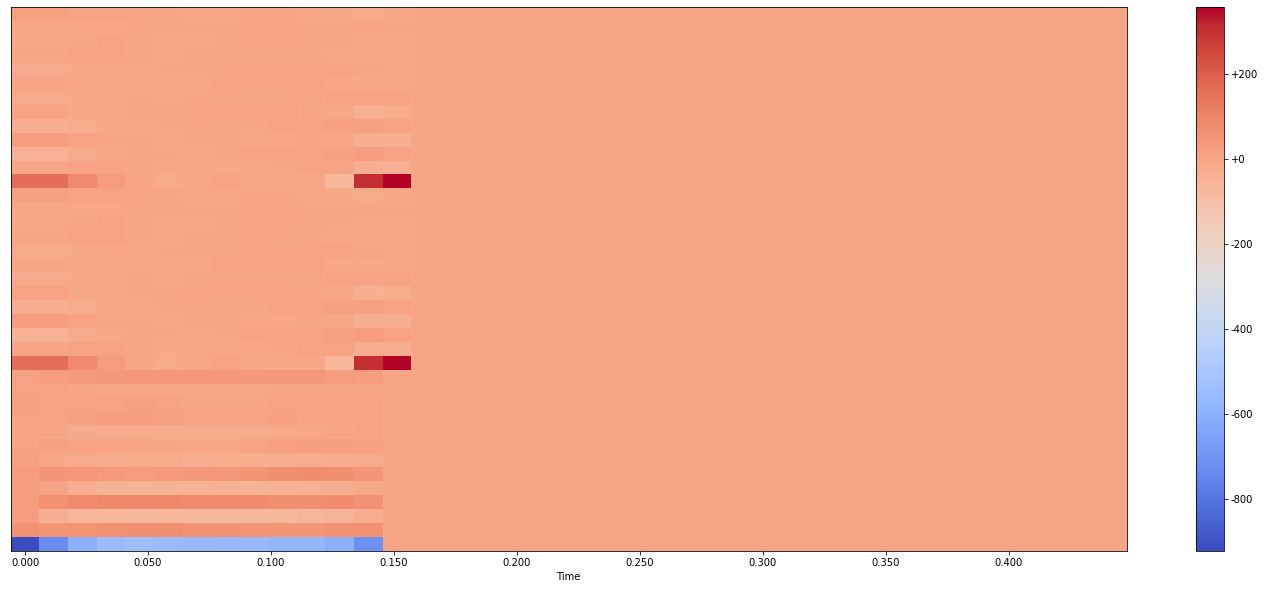

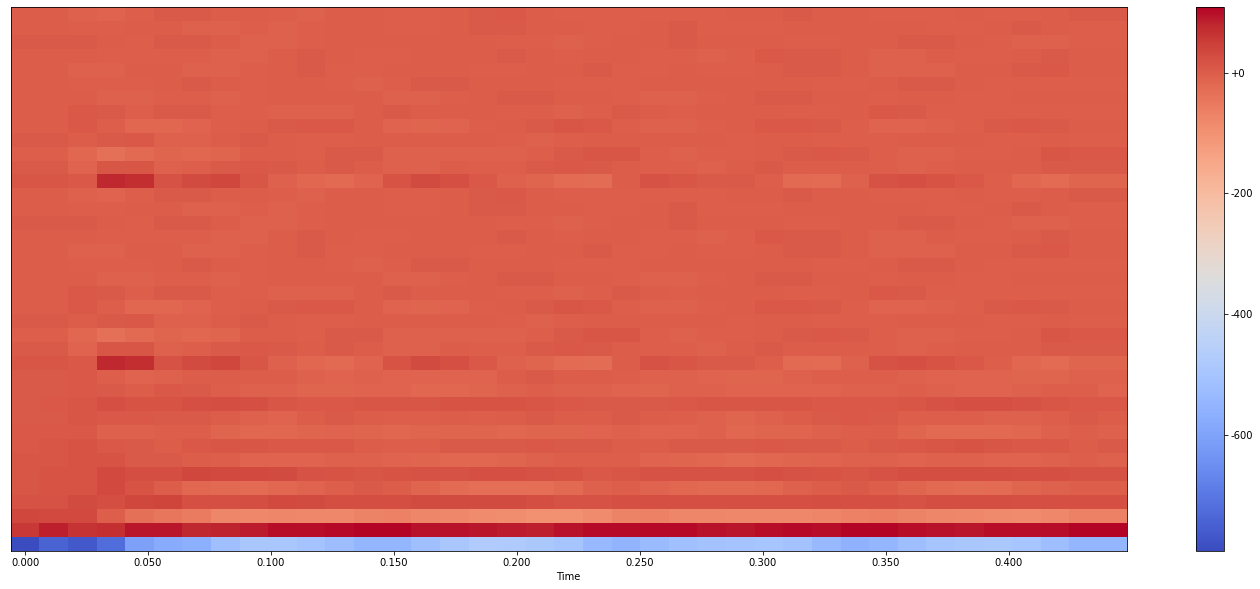

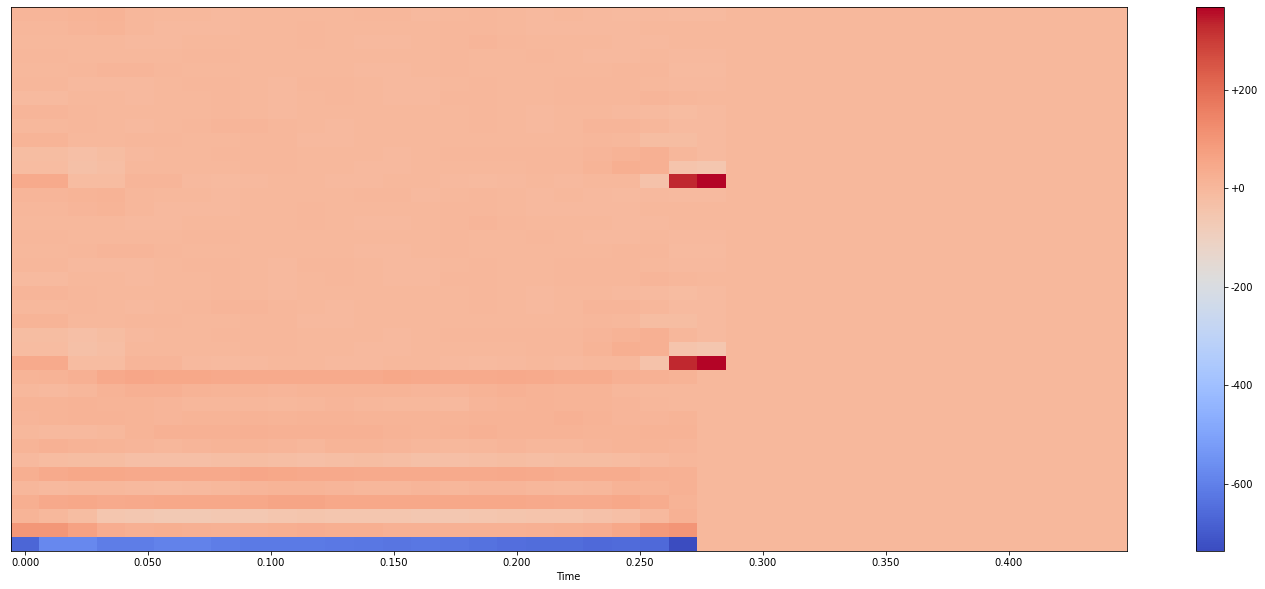

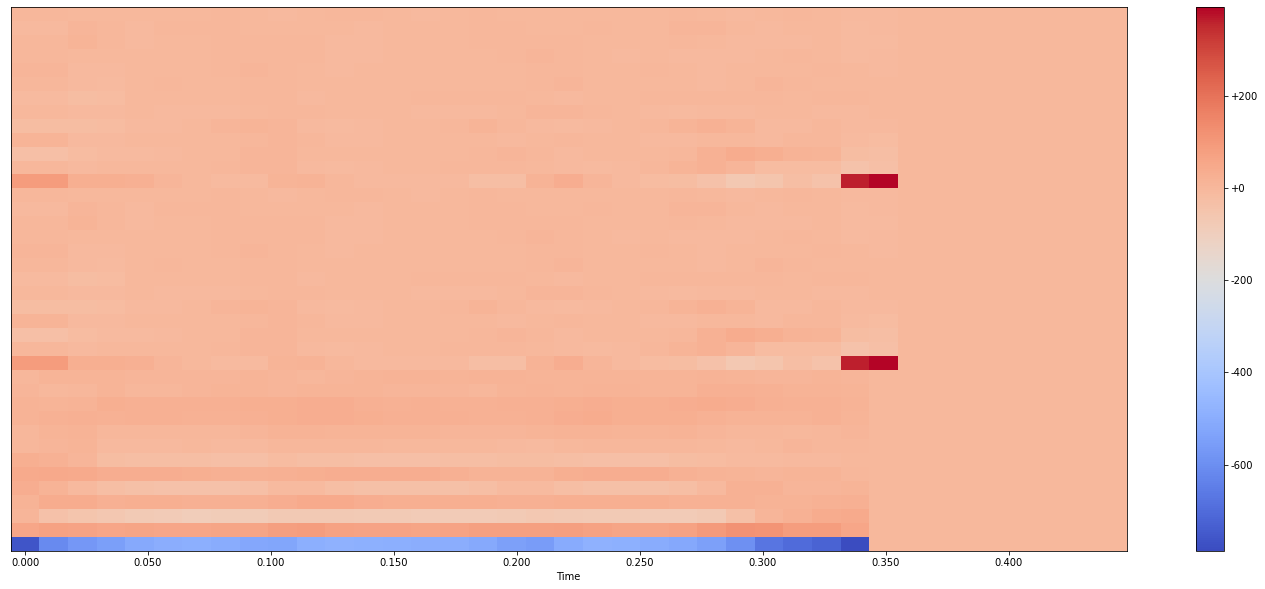

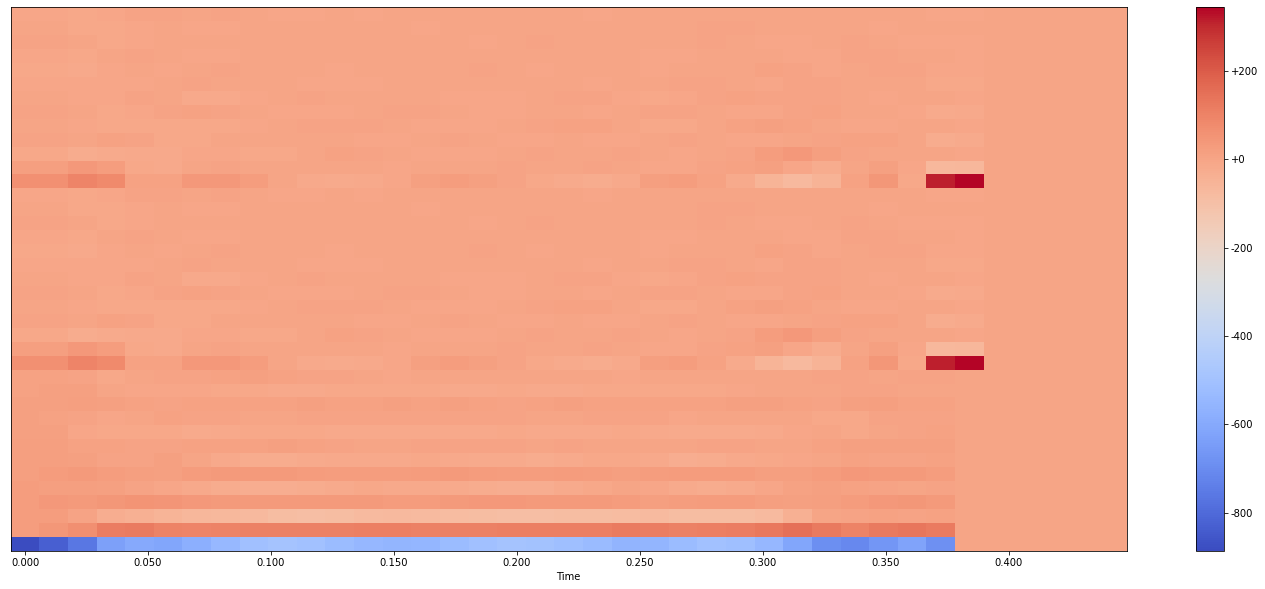

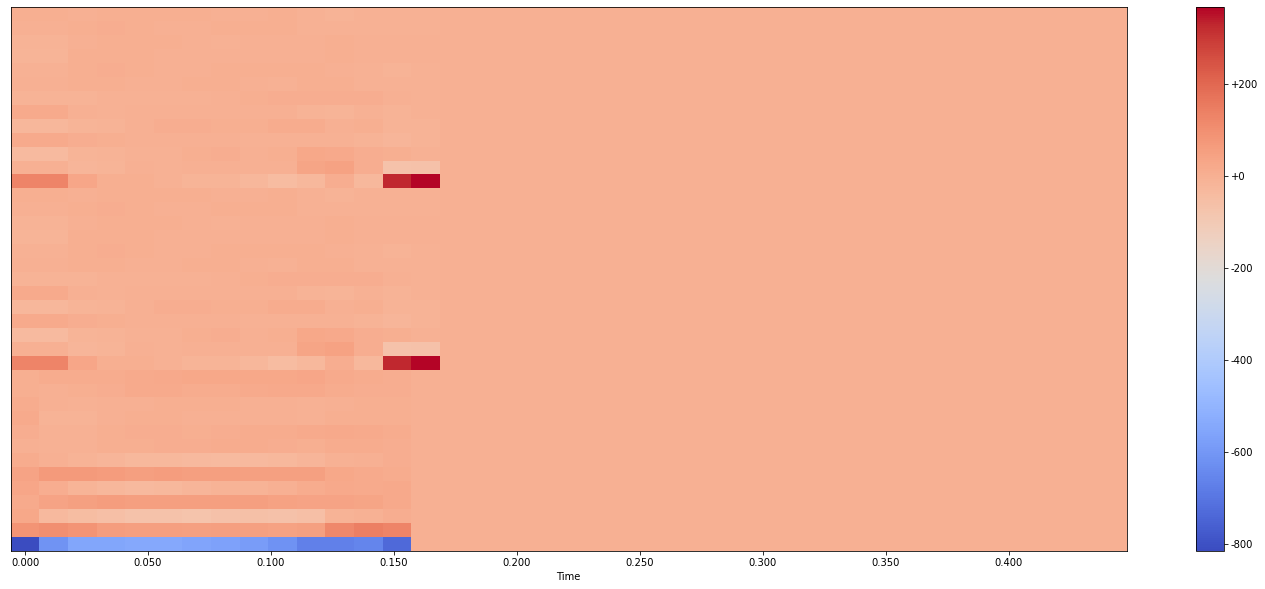

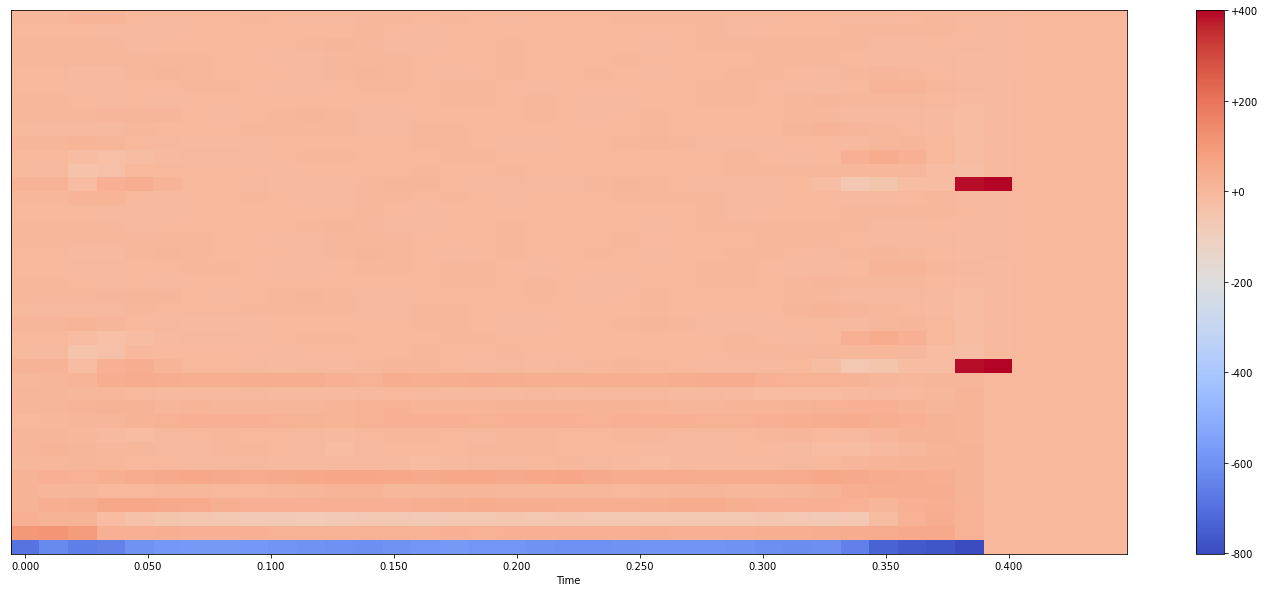

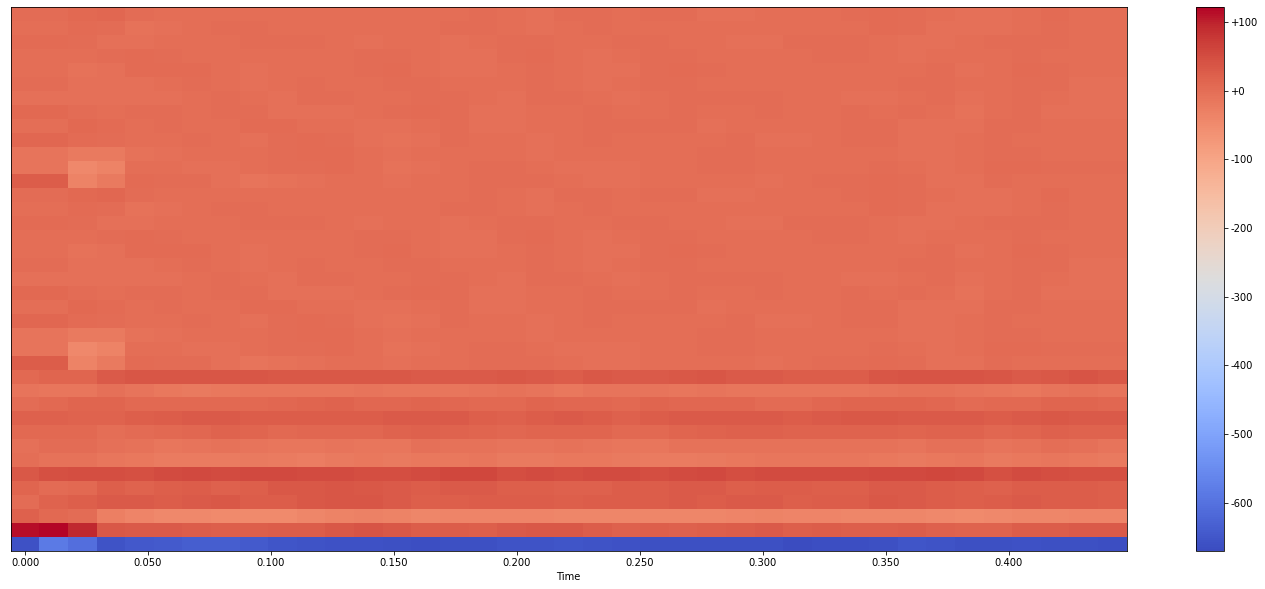

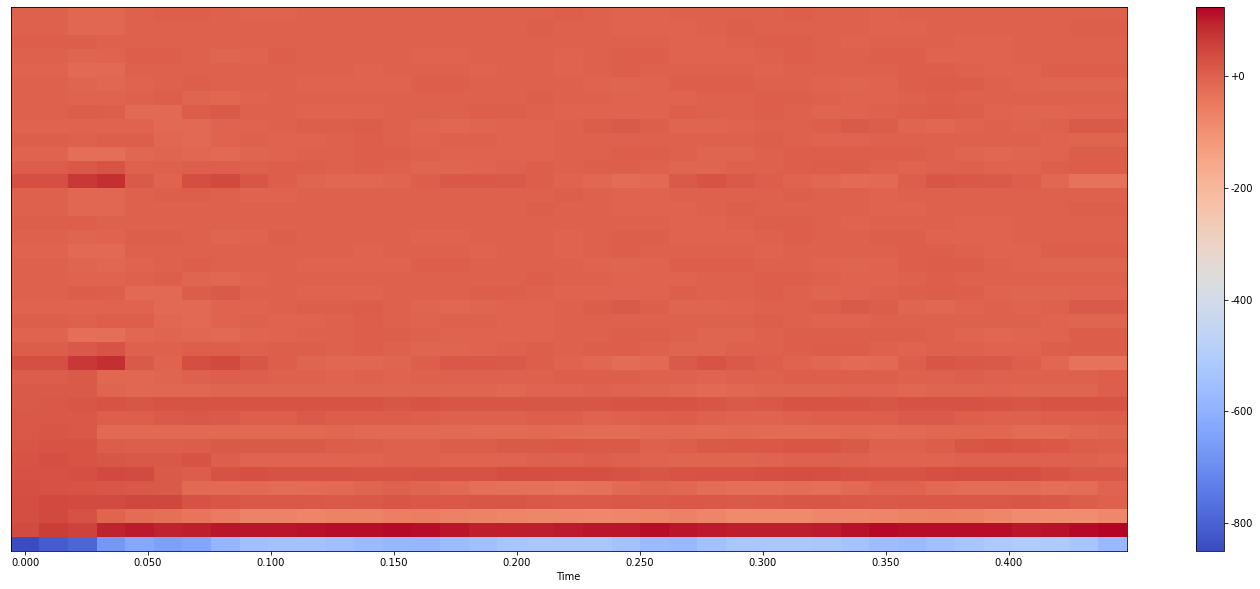

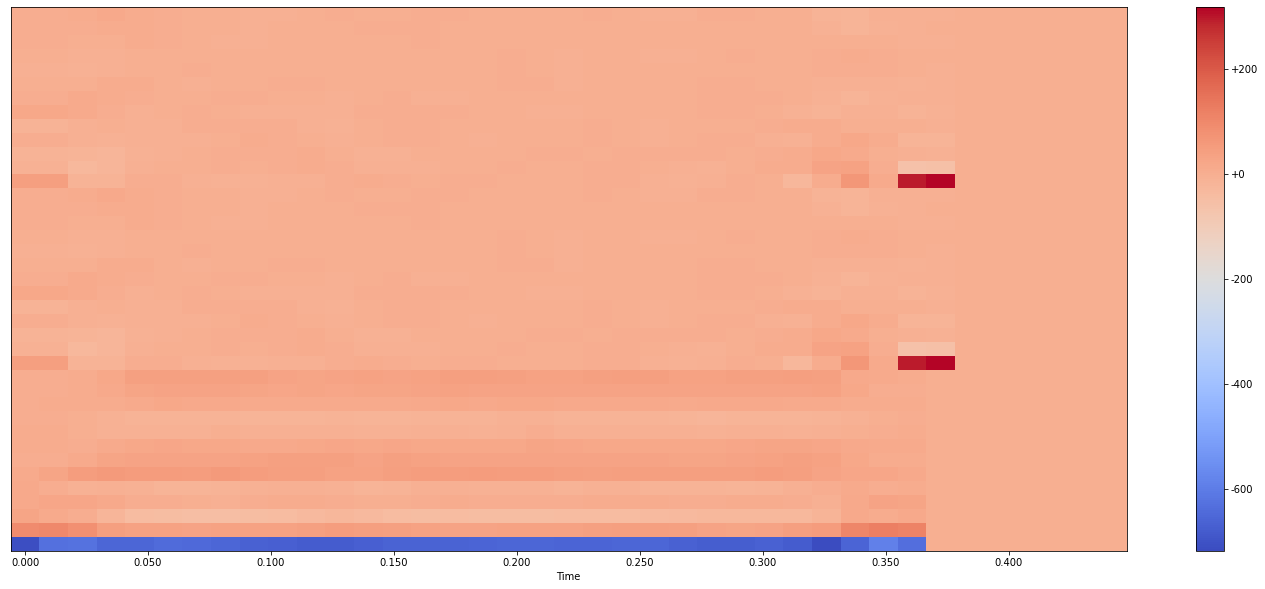

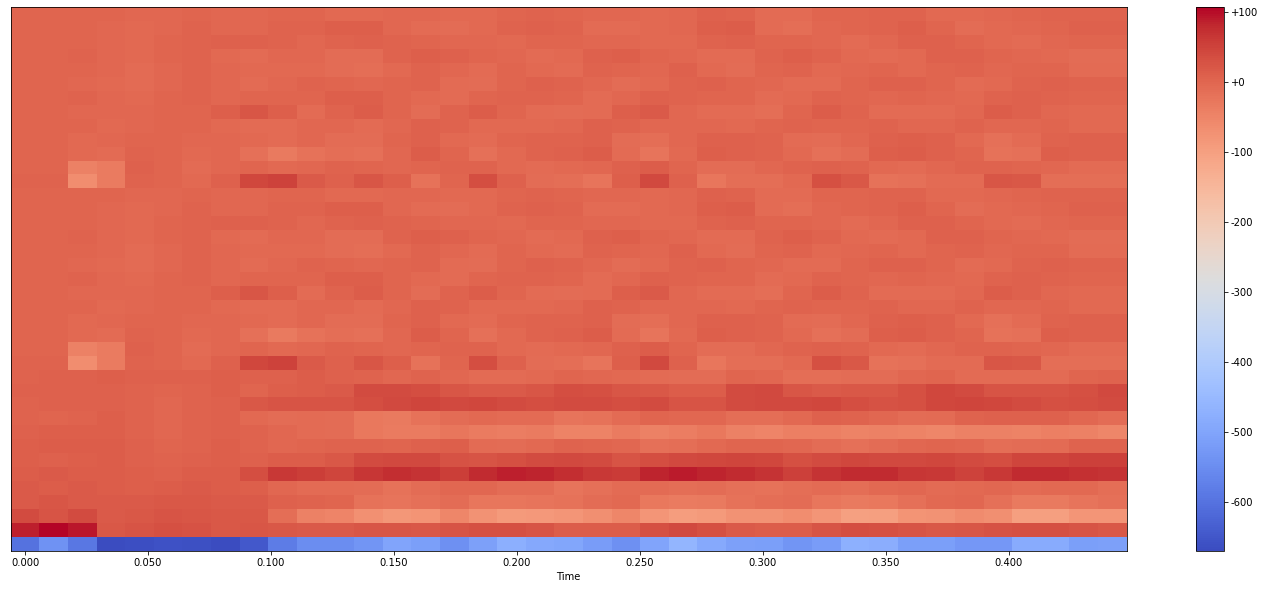

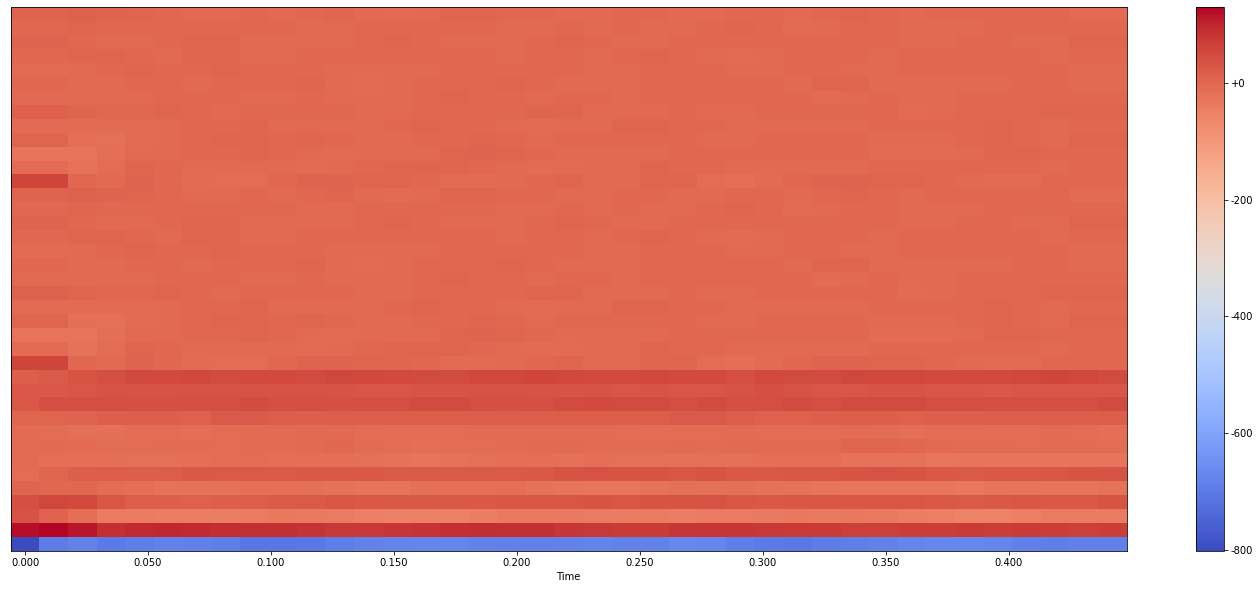

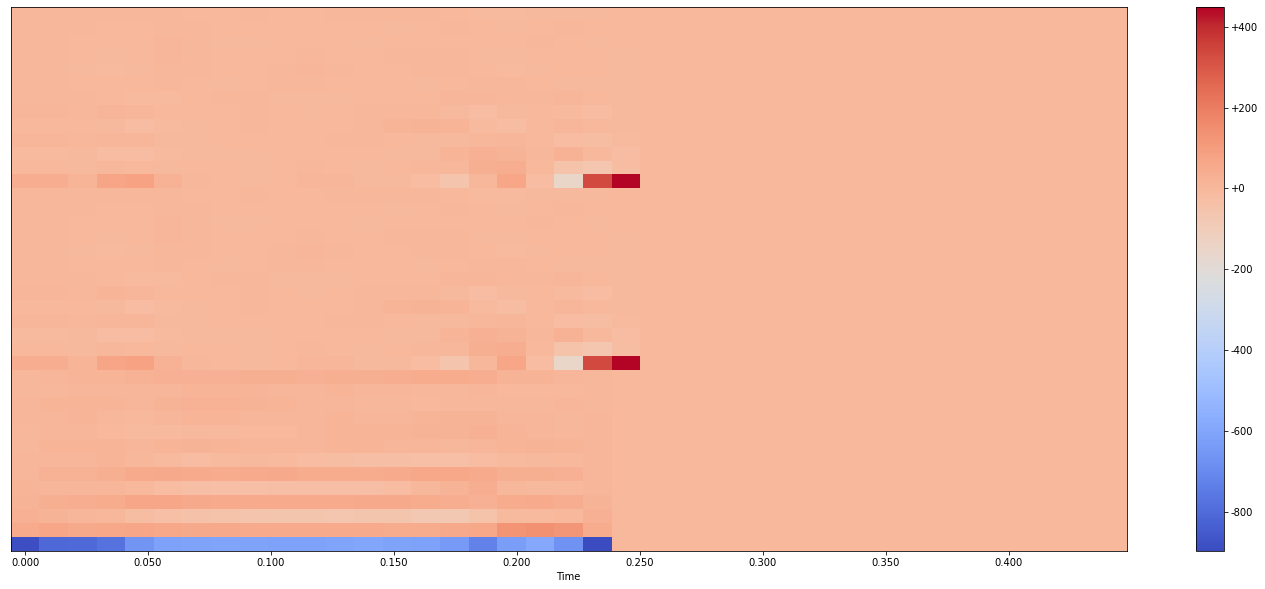

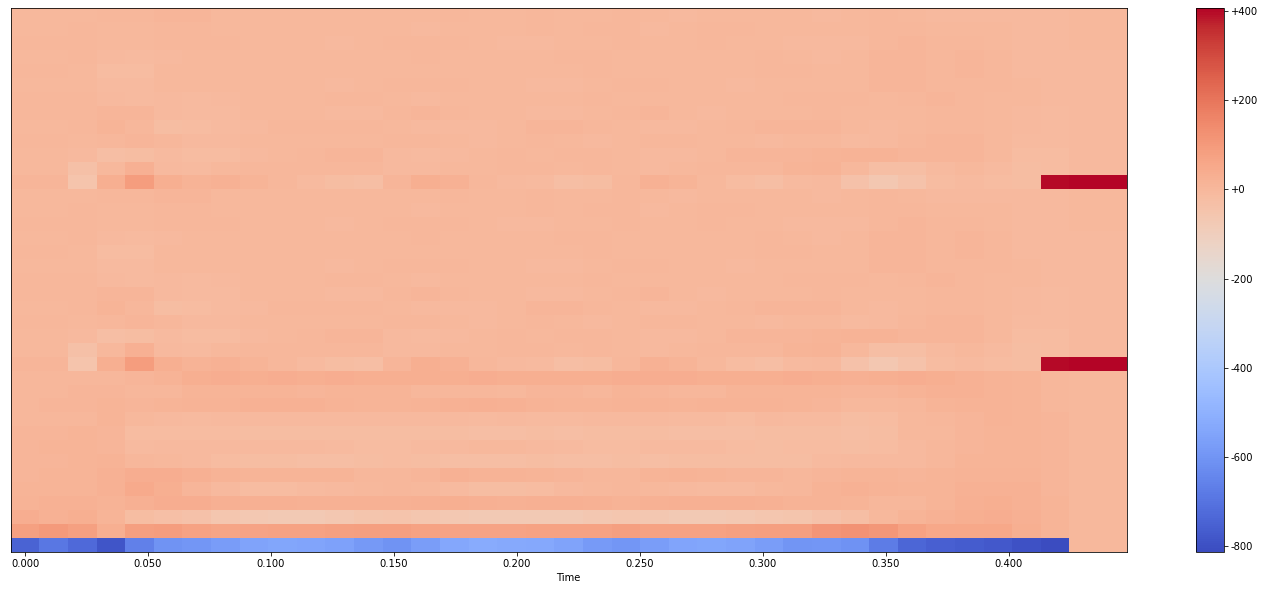

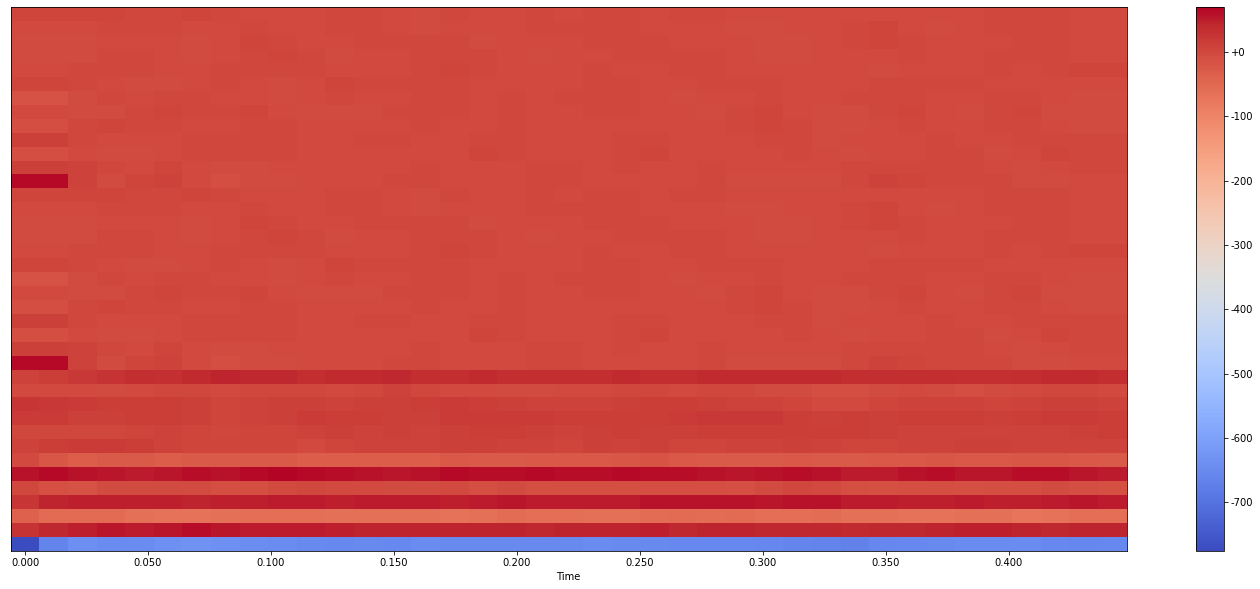

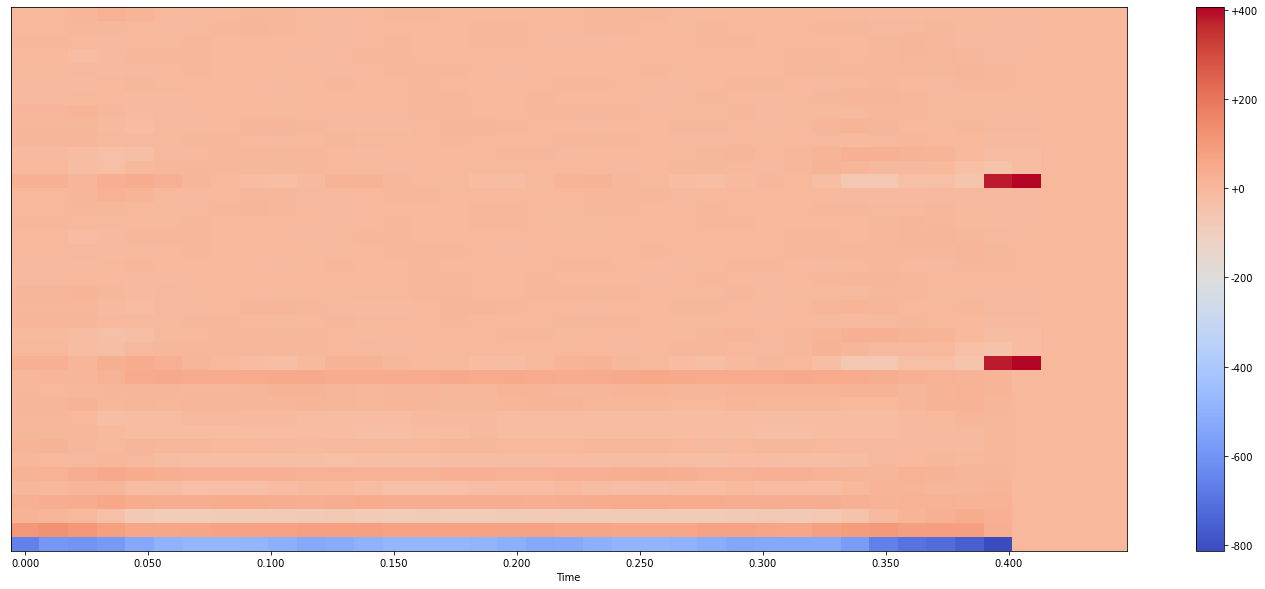

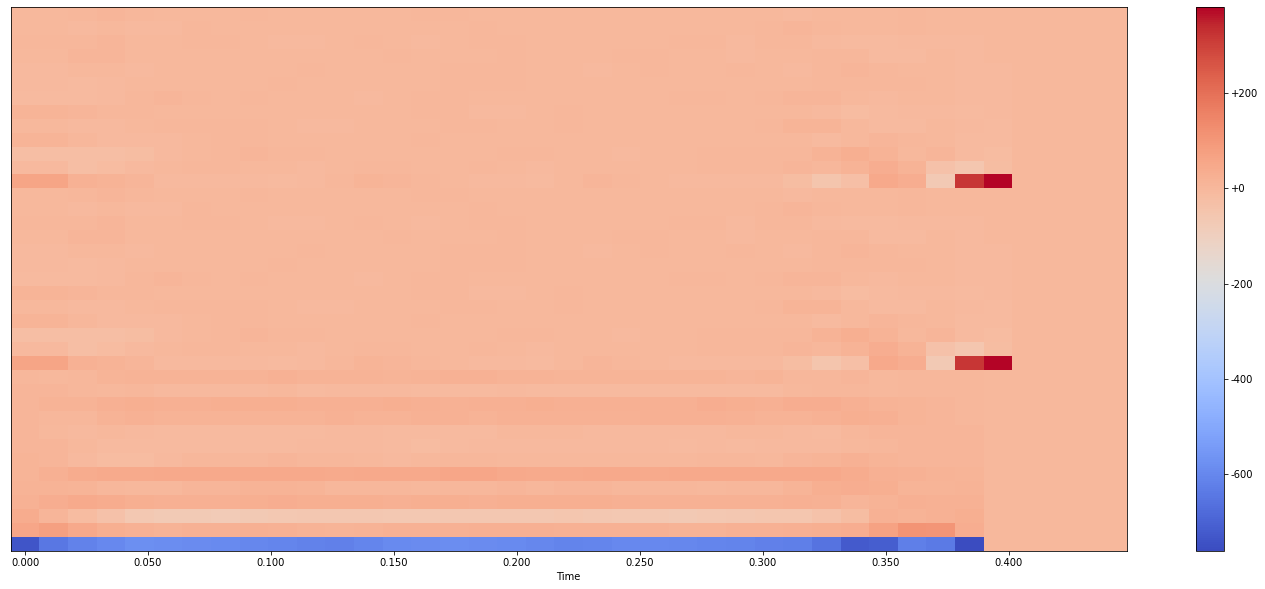

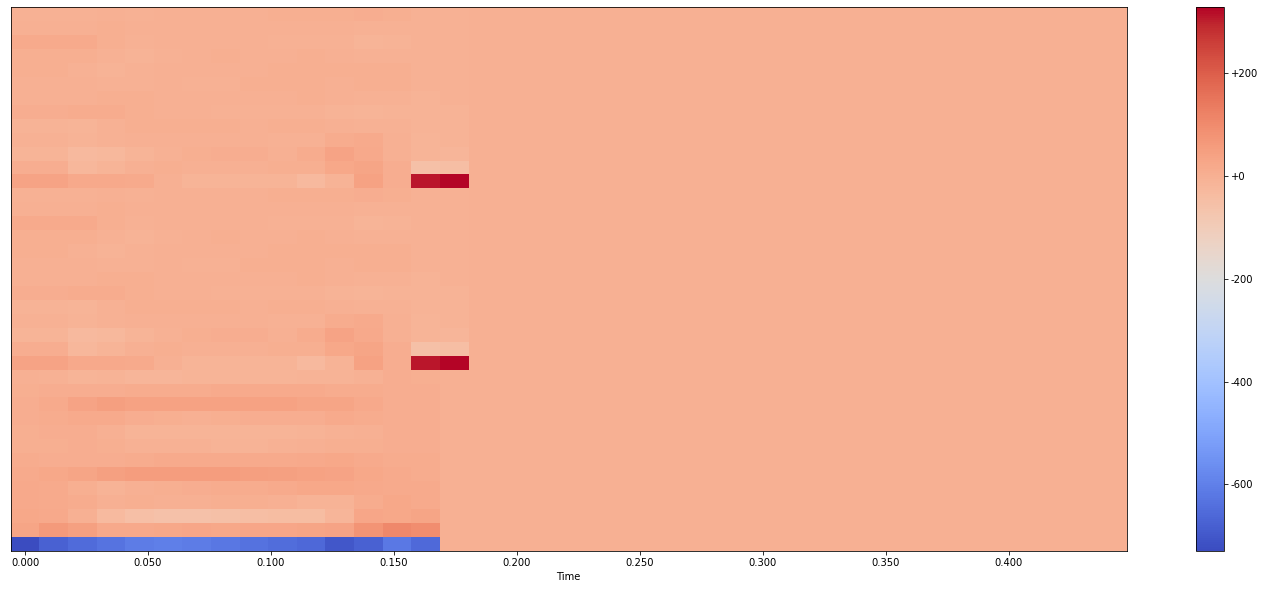

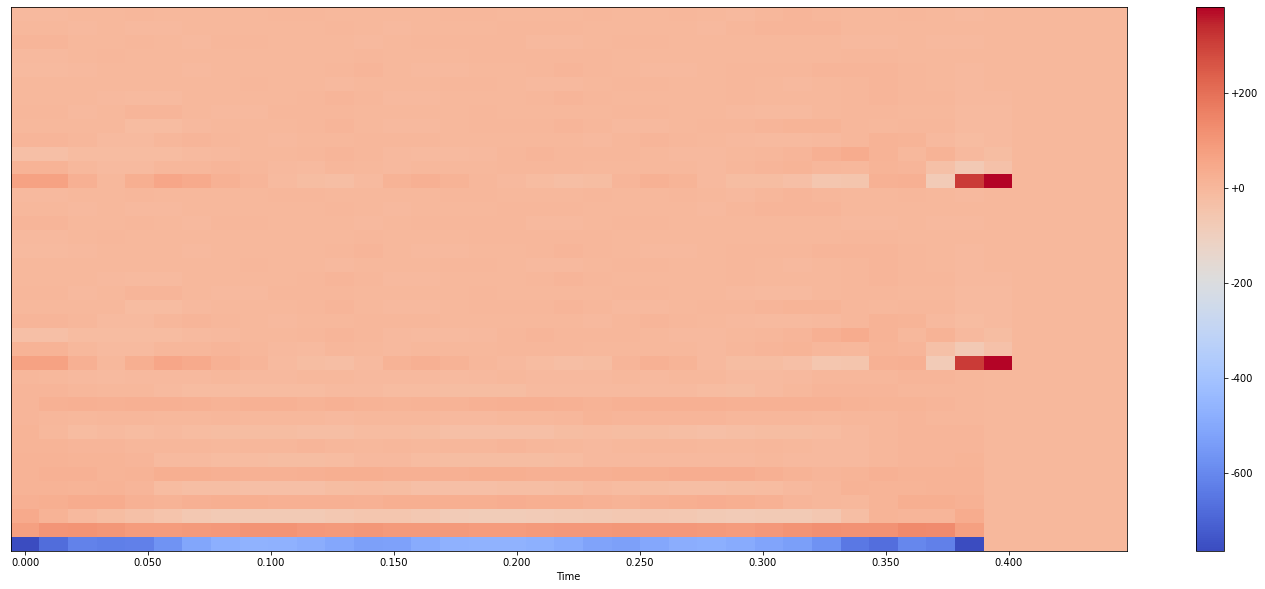

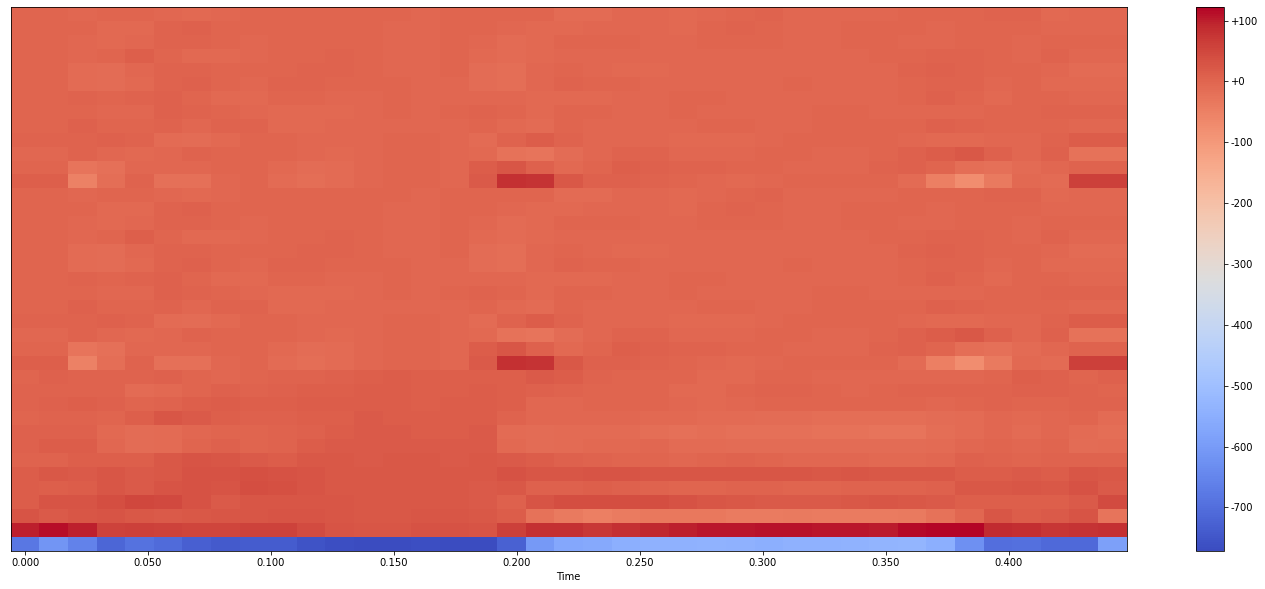

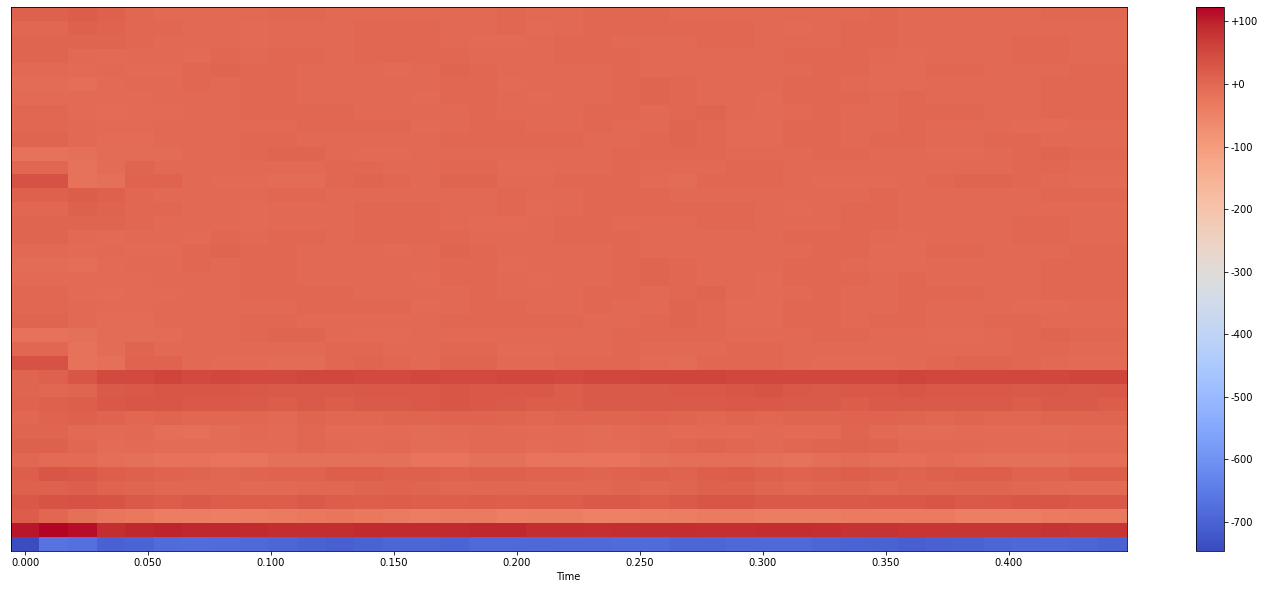

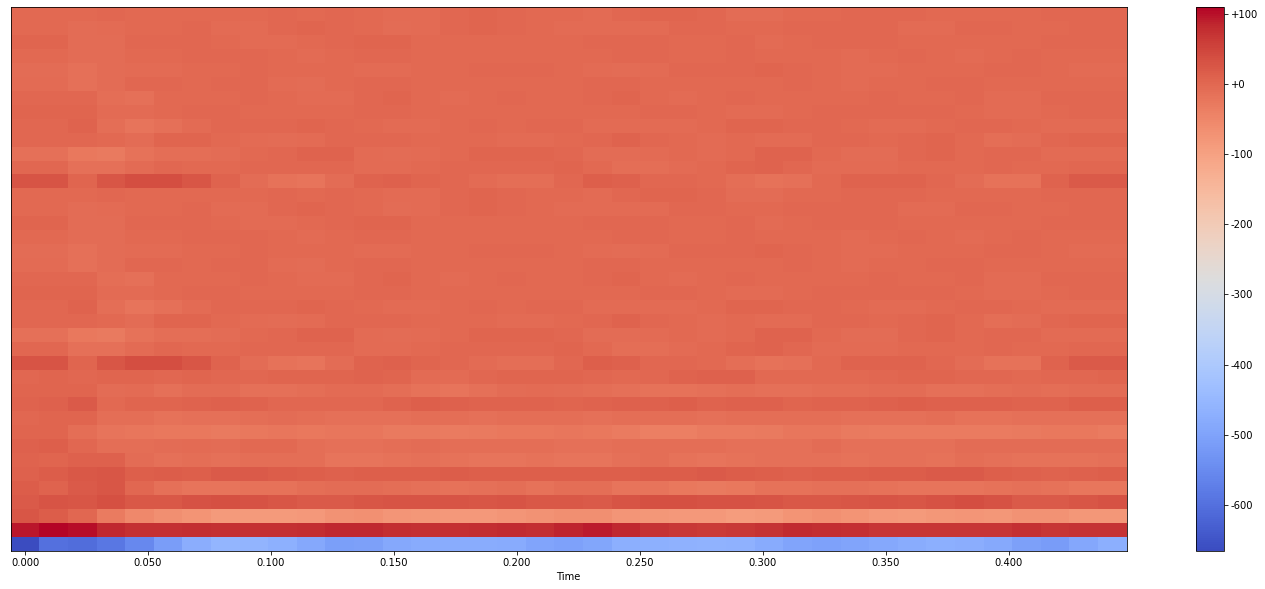

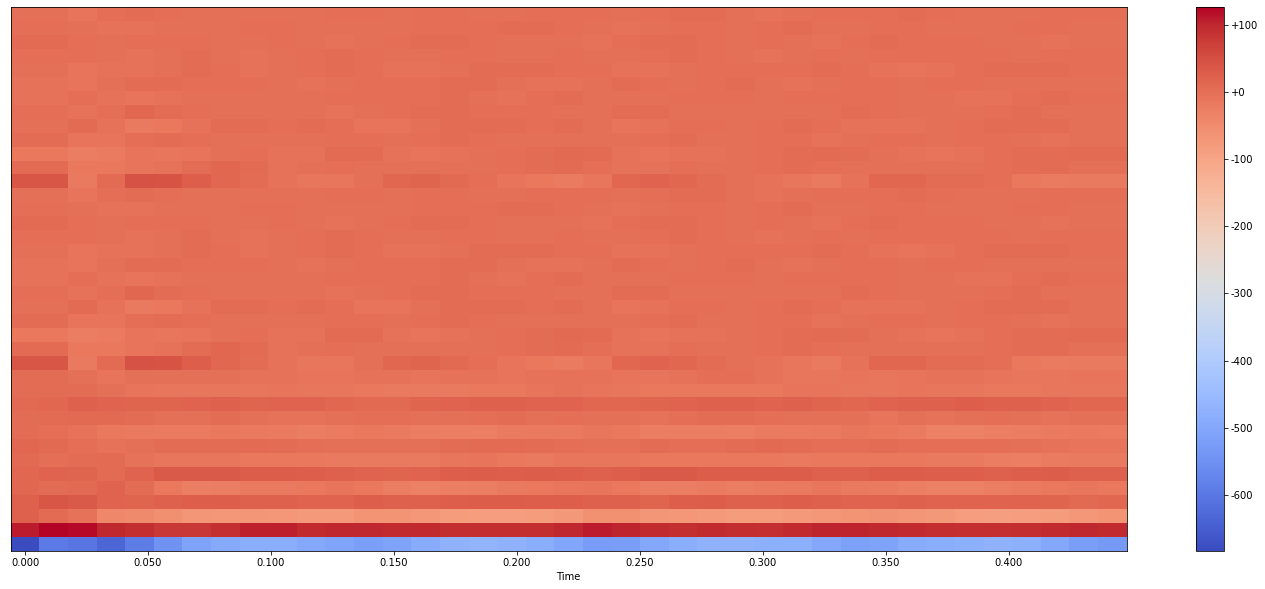

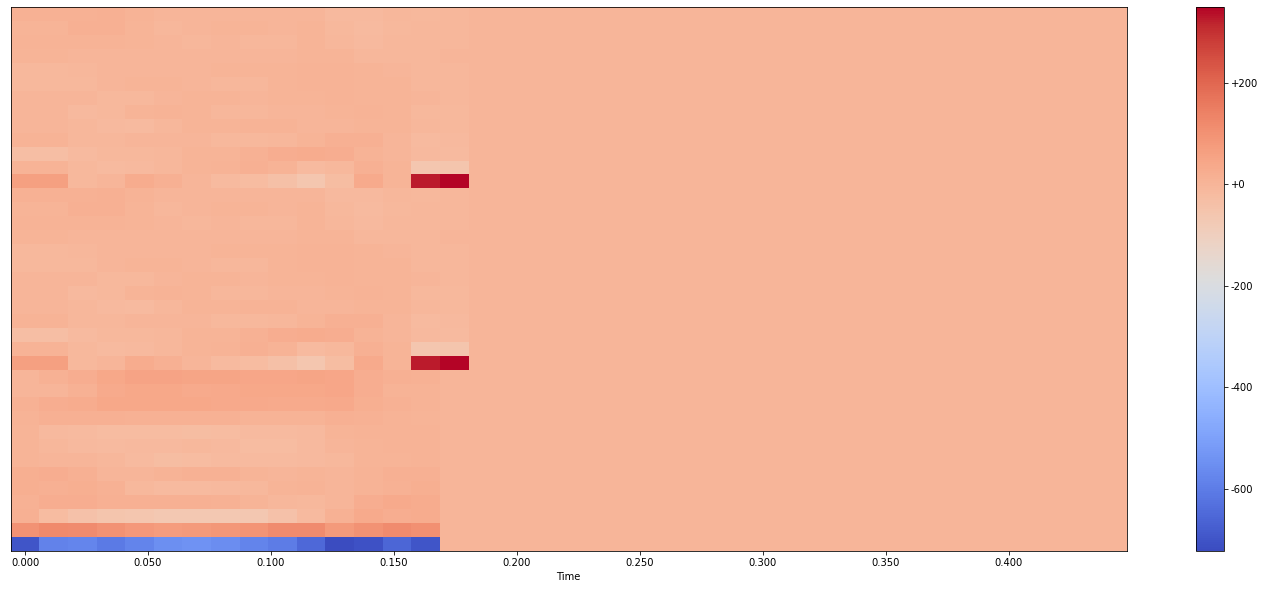

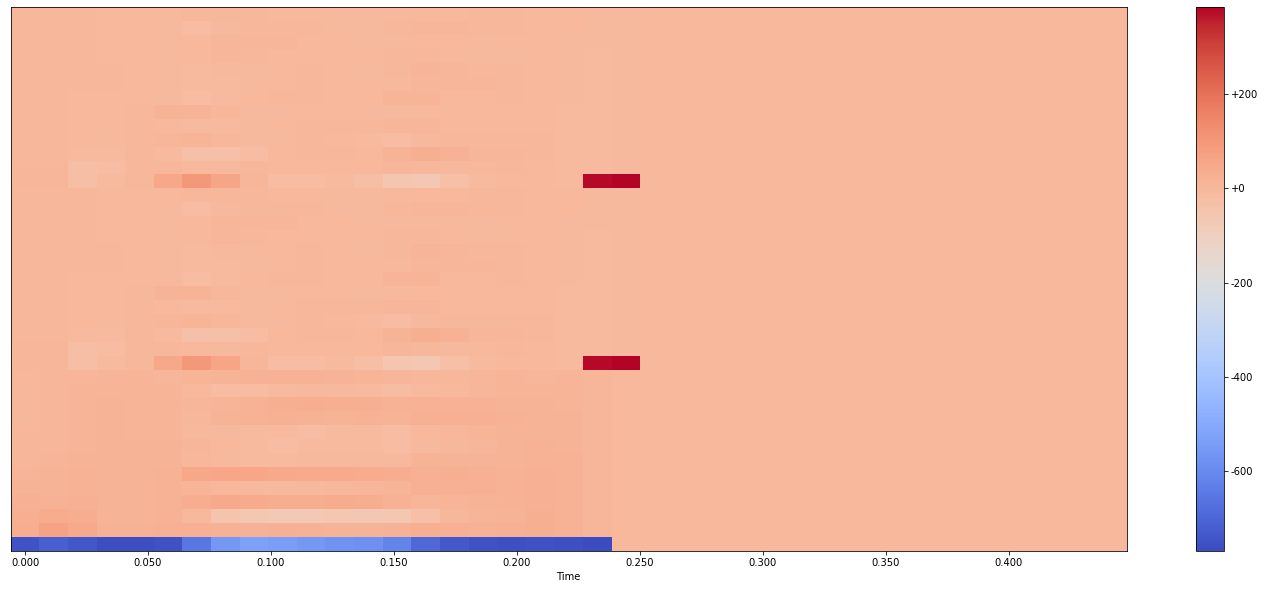

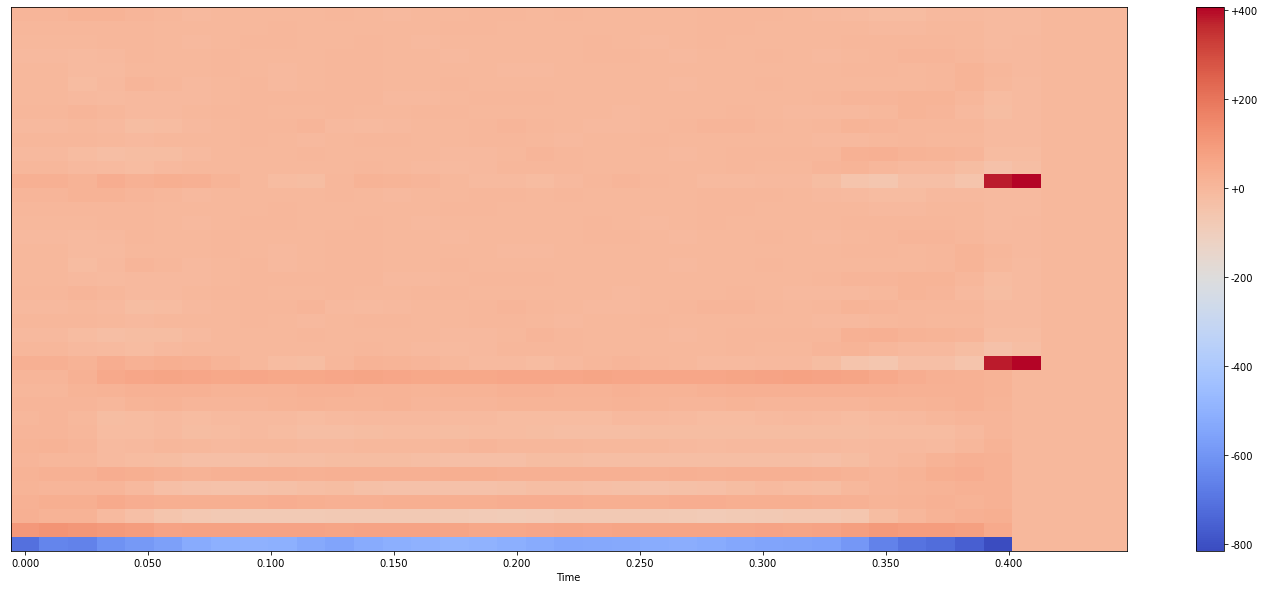

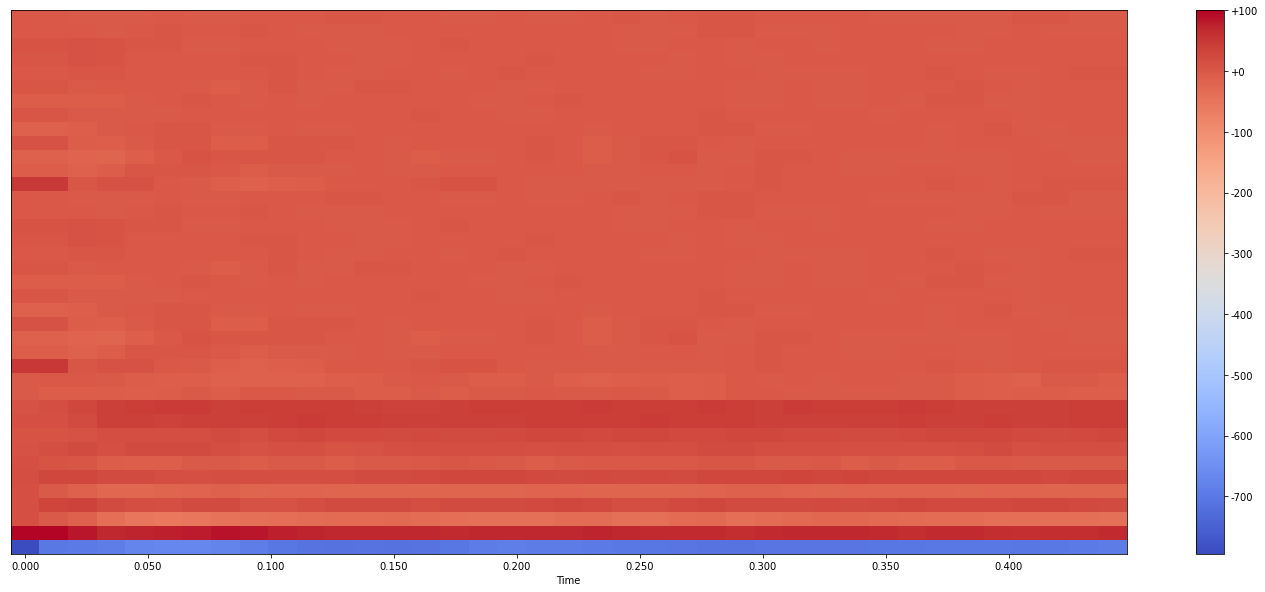

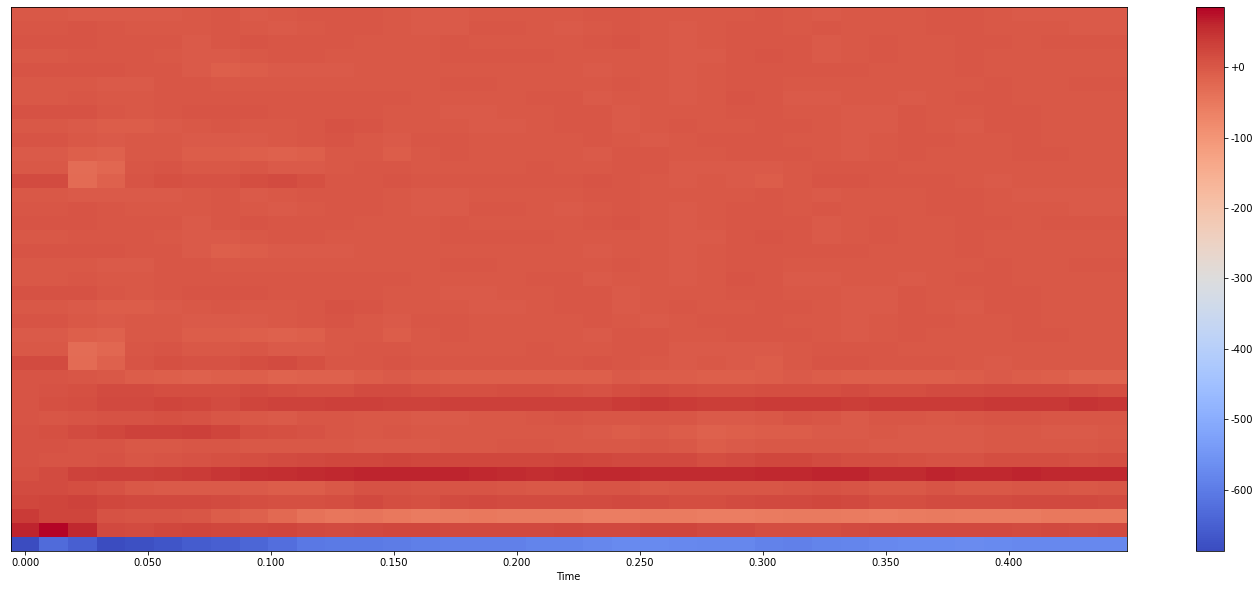

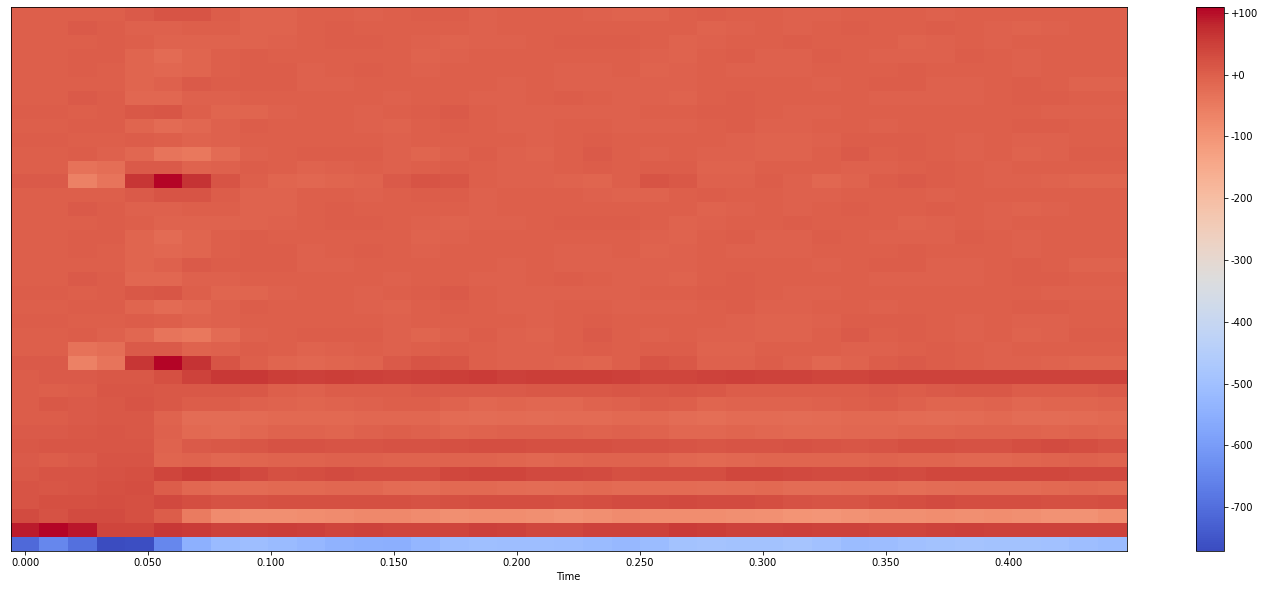

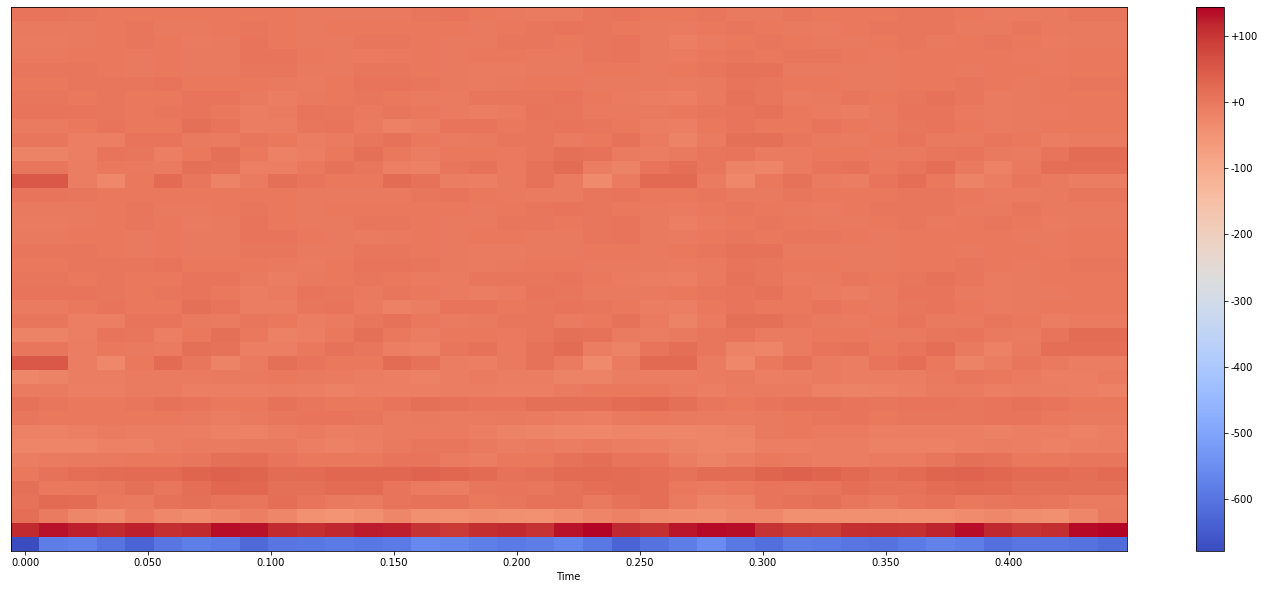

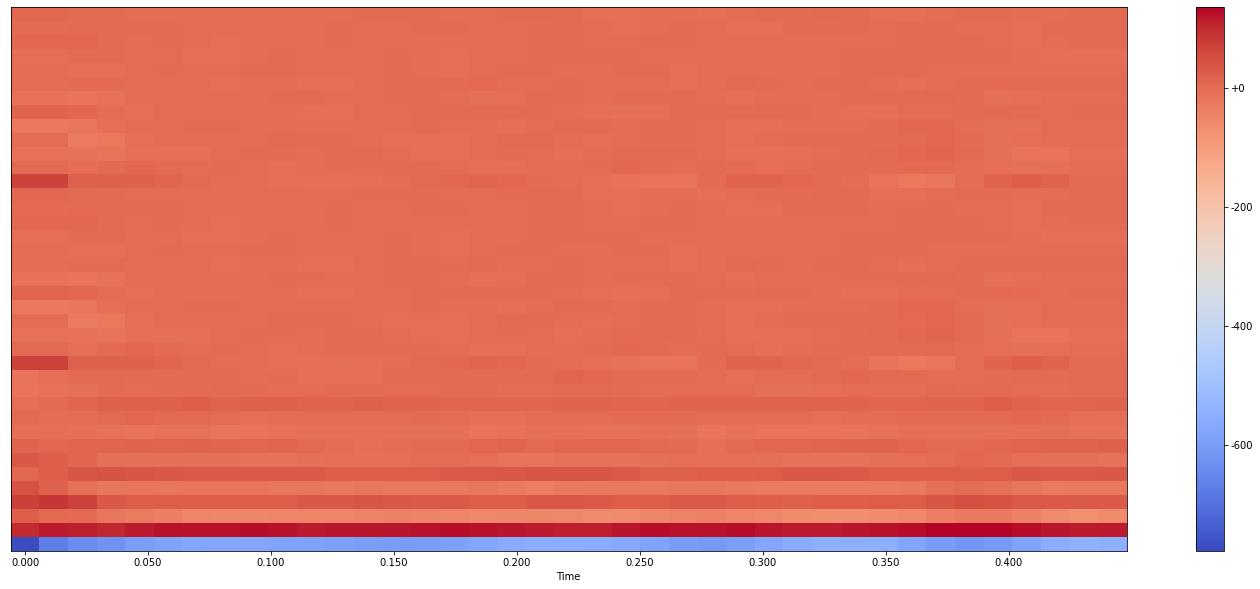

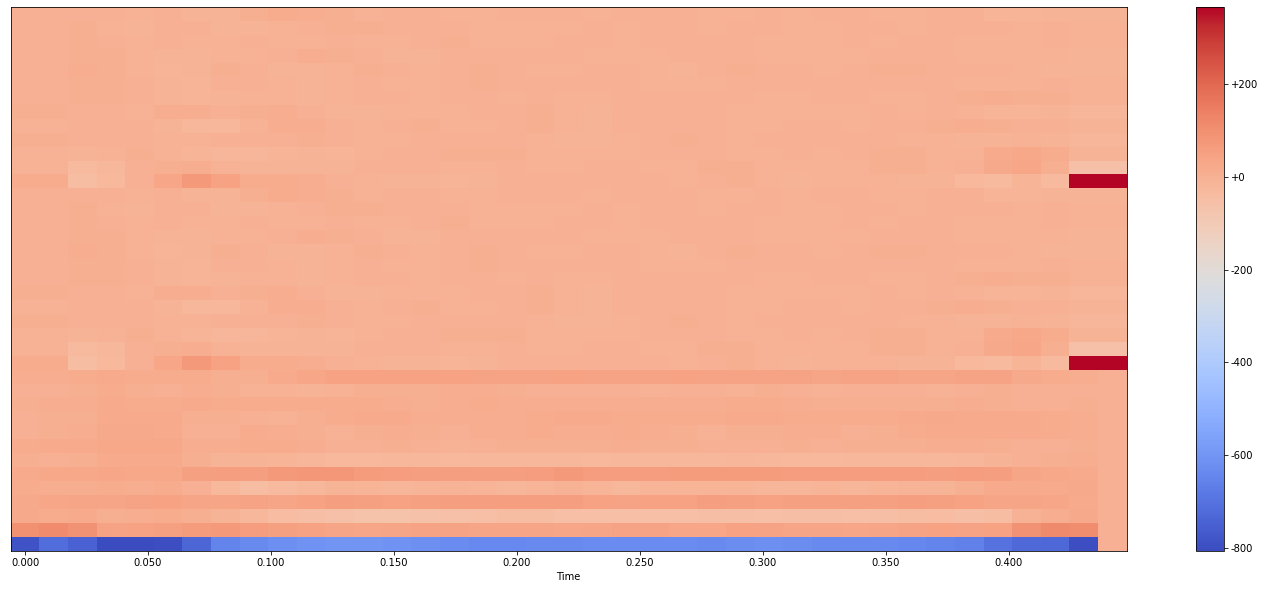

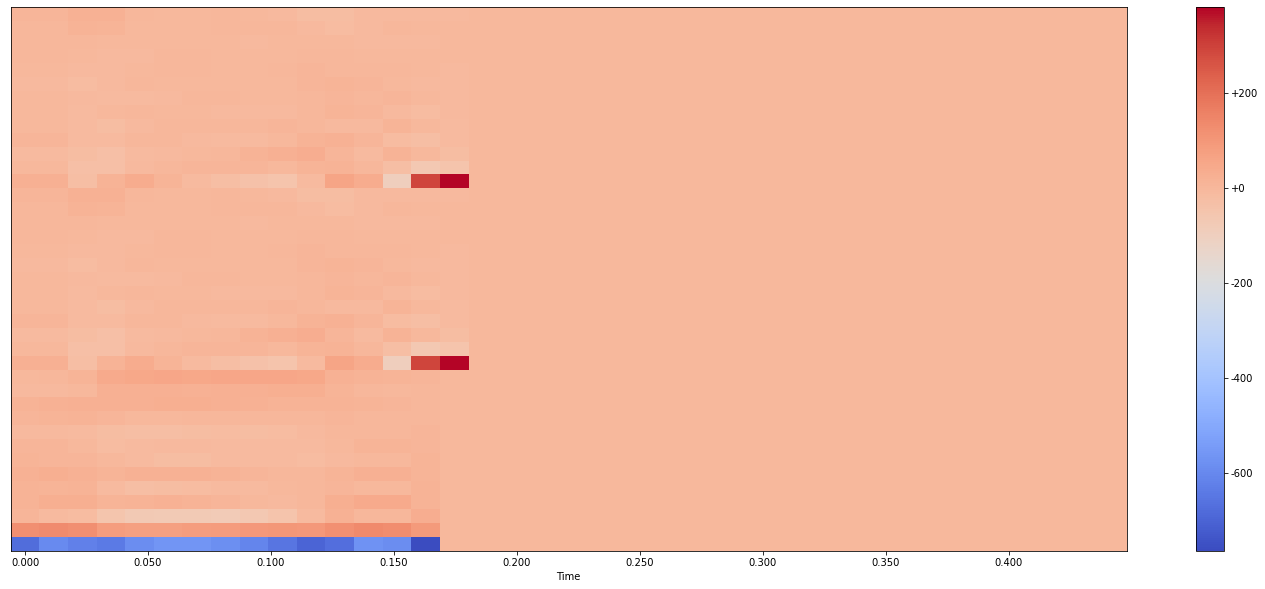

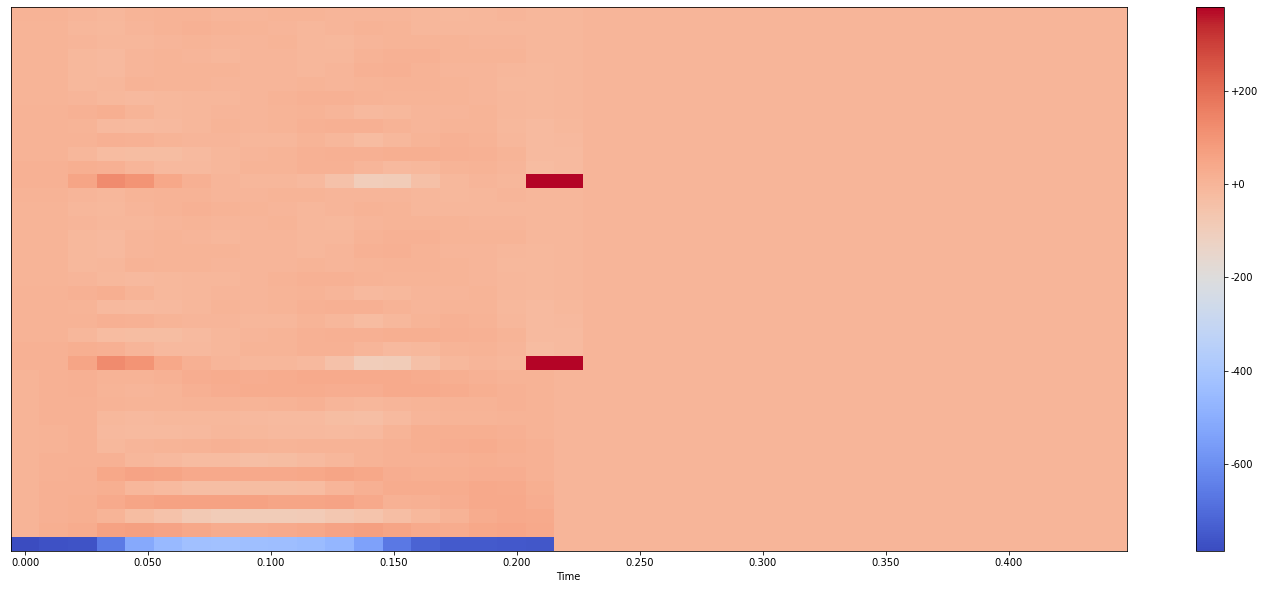

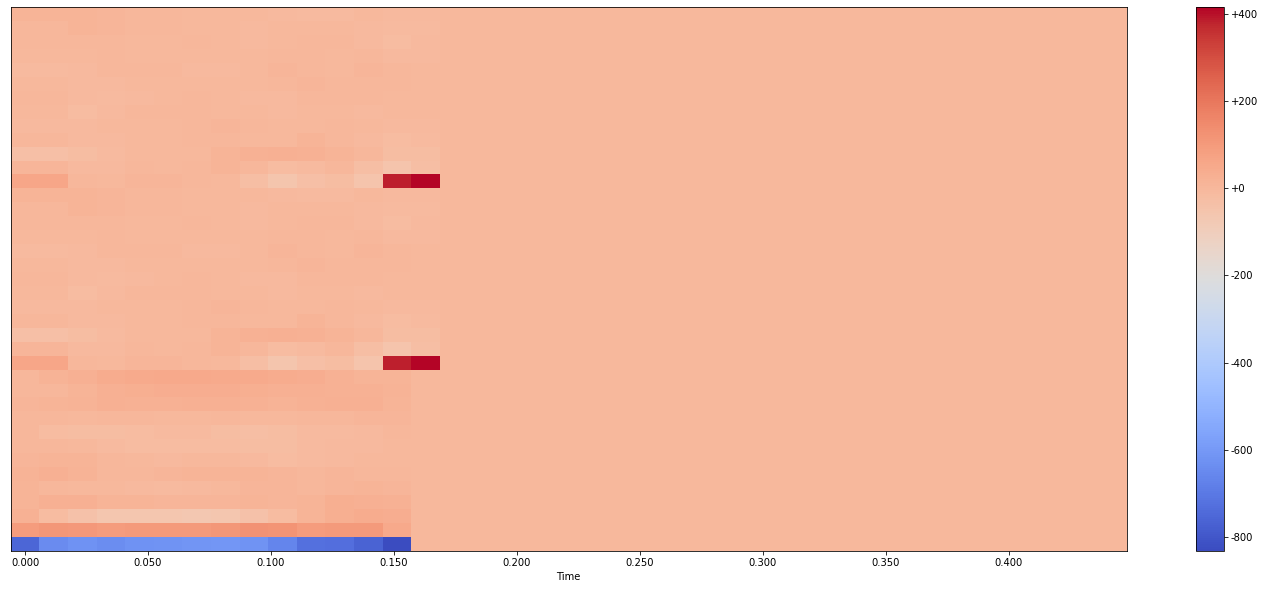

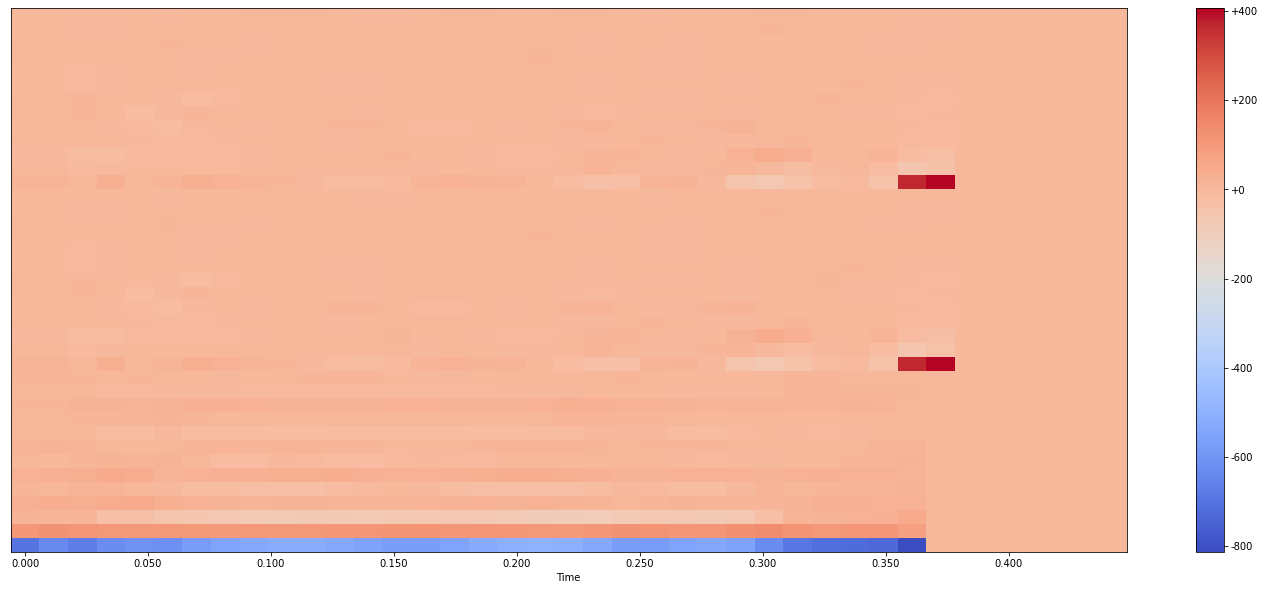

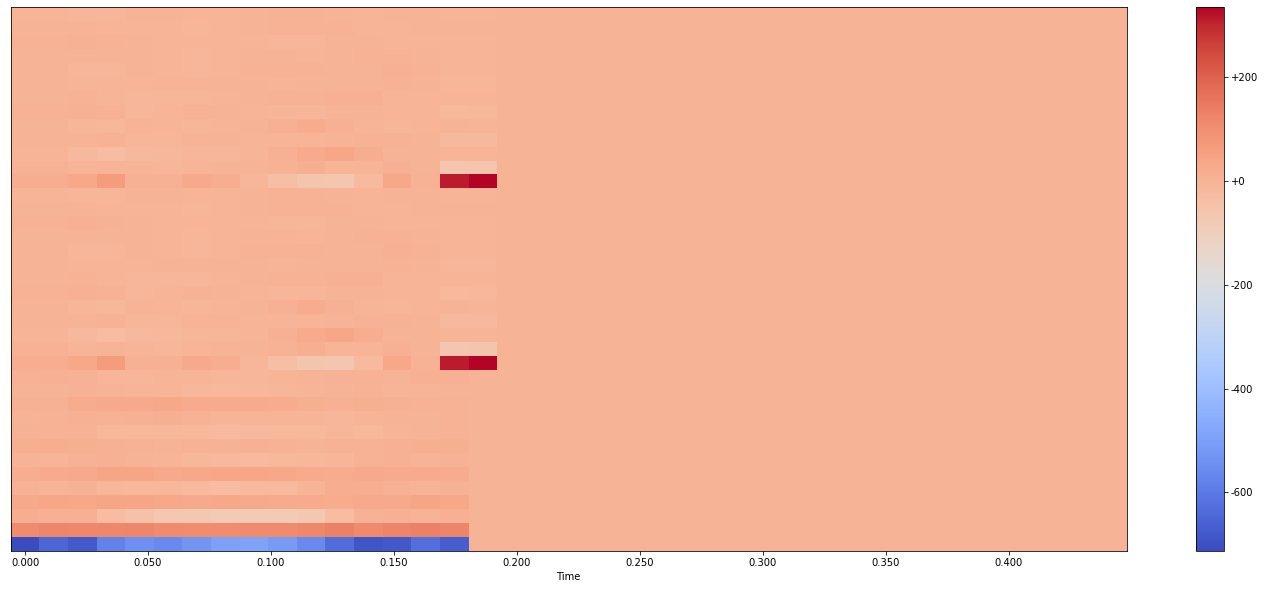

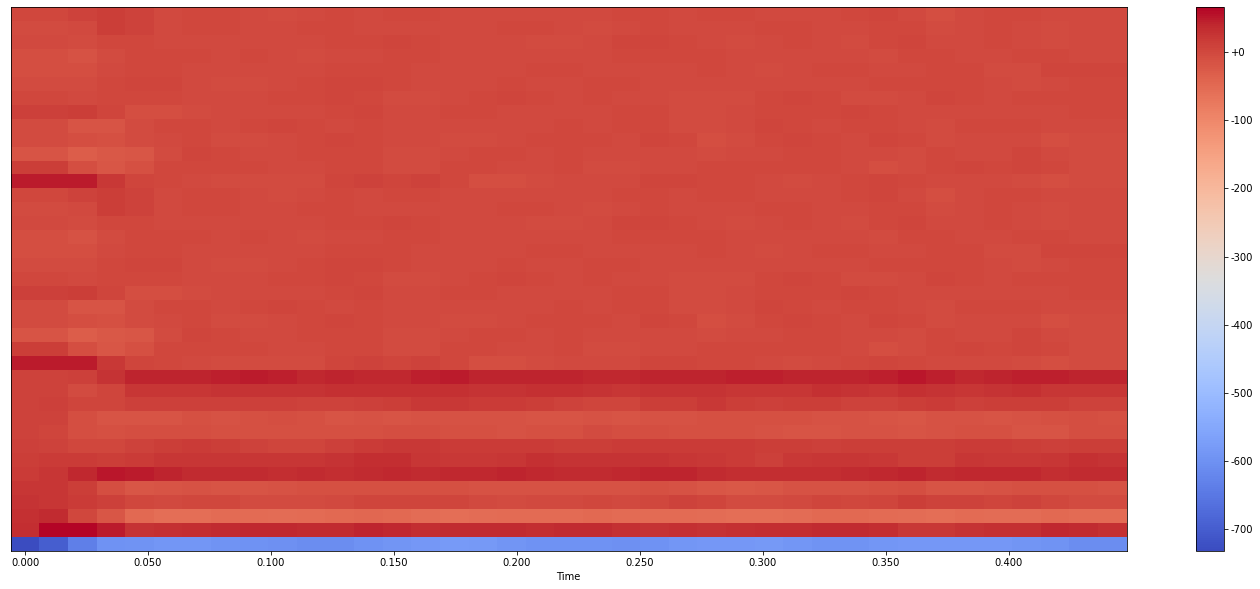

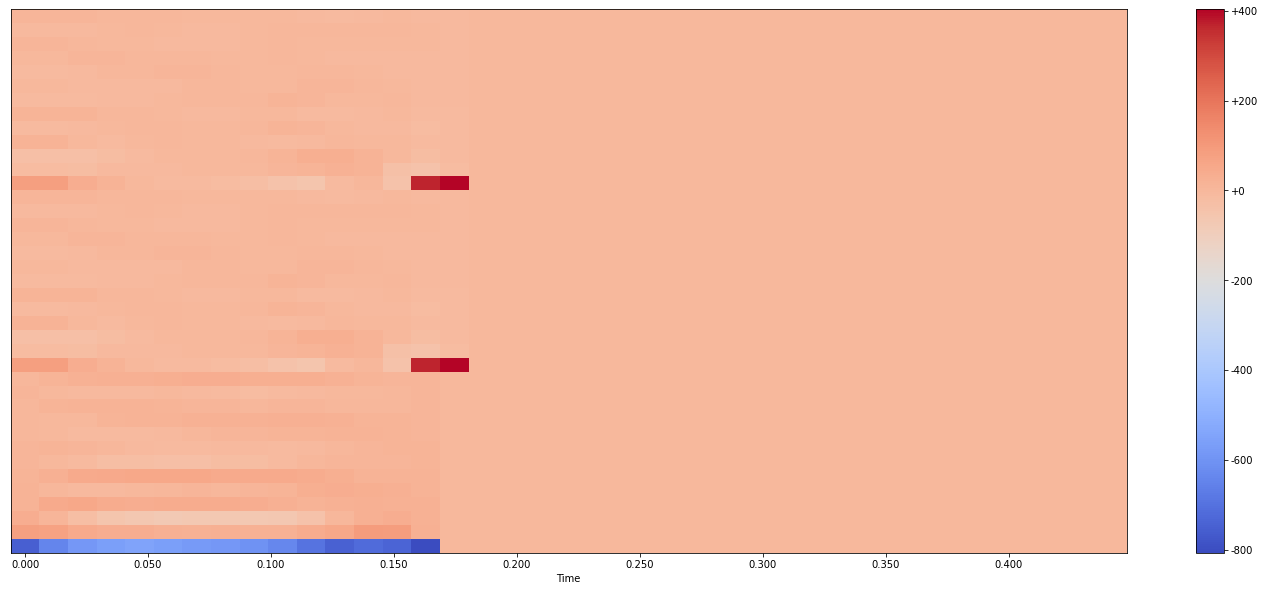

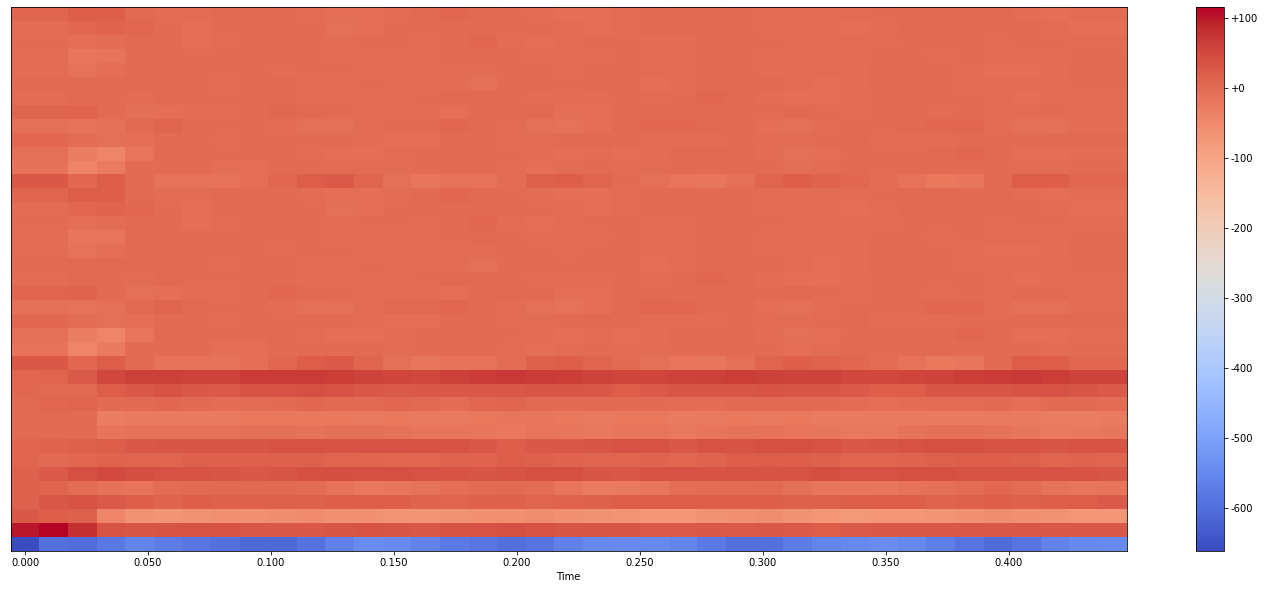

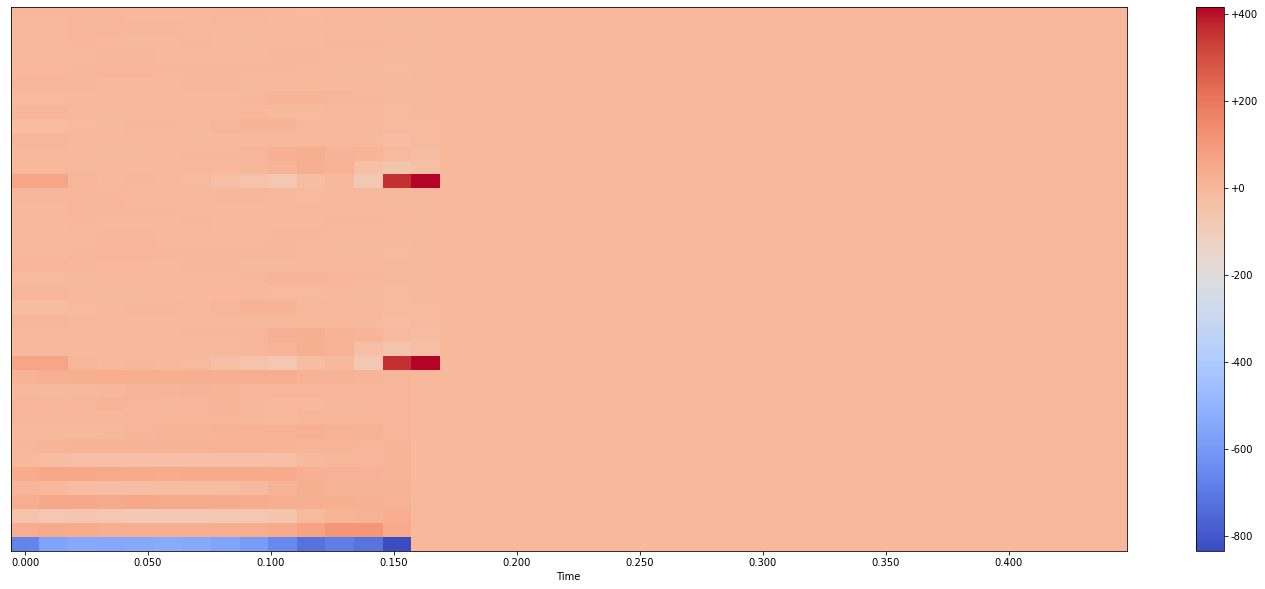

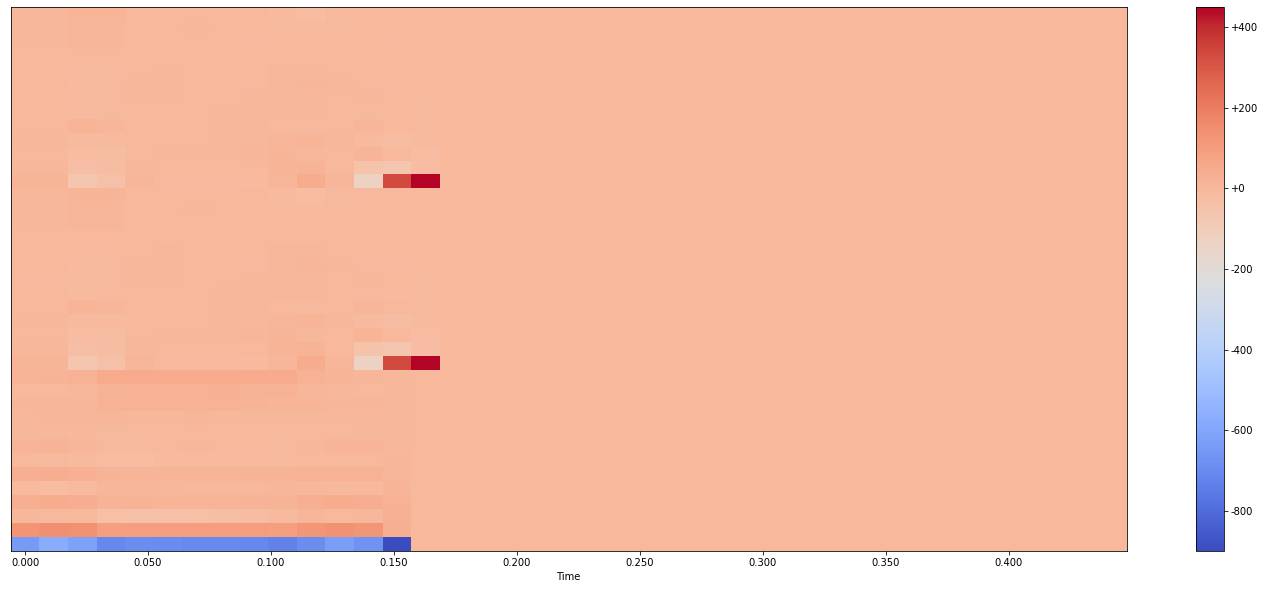

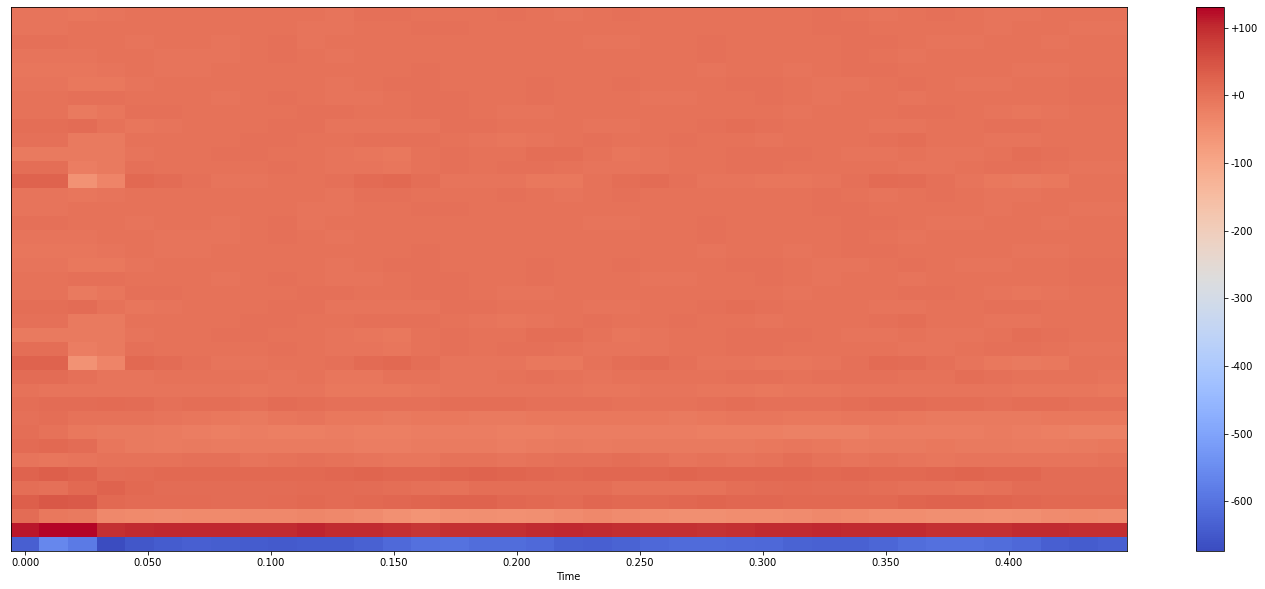

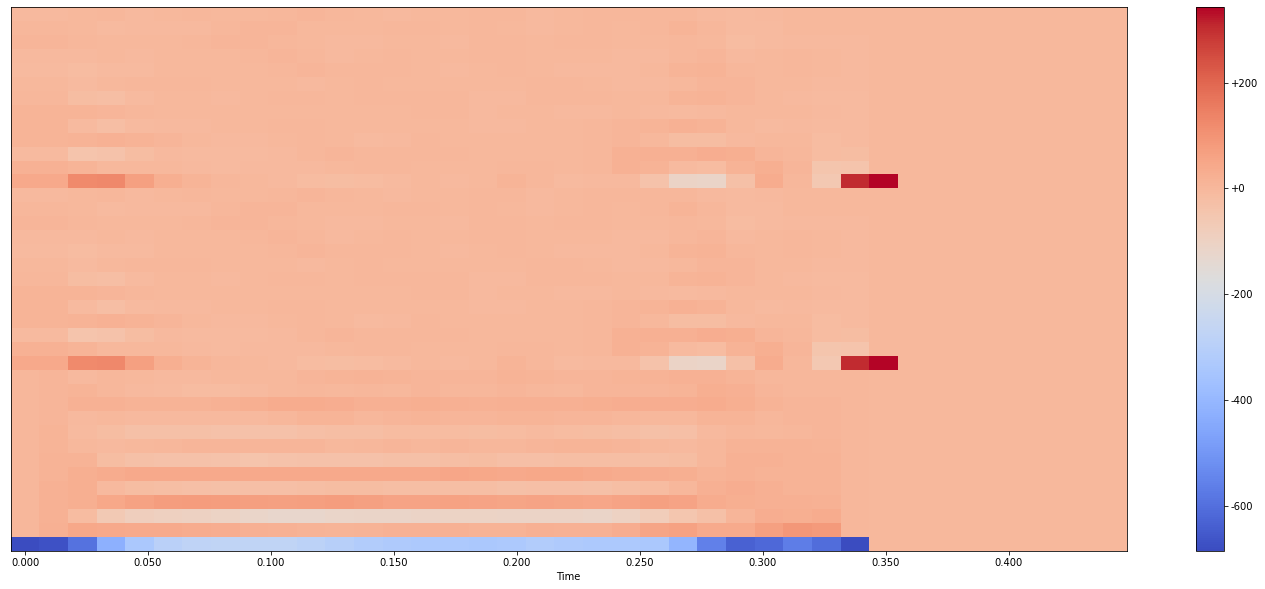

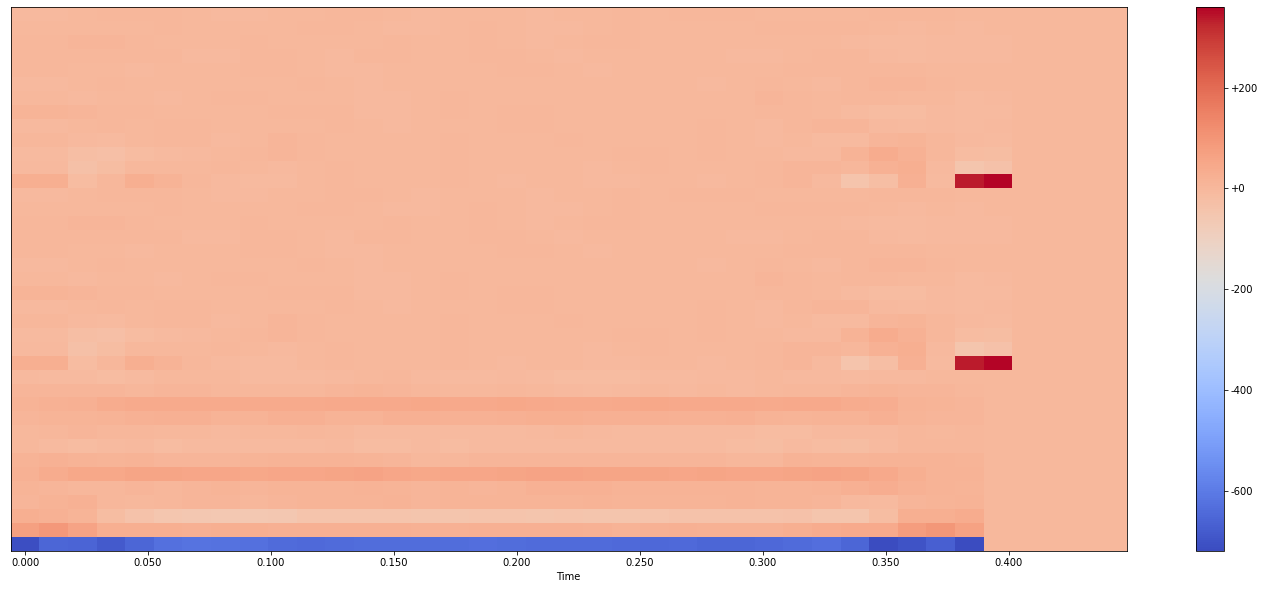

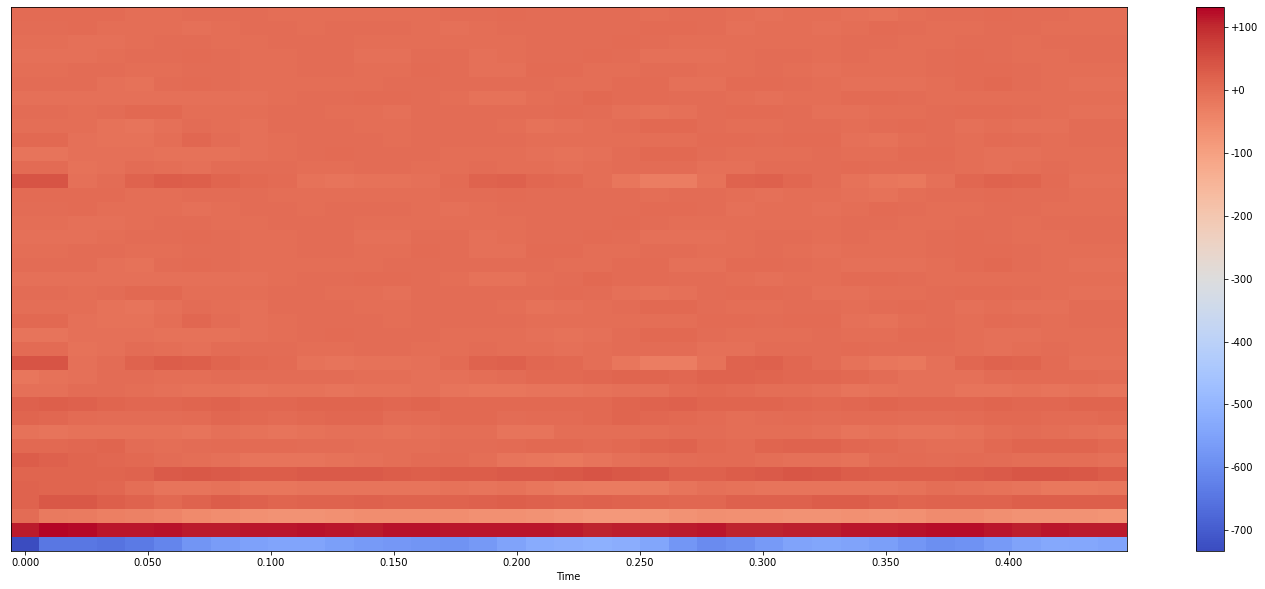

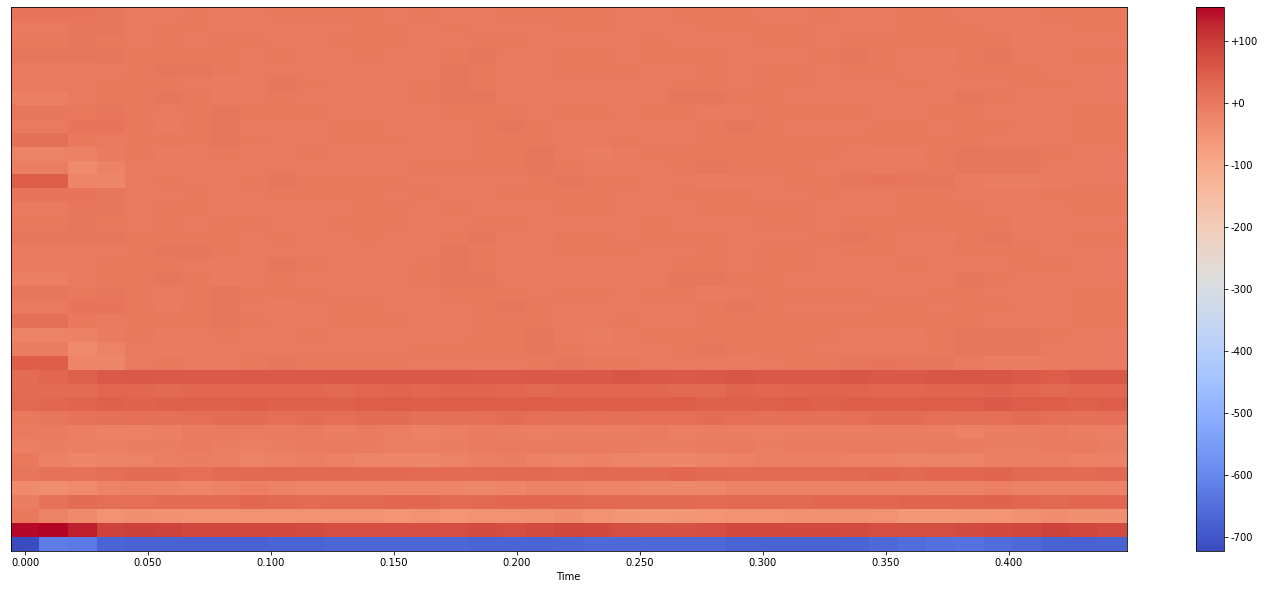

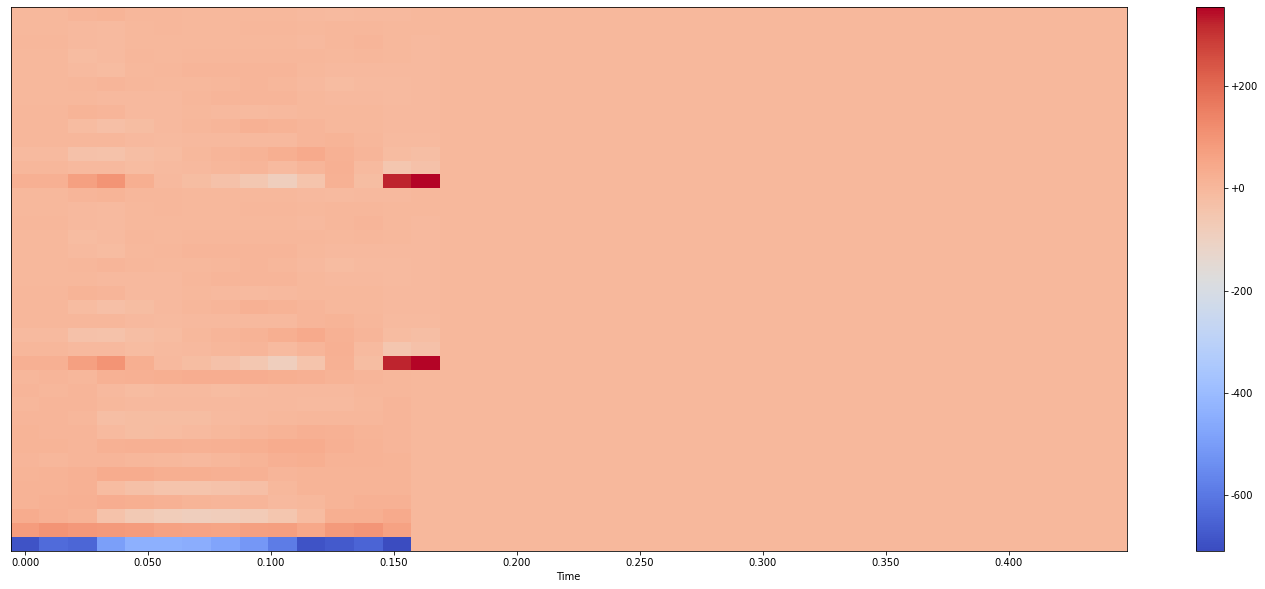

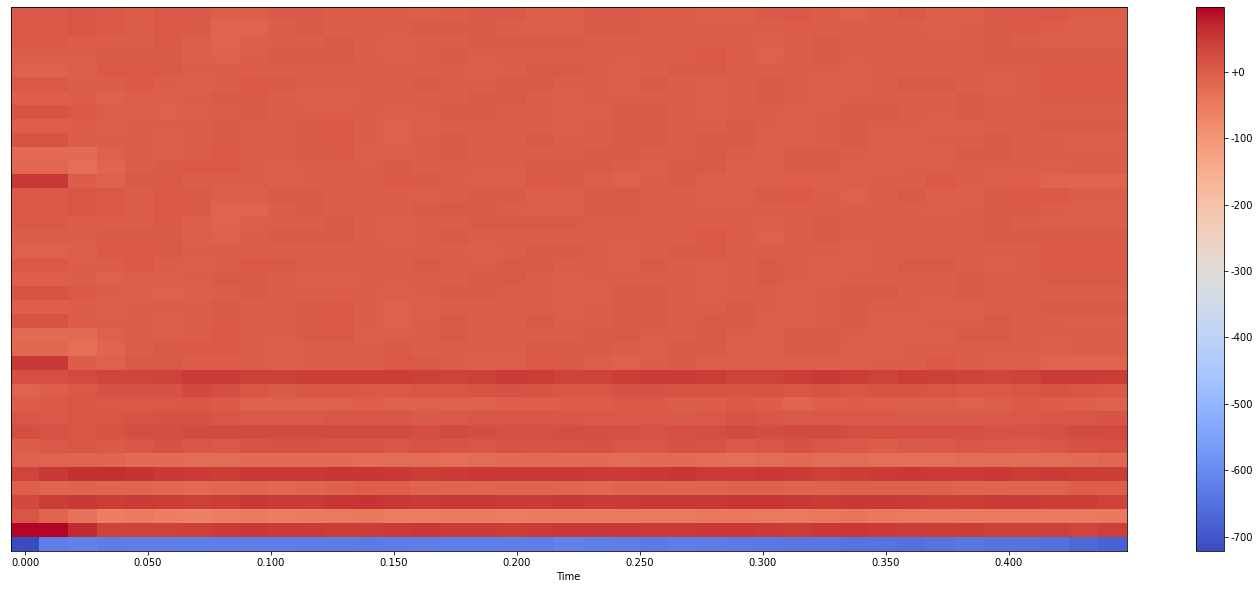

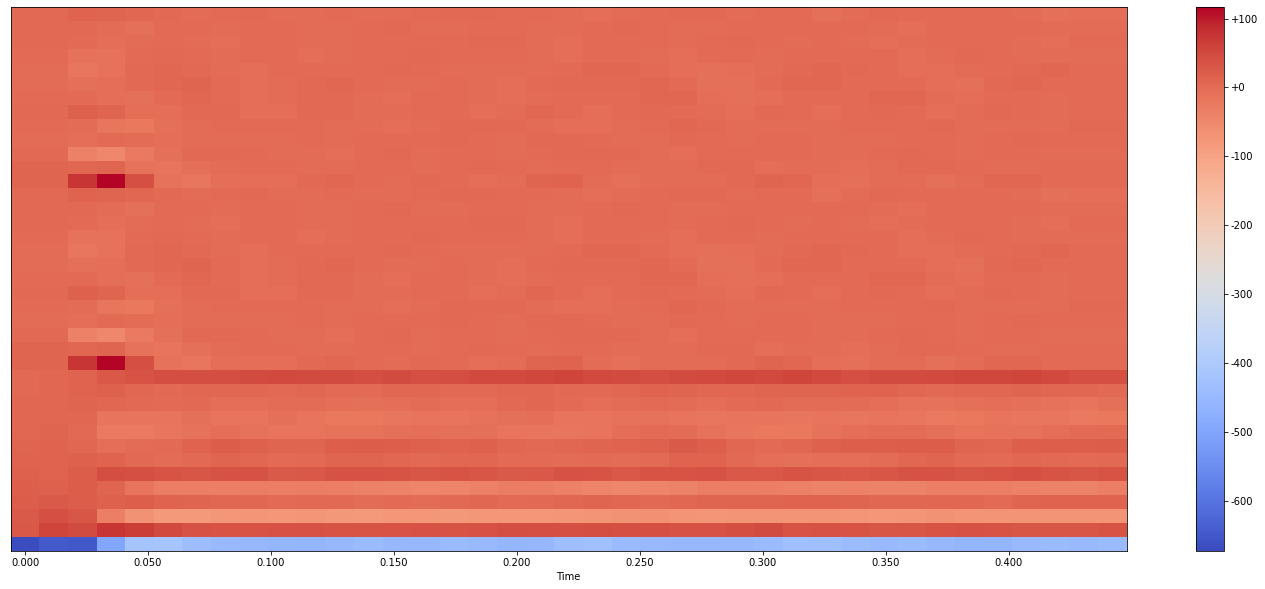

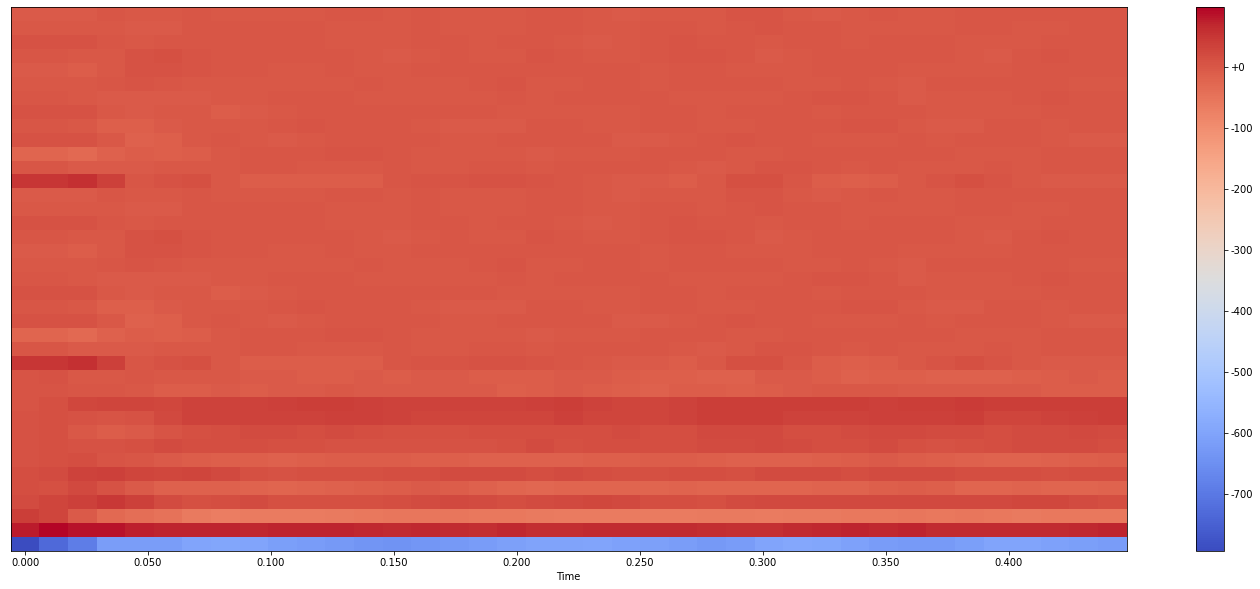

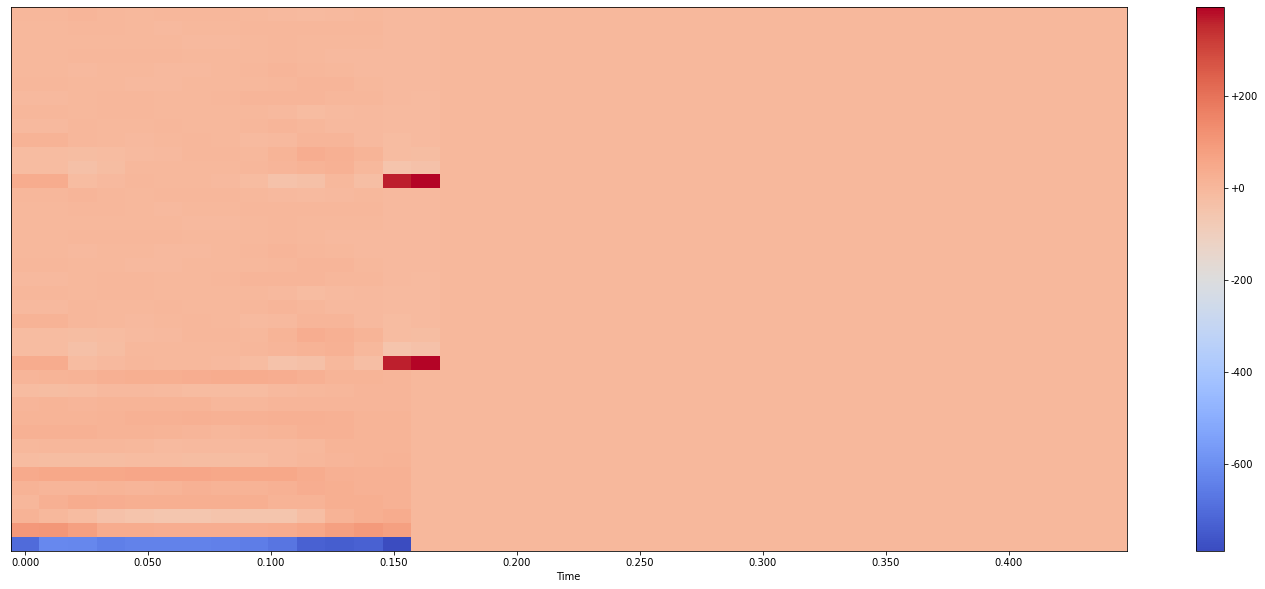

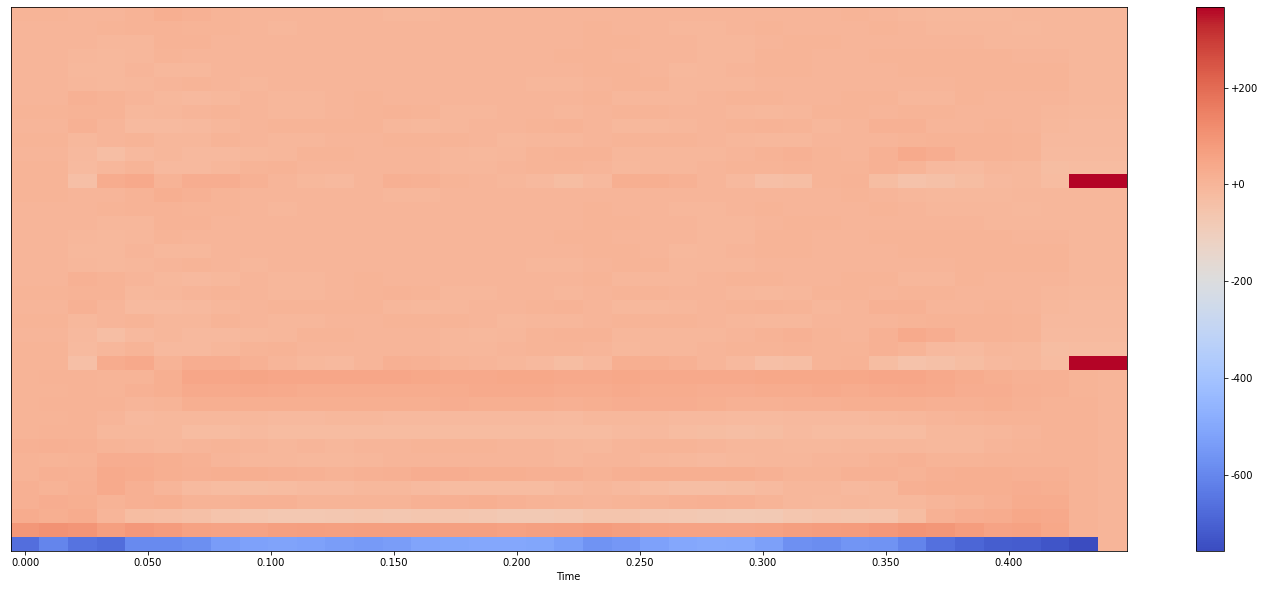

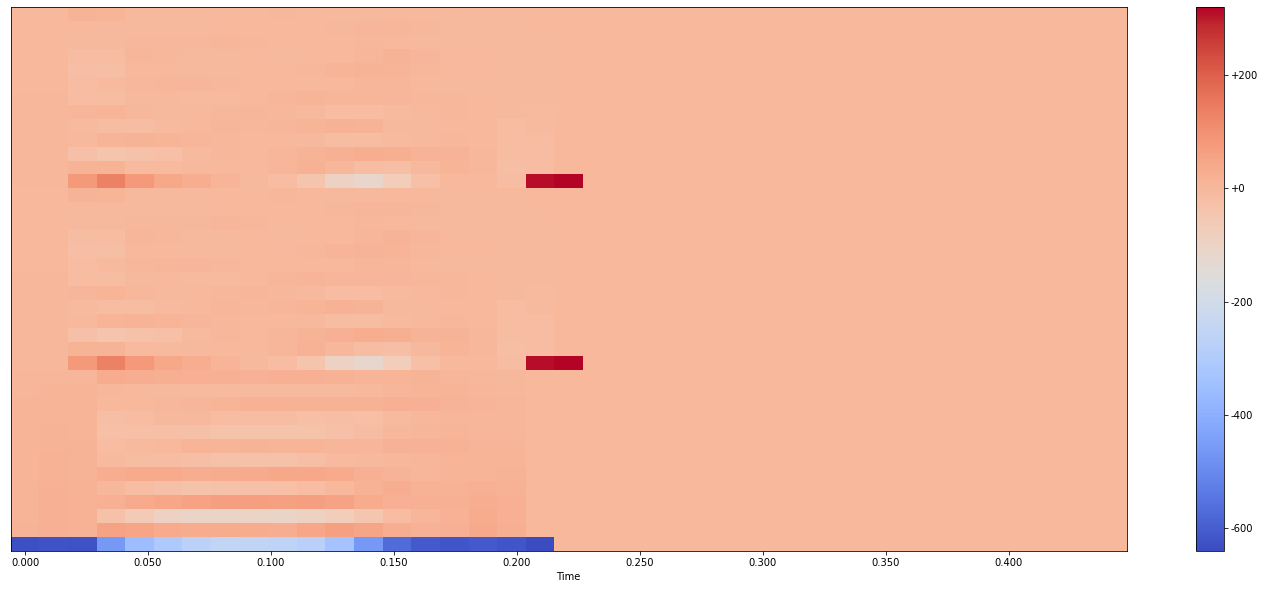

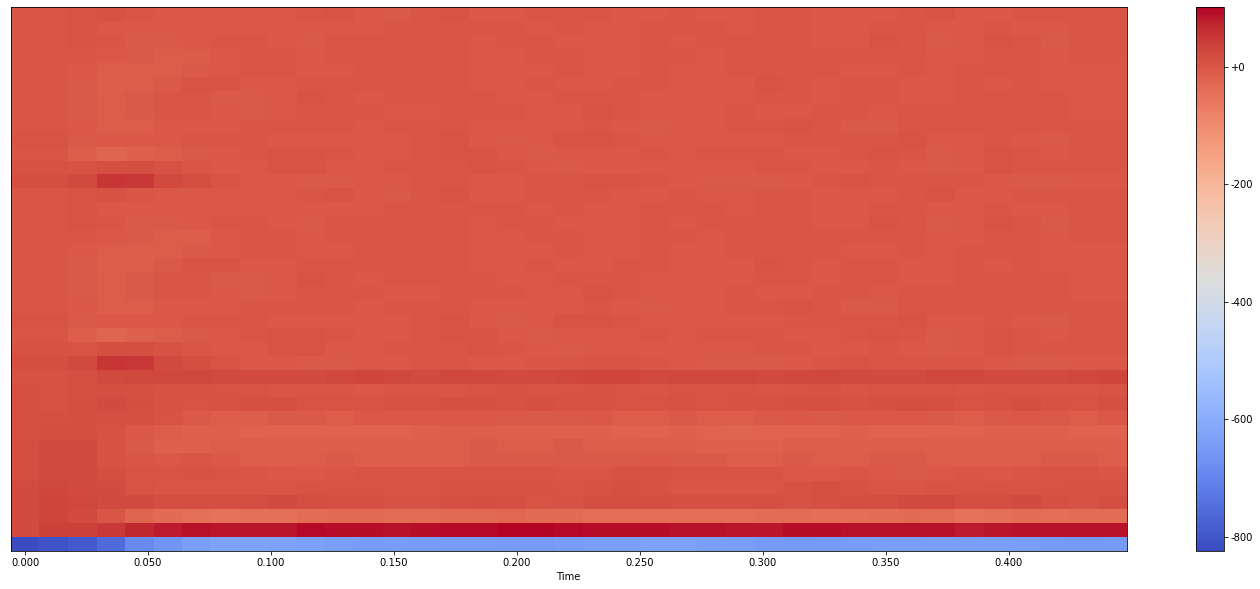

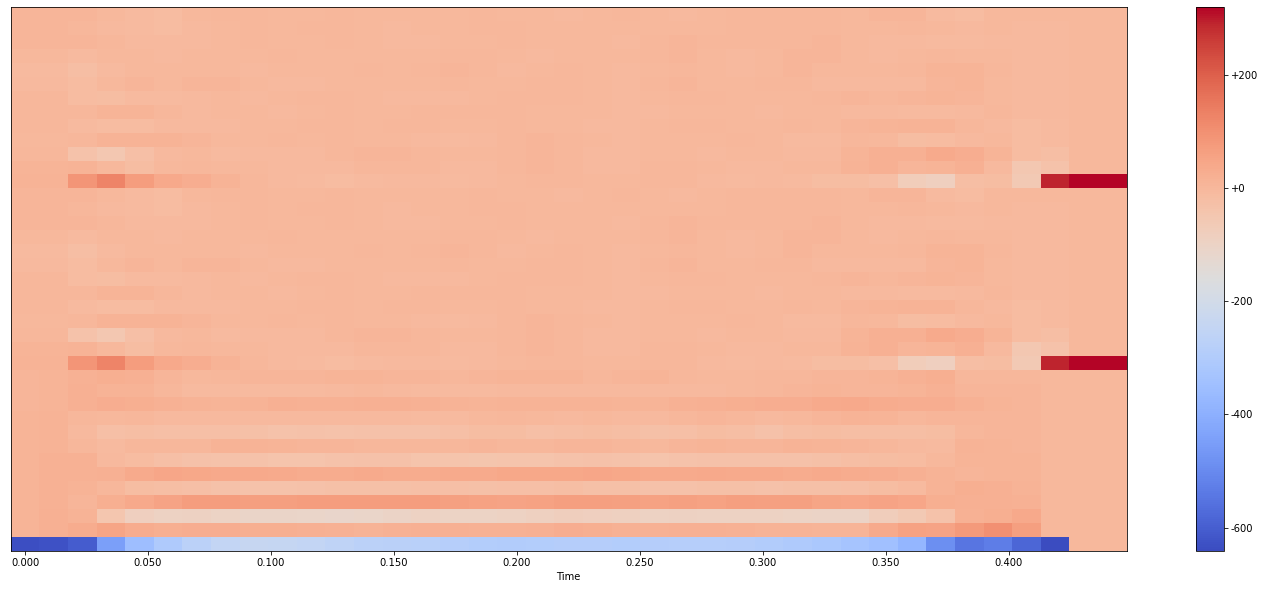

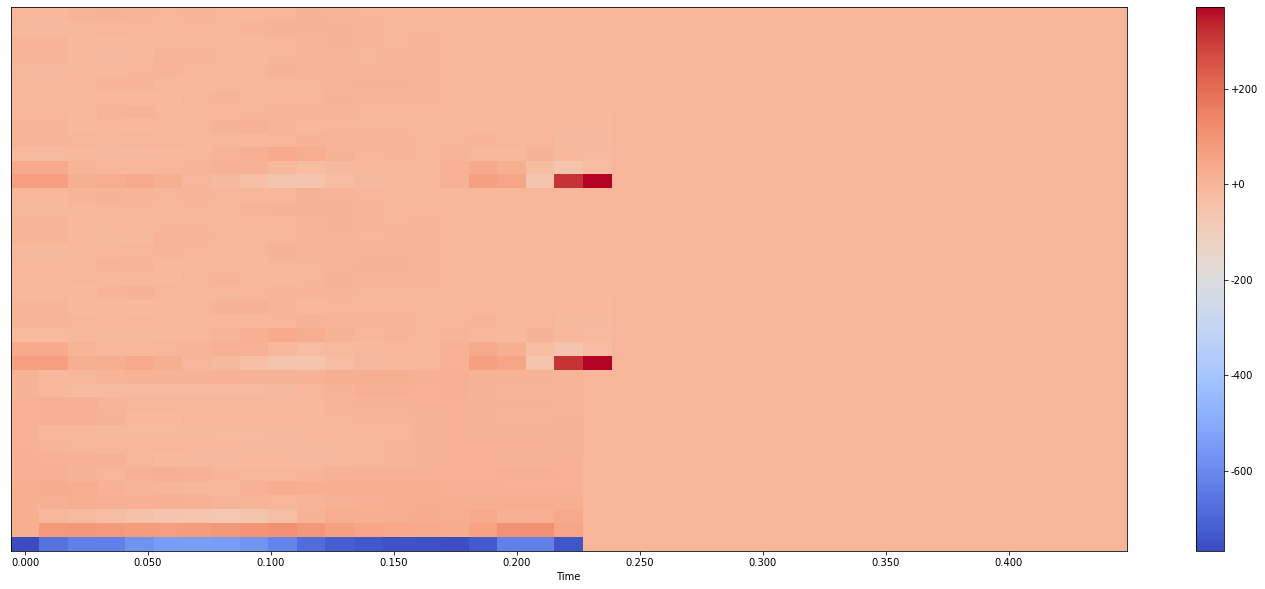

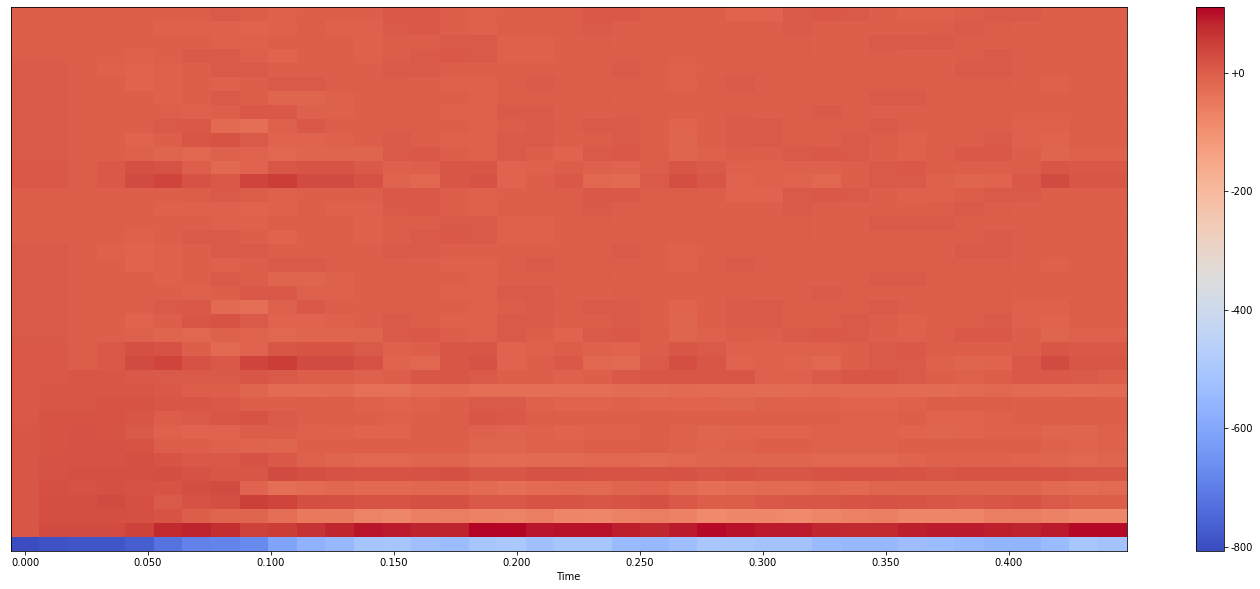

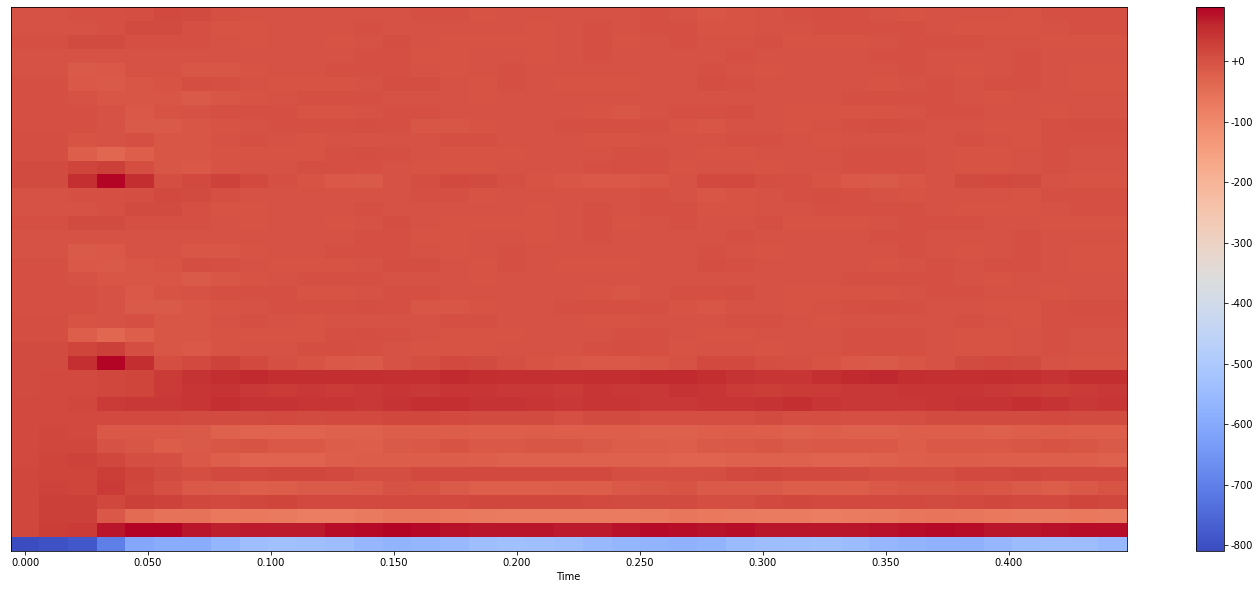

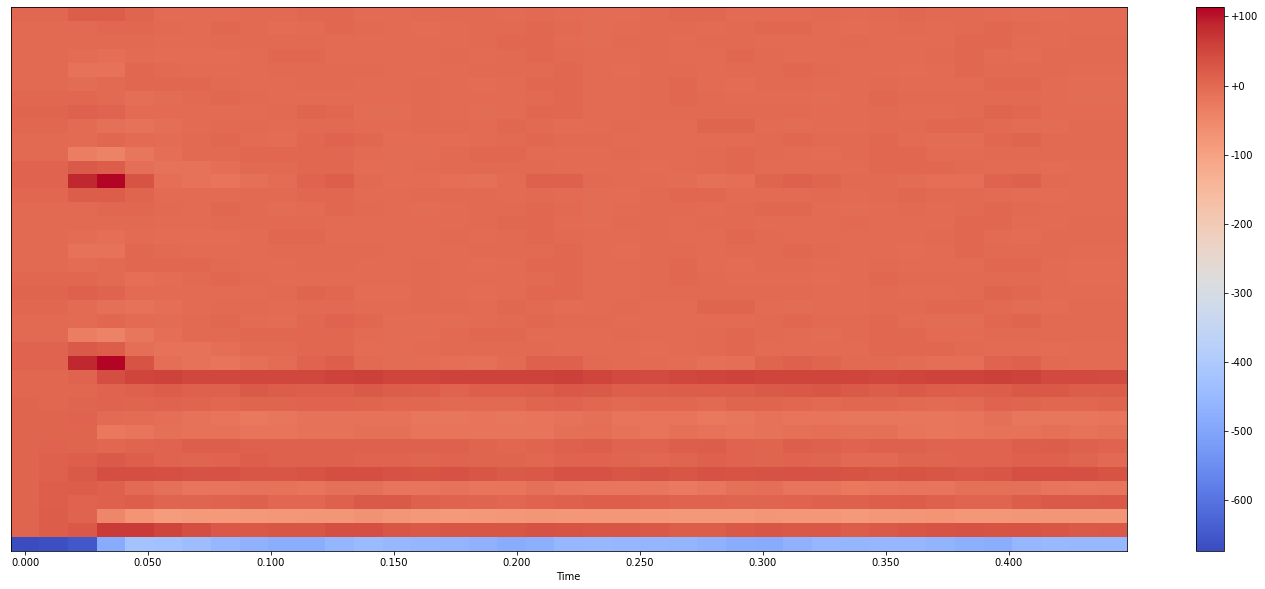

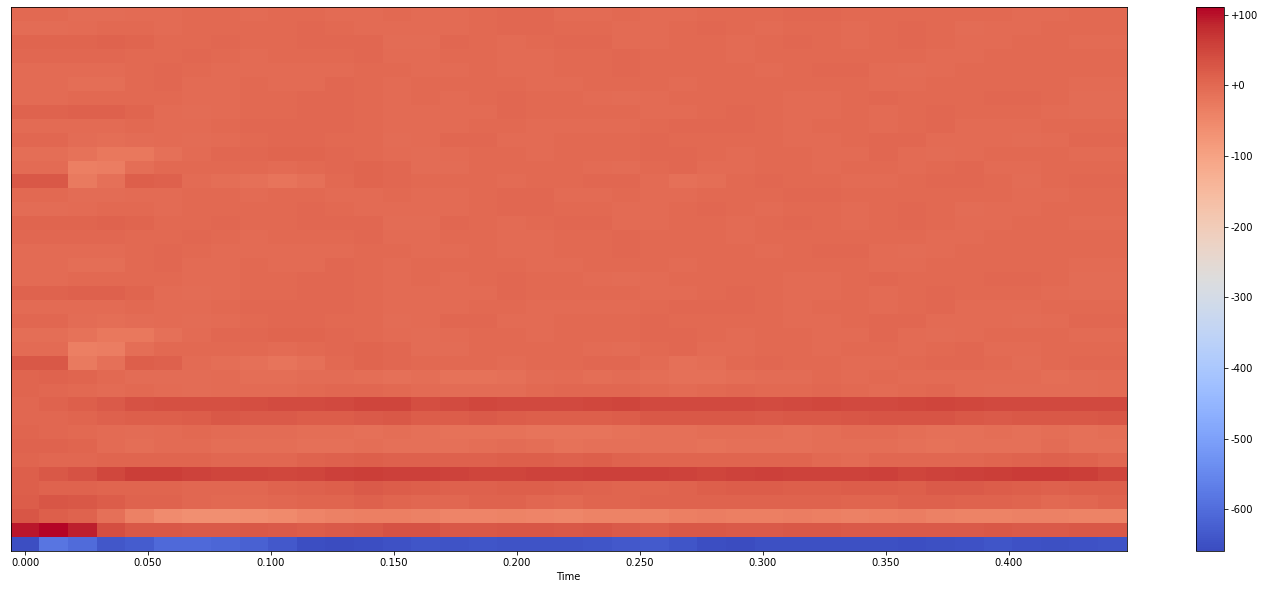

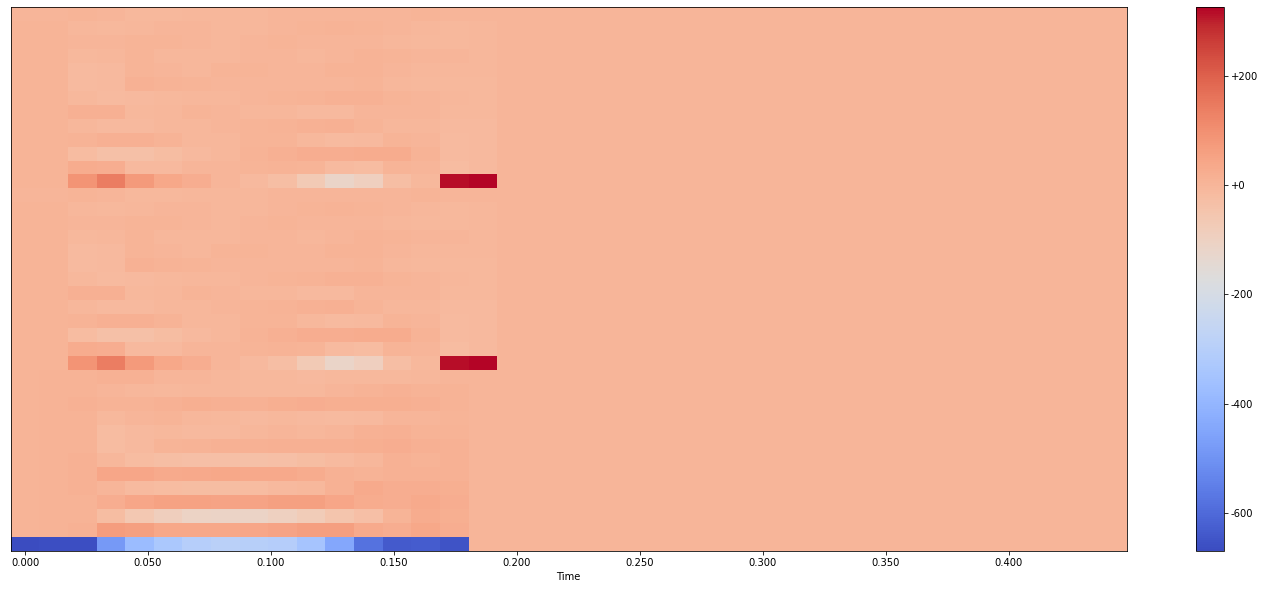

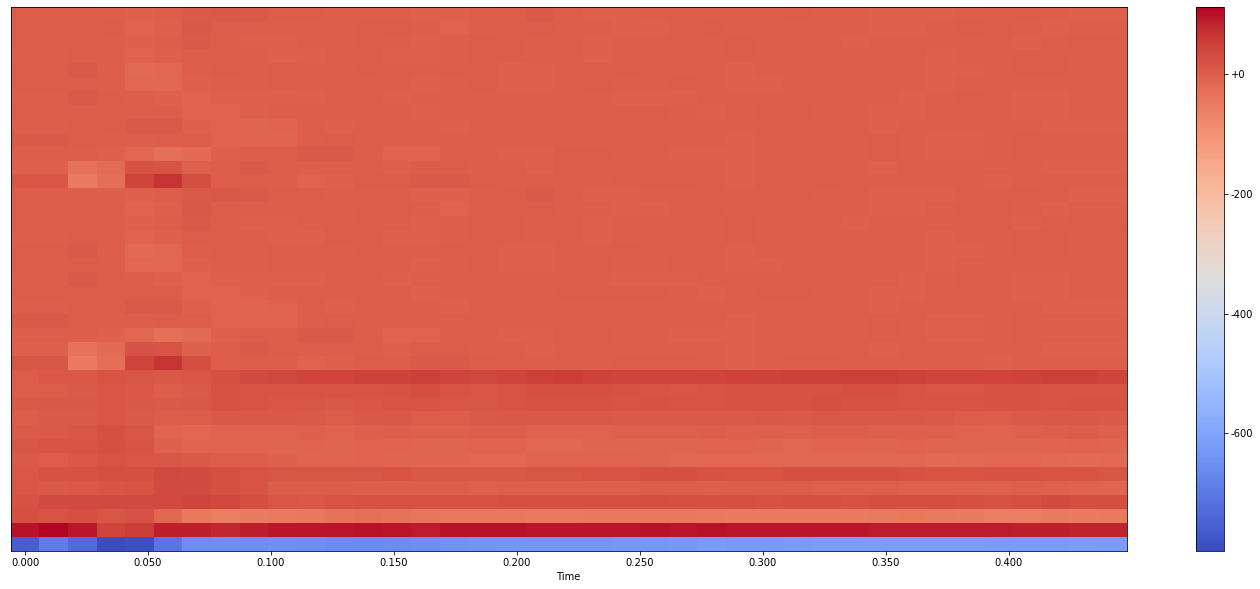

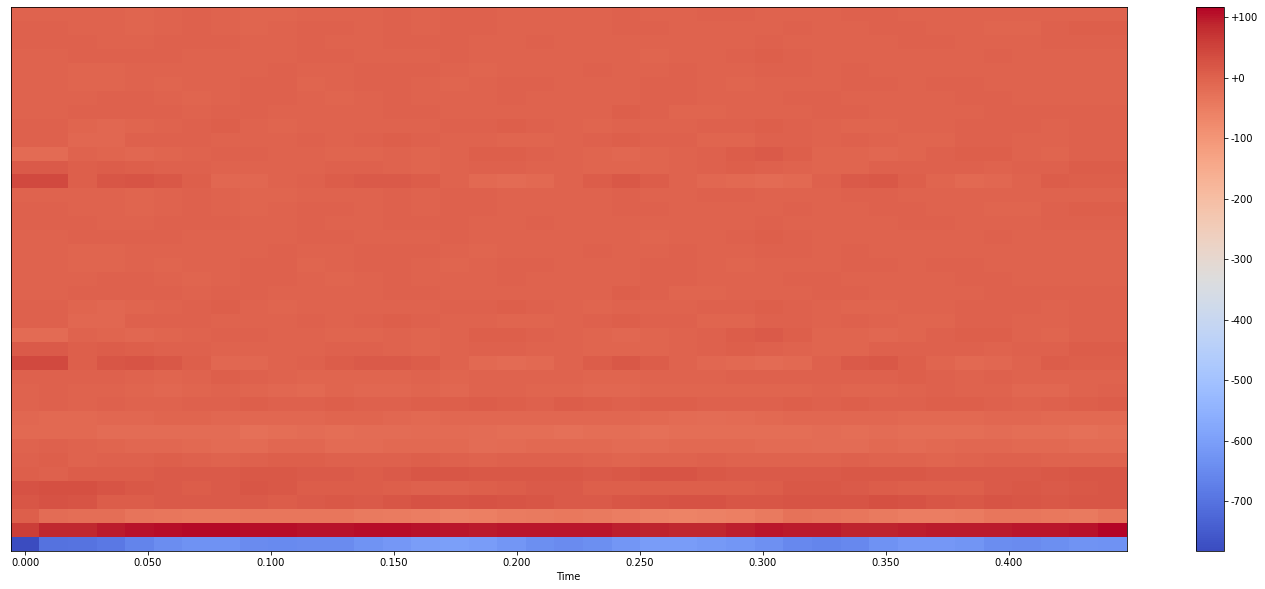

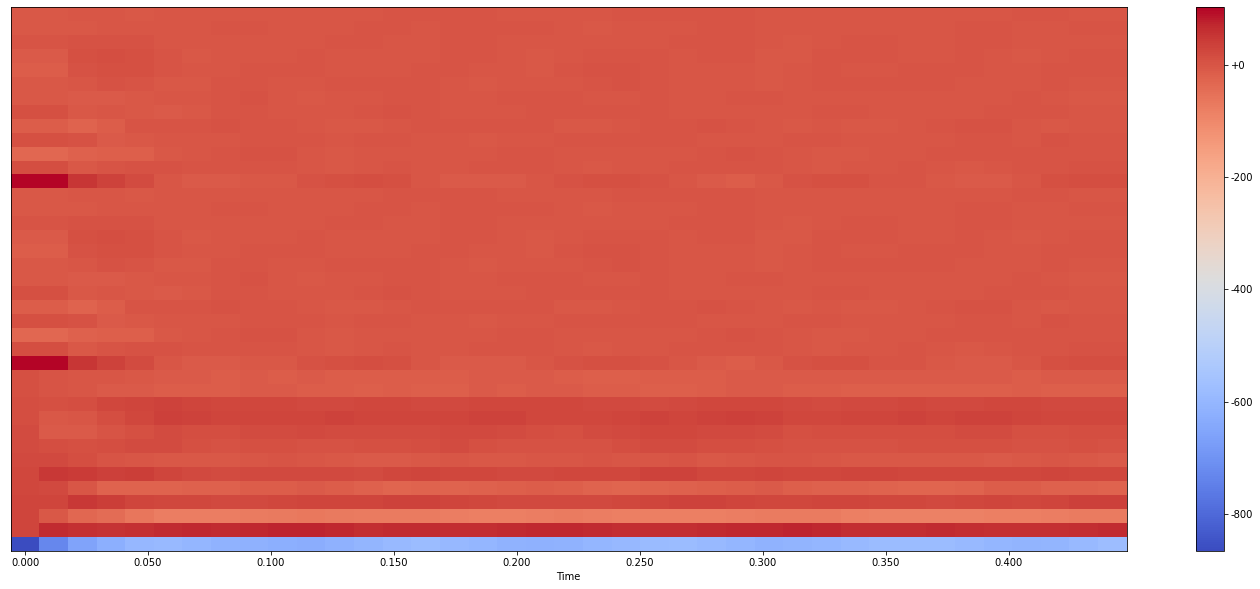

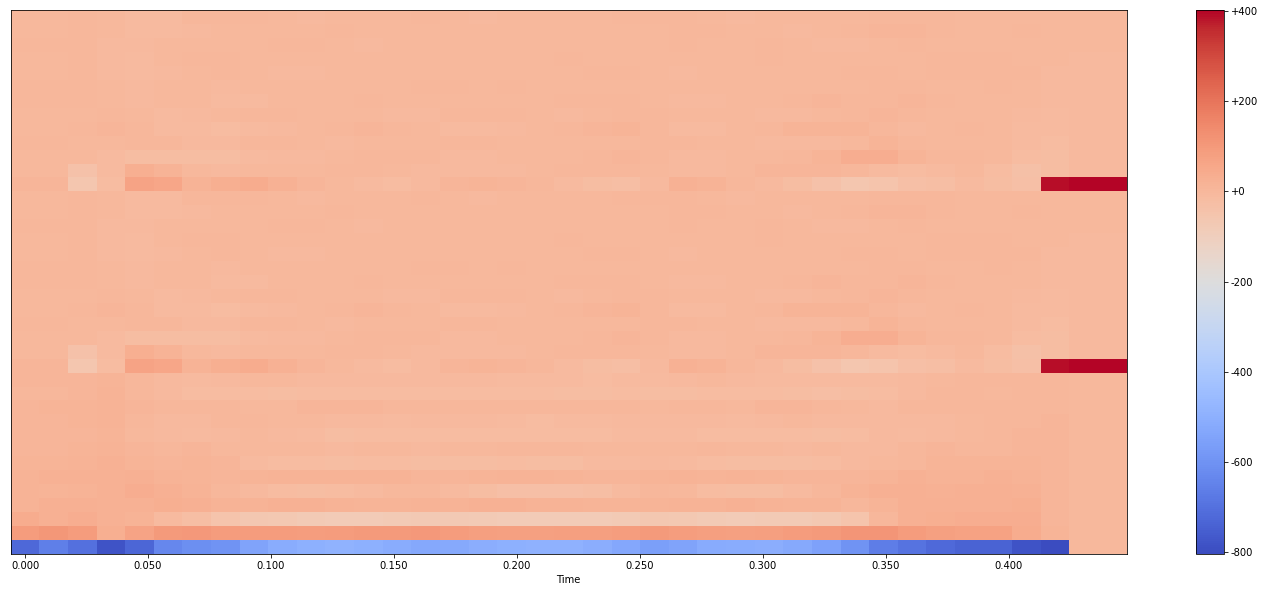

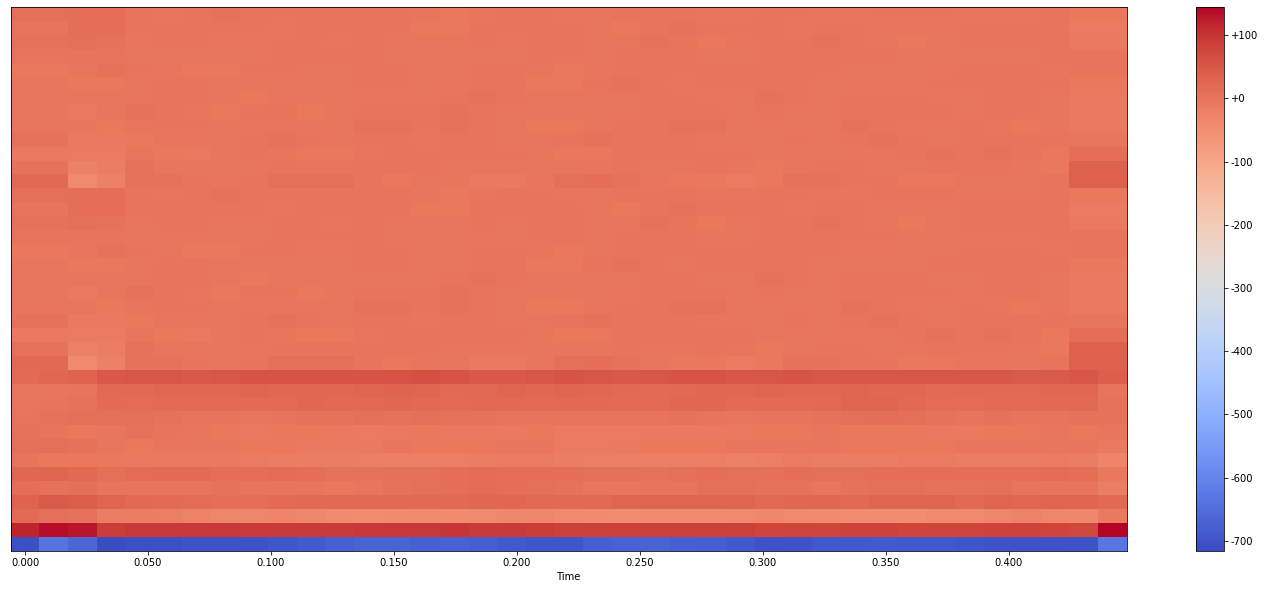

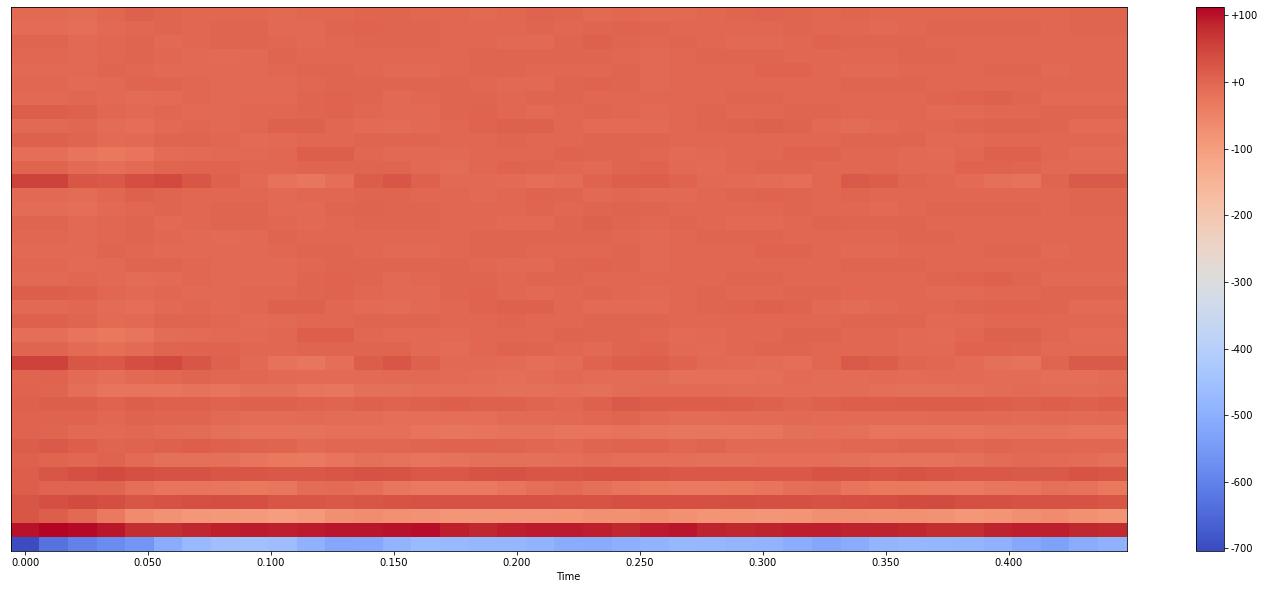

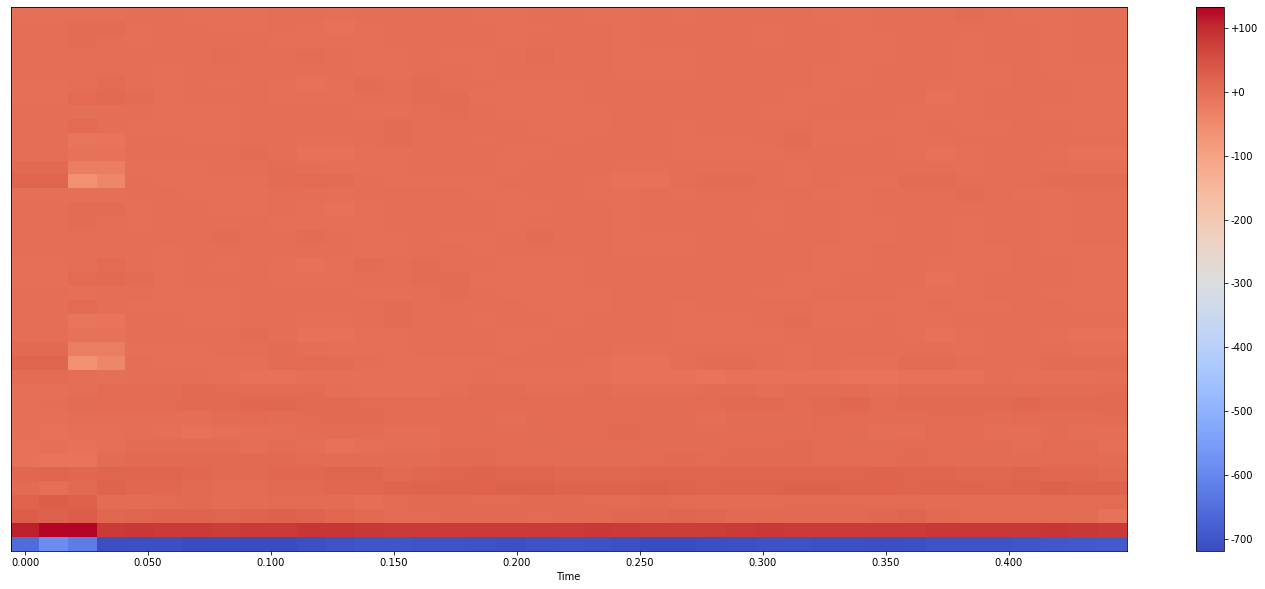

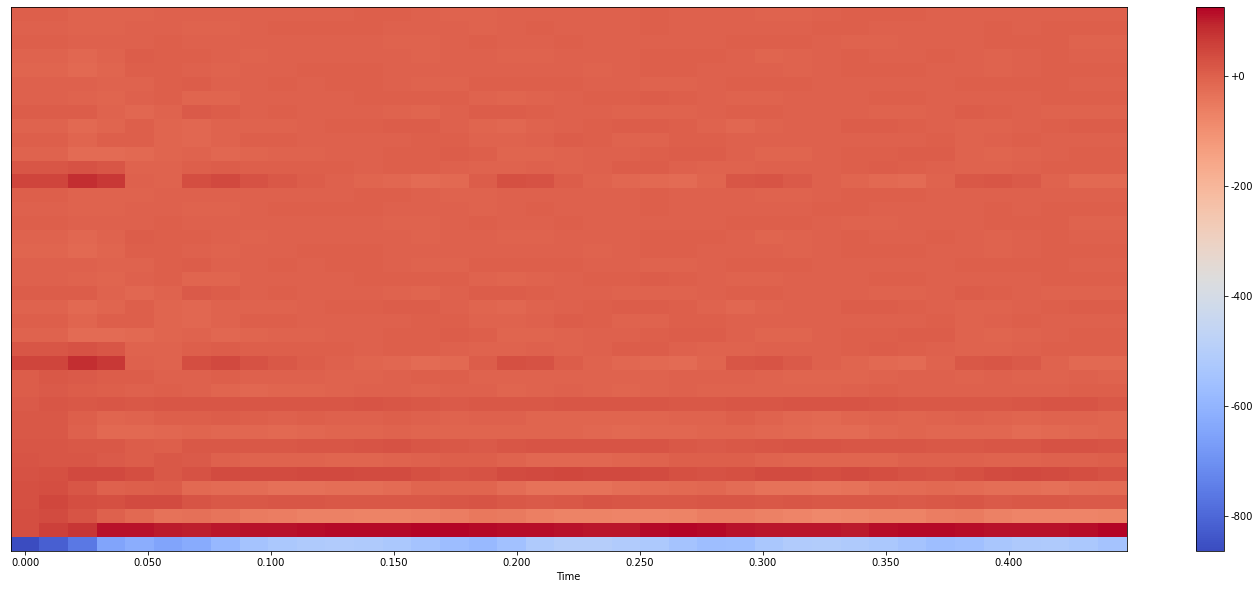

In [36]:
from librosa import display
import matplotlib.pyplot as plt
# showing how mfcc for number '1' looks like

for i in range(200):
    if int(y_train[i]) == 1:
        plt.figure(figsize=(25, 10))
        librosa.display.specshow(X_train[i], 
                                 x_axis="time", 
                                 sr=44000)
        plt.colorbar(format="%+2.f")
        plt.show()

In [37]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [39]:
import keras
channels= 1
pool_size  = (2, 2) 
kernel_size= (3, 3)  

num_classes = 7

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], channels)
X_test  = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], channels)

input_shape = (X_train.shape[1], X_train.shape[2], channels)

keras.backend.clear_session()

In [41]:
model = keras.models.Sequential()
model.add(Conv2D(32, kernel_size, padding="same", input_shape=input_shape, kernel_regularizer=keras.regularizers.l2(l=0.1)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=pool_size))

# 1st layer
model.add(Conv2D(48, kernel_size, padding="same", kernel_regularizer=keras.regularizers.l2(l=0.1)))
model.add(BatchNormalization())
model.add(Activation("relu"))  
model.add(MaxPooling2D(pool_size=pool_size))
    
# 2nd layer
model.add(Conv2D(64, kernel_size, padding="same", kernel_regularizer=keras.regularizers.l2(l=0.1)))
model.add(BatchNormalization())
model.add(Activation("relu"))  
model.add(MaxPooling2D(pool_size=pool_size))

# 3rd layer
model.add(Conv2D(128, kernel_size, padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))  

# flatten and dense layer
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))

# output layer
model.add(Dense(num_classes, activation="softmax"))

# model compile
model.compile(loss=keras.losses.CategoricalCrossentropy(), optimizer=Adam(learning_rate=.0001), metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 39, 39, 32)        320       
                                                                 
 batch_normalization_4 (Batc  (None, 39, 39, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_4 (Activation)   (None, 39, 39, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 19, 19, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 19, 19, 48)        13872     
                                                                 
 batch_normalization_5 (Batc  (None, 19, 19, 48)      

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 50
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification_2.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

history = model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/50
119/119 [==============================] - ETA: 0s - loss: 0.1055 - accuracy: 0.9850
Epoch 1: val_loss improved from inf to 0.19189, saving model to saved_models/audio_classification_2.hdf5
119/119 [==============================] - 6s 50ms/step - loss: 0.1055 - accuracy: 0.9850 - val_loss: 0.1919 - val_accuracy: 0.9609
Epoch 2/50
118/119 [============================>.] - ETA: 0s - loss: 0.0721 - accuracy: 0.9963
Epoch 2: val_loss improved from 0.19189 to 0.09287, saving model to saved_models/audio_classification_2.hdf5
119/119 [==============================] - 6s 53ms/step - loss: 0.0720 - accuracy: 0.9963 - val_loss: 0.0929 - val_accuracy: 0.9878
Epoch 3/50
118/119 [============================>.] - ETA: 0s - loss: 0.0728 - accuracy: 0.9958
Epoch 3: val_loss did not improve from 0.09287
119/119 [==============================] - 6s 49ms/step - loss: 0.0726 - accuracy: 0.9958 - val_loss: 0.1037 - val_accuracy: 0.9859
Epoch 4/50
118/119 [============================>.] - E

Epoch 30/50
119/119 [==============================] - ETA: 0s - loss: 0.0329 - accuracy: 1.0000
Epoch 30: val_loss improved from 0.08153 to 0.07051, saving model to saved_models/audio_classification_2.hdf5
119/119 [==============================] - 6s 51ms/step - loss: 0.0329 - accuracy: 1.0000 - val_loss: 0.0705 - val_accuracy: 0.9902
Epoch 31/50
119/119 [==============================] - ETA: 0s - loss: 0.0302 - accuracy: 1.0000
Epoch 31: val_loss did not improve from 0.07051
119/119 [==============================] - 7s 55ms/step - loss: 0.0302 - accuracy: 1.0000 - val_loss: 0.0755 - val_accuracy: 0.9884
Epoch 32/50
118/119 [============================>.] - ETA: 0s - loss: 0.0288 - accuracy: 0.9997
Epoch 32: val_loss did not improve from 0.07051
119/119 [==============================] - 7s 56ms/step - loss: 0.0288 - accuracy: 0.9997 - val_loss: 0.1356 - val_accuracy: 0.9707
Epoch 33/50
119/119 [==============================] - ETA: 0s - loss: 0.1057 - accuracy: 0.9753
Epoch 33: 

In [46]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

[0.2932426631450653, 0.944376528263092]
